In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('result/test_result.csv')
length_and_pass = list()
for context in df['is_contain_context'].unique():
    for model in df['model'].unique():
        for each in df['ground_sloc'].unique():
            length_and_pass.append([context, model, each, df[(df['ground_sloc']==each) & (df['is_contain_context']==context) & (df['model']==model)]["pass@1"].mean()])

df_new = pd.DataFrame(length_and_pass, columns=['is_contain_context', 'model', 'length', 'pass@1'])  
g = sns.FacetGrid(df_new, col ='model', hue ='is_contain_context')
g.map(sns.regplot, "length", "pass@1", lowess=True)
g.add_legend()

ModuleNotFoundError: No module named 'seaborn'

[51.3, 5.39, 2.79, 4.19, 4.79, 31.54]


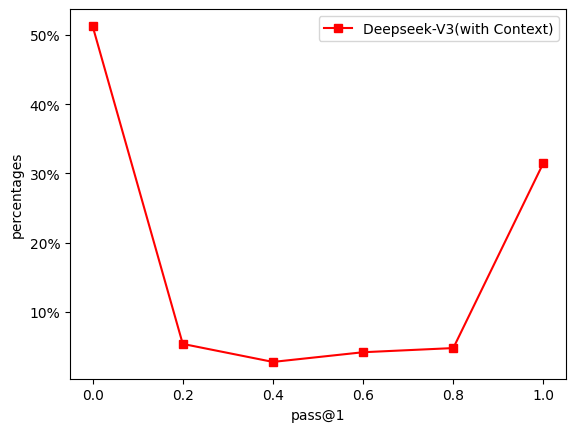

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter

# 读取数据
df = pd.read_csv('result/test_result.csv')

def data_process(model,context):
        deepseek_with_context_df = df[(df['model'] == model) & (df['is_contain_context'] == True)]

        # 分组统计
        deepseek_with_context = deepseek_with_context_df.groupby('pass@1').size().reset_index(name='count')

        count_list = deepseek_with_context['count'].tolist()
        total = sum(count_list)
        percentages = [round((x/total)*100, 2) for x in count_list] 
        print(percentages)

x = [0,0.2,0.4,0.6,0.8,1.0]
plt.plot(x,percentages,'s-',color = 'r',label="Deepseek-V3(with Context)")#s-:方形
# plt.plot(x,k2,'o-',color = 'g',label="CNN-RLSTM")#o-:圆形
plt.xlabel("pass@1")#横坐标名字
plt.ylabel("percentages")#纵坐标名字
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.legend(loc = "best")#图例
plt.show()

/tmp/ipykernel_3914462/91737631.py:98: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pass_result = df.groupby(['type', 'model', 'length_group'])['pass@1'].mean().reset_index()
/tmp/ipykernel_3914462/91737631.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  compile_result = df.groupby(['type', 'model', 'length_group'])['pass@5'].mean().reset_index()
/home/zyx/code/rostm/rostm/.venv/lib/python3.10/site-packages/matplotlib/colors.py:1152: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/zyx/code/rostm/rostm/.venv/lib/python3.10/site-packages/matplotlib/color

[[0.24       0.4        0.28       0.4        0.36       0.4       ]
 [0.2875     0.375      0.346875   0.421875   0.303125   0.359375  ]
 [0.12727273 0.24242424 0.16363636 0.27272727 0.20606061 0.3030303 ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.4        0.5       ]
 [       nan        nan        nan        nan        nan        nan]]
[[0.29666667 0.4        0.36       0.43333333 0.34       0.38333333]
 [0.09803922 0.15686275 0.14509804 0.23529412 0.1372549  0.21568627]
 [0.125      0.25       0.         0.         0.075      0.125     ]
 [0.         0.         0.         0.         0.8        1.        ]
 [       nan        nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan        nan]]
[[0.24347826 0.34782609 0.286956

/home/zyx/code/rostm/rostm/.venv/lib/python3.10/site-packages/matplotlib/colors.py:1152: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/zyx/code/rostm/rostm/.venv/lib/python3.10/site-packages/matplotlib/colors.py:1159: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/home/zyx/code/rostm/rostm/.venv/lib/python3.10/site-packages/matplotlib/ticker.py:448: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  return self.fmt.format(x=x, pos=pos)
/tmp/ipykernel_3914462/91737631.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pass_result = df.groupby(['type', 'model', 'halstead_volume_group'])['pass@1'].mean().reset_index()
/tmp/ipykernel_3

[[0.09916667 0.14166667 0.12083333 0.15833333 0.12       0.15      ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


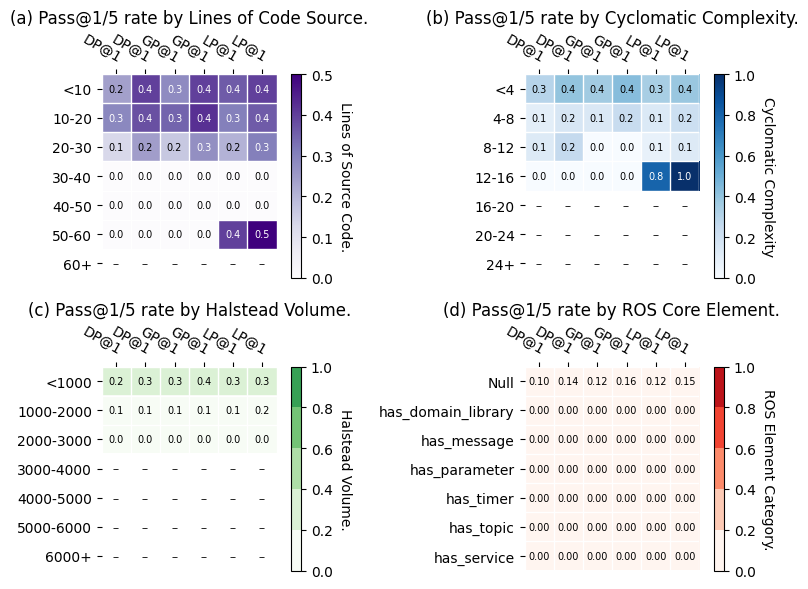

In [ ]:
import matplotlib.ticker
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
labels = ['DP@1','DP@1','GP@1','GP@1','LP@1','LP@1']

def heatmap(data, row_labels, col_labels,ax=None,cbar_kw=None,cbarlabel="",**kwargs):
    if ax is None:
        ax = plt.gca()
    if cbar_kw is None:
        cbar_kw={}

    im = ax.imshow(data,**kwargs)
    
    cbar=ax.figure.colorbar(im,ax=ax,**cbar_kw)
    cbar.ax.set_ylabel(cbarlabel,rotation=-90,va="bottom")

    ax.set_xticks(range(data.shape[1]))
    ax.set_xticklabels(col_labels)
    ax.set_yticks(range(data.shape[0]))
    ax.set_yticklabels(row_labels)

    ax.tick_params(top=True,bottom=False,labeltop=True,labelbottom=False)

    plt.setp(ax.get_xticklabels(),rotation=-30,ha='right',rotation_mode="anchor")

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5,minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5,minor=True)
    ax.grid(which='minor',color='w',linestyle='-',linewidth=1)
    ax.tick_params(which='minor',bottom=False,left=False)

    return im,cbar

def annotation_heatmap(im,data=None,valfmt="{x:.2f}",textcolors=("black","white"),threshold=None,**textkw):
    if not isinstance(data,(list,np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2

    kw = dict(horizontalalignment="center",verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt,str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i,j])>threshold)])
            text=im.axes.text(j,i,valfmt(data[i,j],None),**kw)
            texts.append(text)
    return texts

def category_filter(category_item):
    # 加载数据
    df = pd.read_csv('result/autoware/result.csv')
    filter_data = list()
    for _,data in df.iterrows():
        if category_item in data['category']:
            filter_data.append([data['id'],data['model'],data['type'],data['pass@1'],data['pass@5']])
    
    filter_df=pd.DataFrame(filter_data,columns=['id','model','type','pass@1','pass@5'])
    pass_result = filter_df.groupby(['type', 'model'])['pass@1'].mean().reset_index()

    compile_result = filter_df.groupby(['type', 'model'])['pass@5'].mean().reset_index()
    category_merge_result = pd.merge(pass_result,compile_result,how='outer')
    category_agg = category_merge_result[(category_merge_result['type'] == 'basic')]
    
    category_result = [0,0,0,0,0,0]
    for _,row in category_agg.iterrows():
        for j in range(len(models)):
            if row['model'] == models[j]:
                category_result[2*j] = row['pass@1']
                category_result[2*j+1] = row['pass@5']
    return category_result
           

# 加载数据
df = pd.read_csv('result/autoware/result.csv')
df = df[(df['category'] == 'utilities')]

# 定义长度范围的分组
length_bins = [0, 10, 20, 30, 40, 50, 60, float('inf')]  # 可以根据实际情况调整
length_labels = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
models = ['deepseek','gpt-4o','llama']

# 将 length 分组
df['length_group'] = pd.cut(df['sloc_ground_truth'], bins=length_bins, labels=length_labels, right=False)

# 分组聚合计算平均值
pass_result = df.groupby(['type', 'model', 'length_group'])['pass@1'].mean().reset_index()
compile_result = df.groupby(['type', 'model', 'length_group'])['pass@5'].mean().reset_index()
length_merge_result = pd.merge(pass_result,compile_result,how='outer')

# 创建透视表
length_agg = length_merge_result[(length_merge_result['type'] == 'basic')]

length_result_data = np.zeros((7,6))

for _,row in length_agg.iterrows():
    for i in range(len(length_labels)):
        for j in range(len(models)):
            if row['length_group'] == length_labels[i] and row['model'] == models[j]: 
                length_result_data[i][2*j] = row['pass@1']
                length_result_data[i][2*j+1] = row['pass@5']


fig, ((ax,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,6))

im,_ = heatmap(length_result_data,length_labels, labels,ax=ax,cmap='Purples',cbarlabel='Lines of Source Code.')
annotation_heatmap(im,valfmt="{x:.1f}",size=7)
ax.set_title("(a) Pass@1/5 rate by Lines of Code Source.",fontsize=12)
print(length_result_data)

# 定义长度范围的分组
cyclomatic_complexity_bins = [0, 4, 8, 12, 16, 20, 24, float('inf')]  # 可以根据实际情况调整
cyclomatic_complexity_labels = ['<4', '4-8', '8-12', '12-16', '16-20', '20-24', '24+']
models = ['deepseek','gpt-4o','llama']

# 将 length 分组
df['cyclomatic_complexity_group'] = pd.cut(df['cyclomatic_complexity_ground_truth'], bins=cyclomatic_complexity_bins, labels=cyclomatic_complexity_labels, right=False)

# 分组聚合计算平均值
pass_result = df.groupby(['type', 'model', 'cyclomatic_complexity_group'])['pass@1'].mean().reset_index()
compile_result = df.groupby(['type', 'model', 'cyclomatic_complexity_group'])['pass@5'].mean().reset_index()
cyclomatic_complexity_merge_result = pd.merge(pass_result,compile_result,how='outer')

# 创建透视表
cyclomatic_complexity_agg = cyclomatic_complexity_merge_result[(cyclomatic_complexity_merge_result['type'] == 'basic')]

cyclomatic_complexity_result_data = np.zeros((7,6))

for _,row in cyclomatic_complexity_agg.iterrows():
    for i in range(len(cyclomatic_complexity_labels)):
        for j in range(len(models)):
            if row['cyclomatic_complexity_group'] == cyclomatic_complexity_labels[i] and row['model'] == models[j]: 
                cyclomatic_complexity_result_data[i][2*j] = row['pass@1']
                cyclomatic_complexity_result_data[i][2*j+1] = row['pass@5']
print(cyclomatic_complexity_result_data)
im,_ = heatmap(cyclomatic_complexity_result_data,cyclomatic_complexity_labels, labels,ax=ax2,cmap='Blues',cbarlabel='Cyclomatic Complexity')
annotation_heatmap(im,valfmt="{x:.1f}",size=7)
ax2.set_title("(b) Pass@1/5 rate by Cyclomatic Complexity.",fontsize=12)

# 定义长度范围的分组
halstead_volume_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, float('inf')]  # 可以根据实际情况调整
halstead_volume_labels = ['<1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000+']
models = ['deepseek','gpt-4o','llama']

# 将 length 分组
df['halstead_volume_group'] = pd.cut(df['halstead_volume'], bins=halstead_volume_bins, labels=halstead_volume_labels, right=False)

# 分组聚合计算平均值
pass_result = df.groupby(['type', 'model', 'halstead_volume_group'])['pass@1'].mean().reset_index()
compile_result = df.groupby(['type', 'model', 'halstead_volume_group'])['pass@5'].mean().reset_index()
halstead_volume_merge_result = pd.merge(pass_result,compile_result,how='outer')

# 创建透视表
halstead_volume_agg = halstead_volume_merge_result[(halstead_volume_merge_result['type'] == 'basic')]

halstead_volume_result_data = np.zeros((7,6))

for _,row in halstead_volume_agg.iterrows():
    for i in range(len(halstead_volume_labels)):
        for j in range(len(models)):
            if row['halstead_volume_group'] == halstead_volume_labels[i] and row['model'] == models[j]: 
                halstead_volume_result_data[i][2*j] = row['pass@1']
                halstead_volume_result_data[i][2*j+1] = row['pass@5']

print(halstead_volume_result_data)
norm = matplotlib.colors.BoundaryNorm(np.linspace(0,1,6),5)
fmt = matplotlib.ticker.FuncFormatter(lambda x,pos:halstead_volume_labels[::-1][norm(x)])
im,_ = heatmap(halstead_volume_result_data,halstead_volume_labels,labels,ax=ax3,cmap=plt.get_cmap("Greens",7),norm=norm,cbarlabel='Halstead Volume.')
annotation_heatmap(im,valfmt="{x:.1f}",size=7,threshold=20,textcolors=("black","white"))
ax3.set_title("(c) Pass@1/5 rate by Halstead Volume.",fontsize=12)

category_result_data = list()
category_result = list()
category_volume_labels=['','has_domain_library','has_message','has_parameter','has_timer','has_topic','has_service']
for i in category_volume_labels:
    category_result_data.append(category_filter(i))
category_result_data=np.array(category_result_data)
im,_ = heatmap(category_result_data,['Null','has_domain_library','has_message','has_parameter','has_timer','has_topic','has_service'],labels,ax=ax4,cmap=plt.get_cmap("Reds",6),norm=norm,cbarlabel='ROS Element Category.')
annotation_heatmap(im,valfmt="{x:.2f}",size=7,threshold=20,textcolors=("black","white"))
ax4.set_title("(d) Pass@1/5 rate by ROS Core Element.",fontsize=12)
print(category_result_data)

plt.tight_layout()
plt.show()

In [ ]:
def heatmap(data, row_labels, col_labels,ax=None,cbar_kw=None,cbarlabel="",**kwargs):
    if ax is None:
        ax = plt.gca()
    if cbar_kw is None:
        cbar_kw={}

    im = ax.imshow(data,**kwargs)
    
    cbar=ax.figure.colorbar(im,ax=ax,**cbar_kw)
    cbar.ax.set_ylabel(cbarlabel,rotation=-90,va="bottom")

    ax.set_xticks(range(data.shape[1]))
    ax.set_xticklabels(col_labels)
    ax.set_yticks(range(data.shape[0]))

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5,minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5,minor=True)
    ax.grid(which='minor',color='w',linestyle='-',linewidth=3)
    ax.tick_params(which='minor',bottom=False,left=False)

    return im,cbar


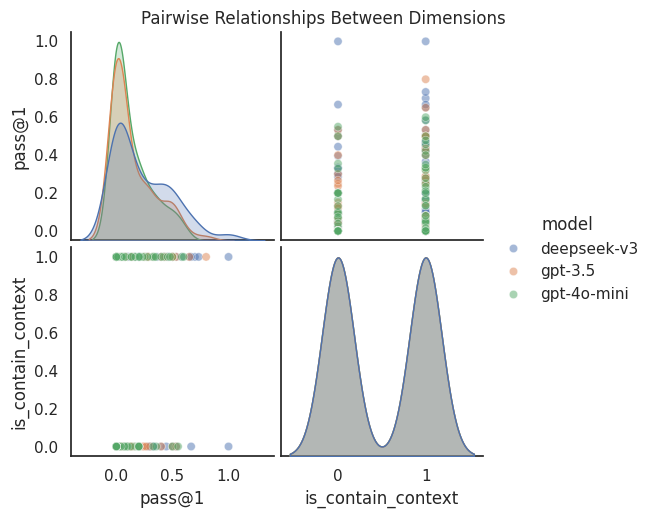

In [ ]:
from string import ascii_letters

sns.set(style="white")

# 随机数据集
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# 计算相关系数
corr = d.corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 设置图形大小
f, ax = plt.subplots(figsize=(11, 9))

# 生成自定义颜色
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# 绘制热力图
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



/tmp/ipykernel_2089533/2701624552.py:14: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros_like(corr, dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

deepseek-v3 vs. gpt-3.5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.350e-01 U_stat=2.188e+03
gpt-3.5 vs. gpt-4o-mini: Mann-Whitney-Wilcoxon test two-sided, P_val:6.942e-01 U_stat=1.989e+03
deepseek-v3 vs. gpt-4o-mini: Mann-Whitney-Wilcoxon test two-sided, P_val:5.456e-02 U_stat=2.262e+03


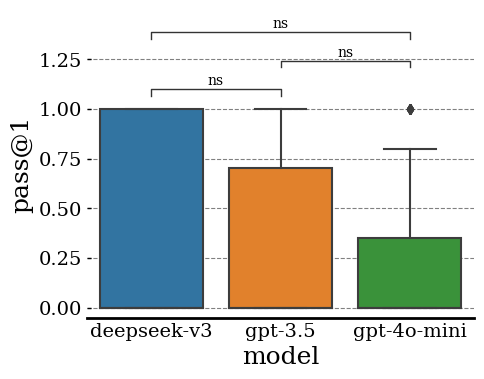

In [ ]:
import pandas as pd
import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statannotations.Annotator import Annotator

test_df = pd.read_csv('result/test_result.csv')
test_with_context_df = test_df[test_df["is_contain_context"]==True]
test_without_context_df = test_df[test_df["is_contain_context"]==False]

plt.rcParams['font.family'] = 'serif'  
plt.rcParams["axes.labelsize"] = 18  # 设置坐标轴标签字体大小为 18

palette = ['#0073C2FF', '#EFC000FF', '#868686FF']  # 蓝、黄、灰

fig, ax = plt.subplots(figsize=(5,4), dpi=100, facecolor="w")
order = ['deepseek-v3','gpt-3.5','gpt-4o-mini']
ax = sns.boxplot(
    x="model", 
    y="pass@1",  
    data=test_with_context_df,  
    order = order,
    ax=ax
)
pairs=[("deepseek-v3", "gpt-3.5"),("gpt-3.5", "gpt-4o-mini"),("deepseek-v3", "gpt-4o-mini")]
# 计算 P 值
annotator = Annotator(ax, pairs, data=test_with_context_df, x="model", y="pass@1", order=order)
annotator.configure(test='Mann-Whitney', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()

ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=14,bottom=False)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.grid(axis='y',ls='--',c='gray')
ax.set_axisbelow(True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

gpt-3.5_False vs. gpt-3.5_True: t-test independent samples, P_val:6.253e-04 t=-3.512e+00
deepseek-v3_False vs. deepseek-v3_True: t-test independent samples, P_val:5.711e-03 t=-2.814e+00
gpt-4o-mini_False vs. gpt-4o-mini_True: t-test independent samples, P_val:4.033e-02 t=-2.072e+00


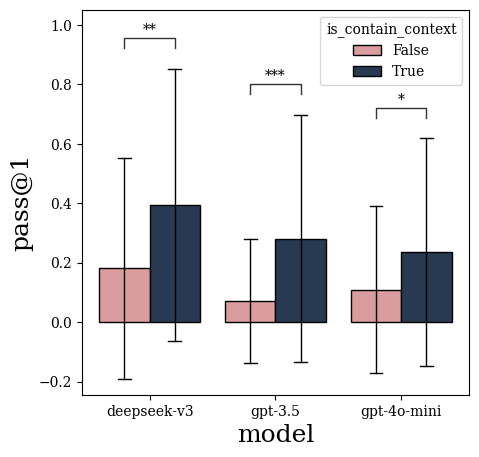

In [ ]:
import pandas as pd
from statannotations.Annotator import Annotator
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['serif']
plt.rcParams["axes.labelsize"] = 18
palette=['#E69195','#213958']

test_df = pd.read_csv('result/test_result.csv')
fig,ax = plt.subplots(figsize=(5,5),dpi=100,facecolor="w")
ax = sns.barplot(x="model",y="pass@1",hue="is_contain_context",data=test_df,palette=palette,ci="sd",
                 capsize=.1,errwidth=1,errcolor="k",ax=ax,
                 **{"edgecolor":"k","linewidth":1})

# 添加P值
box_pairs = [(("deepseek-v3",True),("deepseek-v3",False)),
             (("gpt-3.5",True),("gpt-3.5",False)),
             (("gpt-4o-mini",True),("gpt-4o-mini",False))]


annotator =  Annotator(ax, data=test_df, x="model",y="pass@1",hue="is_contain_context",
                      pairs=box_pairs)
annotator.configure(test='t-test_ind', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()
plt.savefig('figs/pass@1.png')



p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

gpt-3.5_False vs. gpt-3.5_True: t-test independent samples, P_val:2.731e-03 t=-3.059e+00
deepseek-v3_False vs. deepseek-v3_True: t-test independent samples, P_val:1.499e-02 t=-2.468e+00
gpt-4o-mini_False vs. gpt-4o-mini_True: t-test independent samples, P_val:6.082e-03 t=-2.792e+00


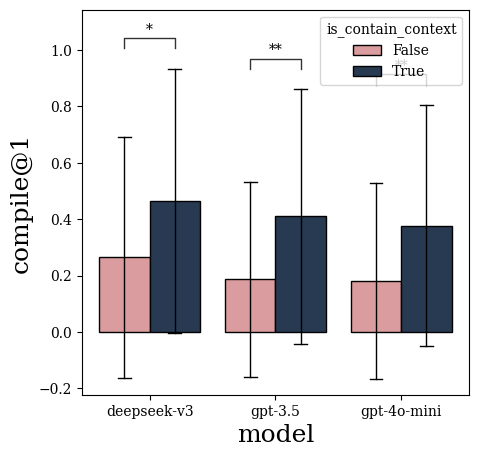

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['serif']
plt.rcParams["axes.labelsize"] = 18
palette=['#E69195','#213958']

test_df = pd.read_csv('result/compile_result.csv')
fig,ax = plt.subplots(figsize=(5,5),dpi=100,facecolor="w")
ax = sns.barplot(x="model",y="compile@1",hue="is_contain_context",data=test_df,palette=palette,ci="sd",
                 capsize=.1,errwidth=1,errcolor="k",ax=ax,
                 **{"edgecolor":"k","linewidth":1})

# 添加P值
box_pairs = [(("deepseek-v3",True),("deepseek-v3",False)),
             (("gpt-3.5",True),("gpt-3.5",False)),
             (("gpt-4o-mini",True),("gpt-4o-mini",False))]


annotator =  Annotator(ax, data=test_df, x="model",y="compile@1",hue="is_contain_context",
                      pairs=box_pairs)
annotator.configure(test='t-test_ind', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()
plt.savefig('figs/compile@1.png')

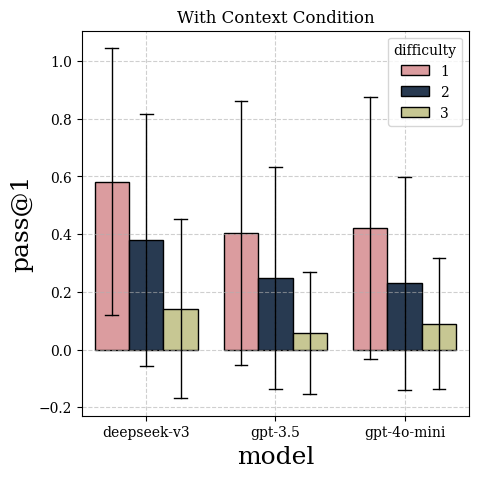

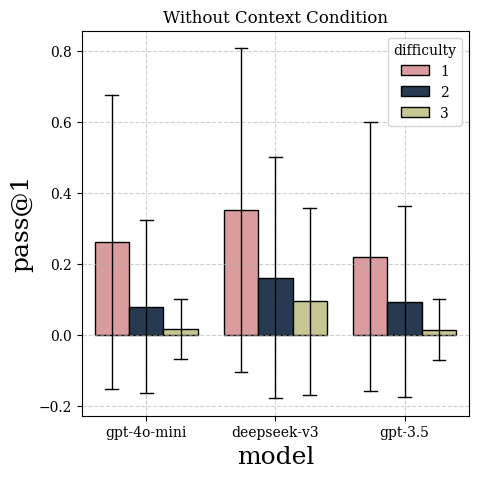

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['serif']
plt.rcParams["axes.labelsize"] = 18
palette=['#E69195','#213958',"#D0D08A"]

test_df = pd.read_csv('result/test_result.csv')
with_context_df = test_df[test_df['is_contain_context']==True]

fig,ax = plt.subplots(figsize=(5,5),dpi=100,facecolor="w")
ax = sns.barplot(x="model",y="pass@1",hue="difficulty",data=with_context_df,palette=palette,ci="sd",
                 capsize=.1,errwidth=1,errcolor="k",ax=ax,
                 **{"edgecolor":"k","linewidth":1})
ax.set_title("With Context Condition")
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

without_context_df = test_df[test_df['is_contain_context']==False]
fig,ax = plt.subplots(figsize=(5,5),dpi=100,facecolor="w")
ax = sns.barplot(x="model",y="pass@1",hue="difficulty",data=without_context_df,palette=palette,ci="sd",
                 capsize=.1,errwidth=1,errcolor="k",ax=ax,
                 **{"edgecolor":"k","linewidth":1})
ax.set_title("Without Context Condition")
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

<class 'pandas.core.frame.DataFrame'>
sum:37.82443713961172
Area difference between True and False: 0.2126
sum:77.99631143885561
Area difference between True and False: 0.3001
sum:32.05502334426477
Area difference between True and False: 0.1960


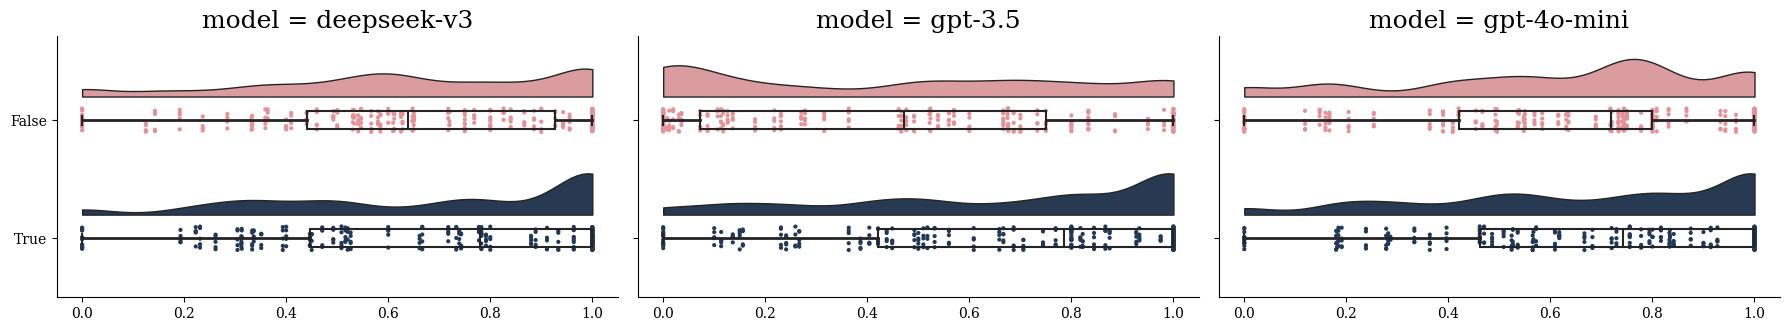

sum:63.07810288107342
Area difference between True and False: 0.3469
sum:63.02871242102006
Area difference between True and False: 0.2098
sum:54.063134289236984
Area difference between True and False: 0.3526


<Figure size 640x480 with 0 Axes>

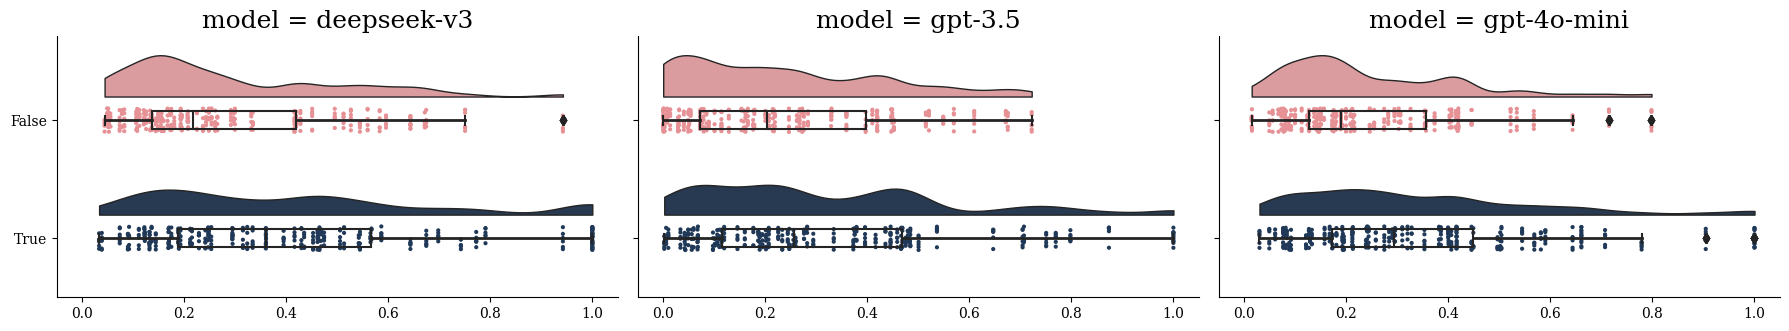

sum:52.776795731982226
Area difference between True and False: 0.3716
sum:59.517786298462184
Area difference between True and False: 0.3837
sum:44.55708727892423
Area difference between True and False: 0.3574


<Figure size 640x480 with 0 Axes>

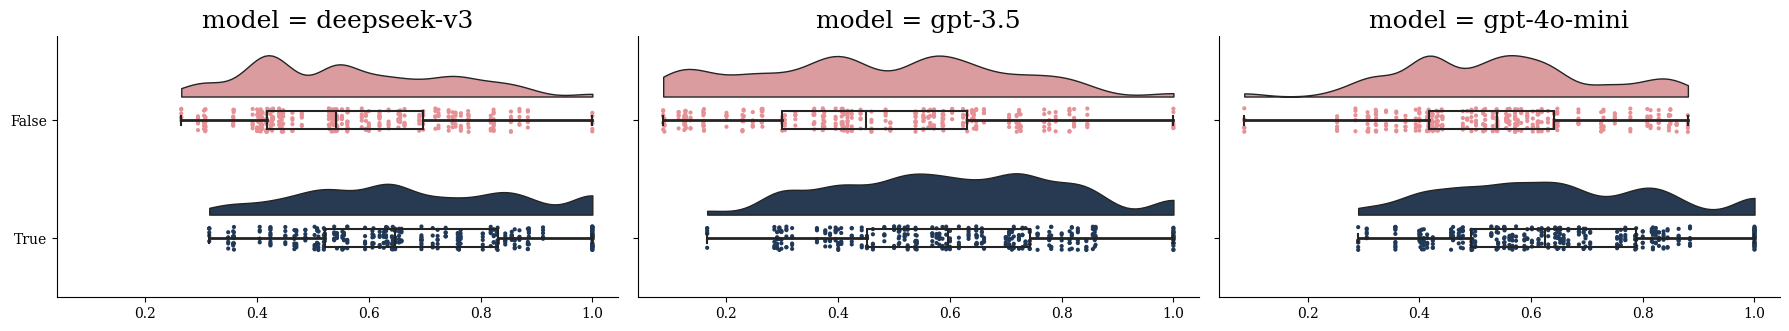

sum:55.69821358844277
Area difference between True and False: 0.3421
sum:55.484278937614064
Area difference between True and False: 0.4249
sum:40.42837423432928
Area difference between True and False: 0.2775


<Figure size 640x480 with 0 Axes>

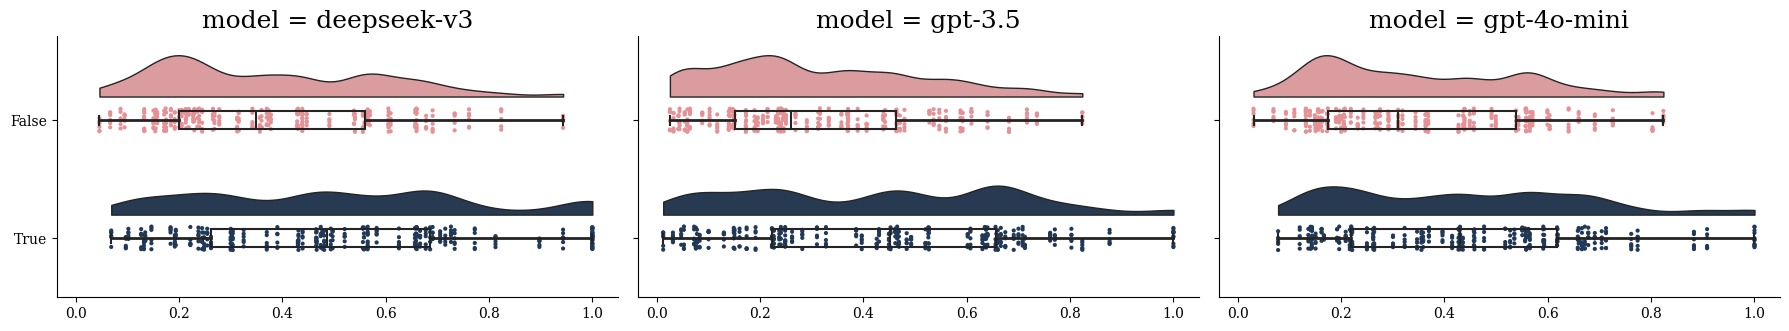

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt
import numpy as np
from scipy.stats import gaussian_kde

plt.rcParams['font.family'] = ['serif']
plt.rcParams["axes.labelsize"] = 18
palette=['#E69195','#213958']

def plot_with_area_diff(data, **kwargs):
    # 提取两组数据
    groups = data["is_contain_context"].unique()
    if len(groups) != 2:
        return
    
    group1 = data[data["is_contain_context"] == groups[0]]["mean"]
    group2 = data[data["is_contain_context"] == groups[1]]["mean"]
    arr1 = np.array(group1)
    arr2 = np.array(group2)
    result = np.sum(np.abs(arr1 - arr2))
    print(f"sum:{result}")
    
    # 计算 KDE
    kde1 = gaussian_kde(group1)
    kde2 = gaussian_kde(group2)
    
    # 生成 x 轴
    x_min = min(group1.min(), group2.min())
    x_max = max(group1.max(), group2.max())
    x = np.linspace(x_min, x_max, 1000)
    
    # 计算 y 值
    y1 = kde1(x)
    y2 = kde2(x)
    
    # 计算面积差
    area_diff = np.trapz(np.abs(y1 - y2), x)
    print(f"Area difference between {groups[0]} and {groups[1]}: {area_diff:.4f}")
    
    # 绘制RainCloud图
    pt.RainCloud(x="is_contain_context", y="mean", data=data, orient="h", **kwargs)

dataflow_match_score_df = pd.read_csv ("result/dataflow_match_score.csv", sep= ",") 
print(type(dataflow_match_score_df))   
g = sns.FacetGrid(dataflow_match_score_df, col="model", height=4, aspect=1.5)
g.map_dataframe(plot_with_area_diff, bw=0.2, width_viol=0.7,palette=palette)
g.fig.subplots_adjust(top=0.75)
plt.show()
plt.savefig('/home/zyx/code/rostm/rostm/figs/dataflow_match_score.png')

ngram_match_score_df = pd.read_csv ("result/ngram_match_score.csv", sep= ",")
g=sns.FacetGrid(ngram_match_score_df, col="model", height=4, aspect=1.5)
g.map_dataframe(plot_with_area_diff, bw=0.2, width_viol=0.7, palette=palette)
g.fig.subplots_adjust(top=0.75)
plt.show()
plt.savefig('/home/zyx/code/rostm/rostm/figs/ngram_match_score.png')

syntax_match_score_df = pd.read_csv ("result/syntax_match_score.csv", sep= ",")
g=sns.FacetGrid(syntax_match_score_df, col="model", height=4, aspect=1.5)
g.map_dataframe(plot_with_area_diff, bw=0.2, width_viol=0.7, palette=palette)
g.fig.subplots_adjust(top=0.75)
plt.show()
plt.savefig('/home/zyx/code/rostm/rostm/figs/syntax_match_score.png')

weighted_ngram_match_score_df = pd.read_csv ("result/weighted_ngram_match_score.csv", sep= ",")
g=sns.FacetGrid(weighted_ngram_match_score_df, col="model", height=4, aspect=1.5)
g.map_dataframe(plot_with_area_diff, bw=0.2, width_viol=0.7, palette=palette)
g.fig.subplots_adjust(top=0.75)
plt.show()
plt.savefig('/home/zyx/code/rostm/rostm/figs/weighted_ngram_match_score.png')

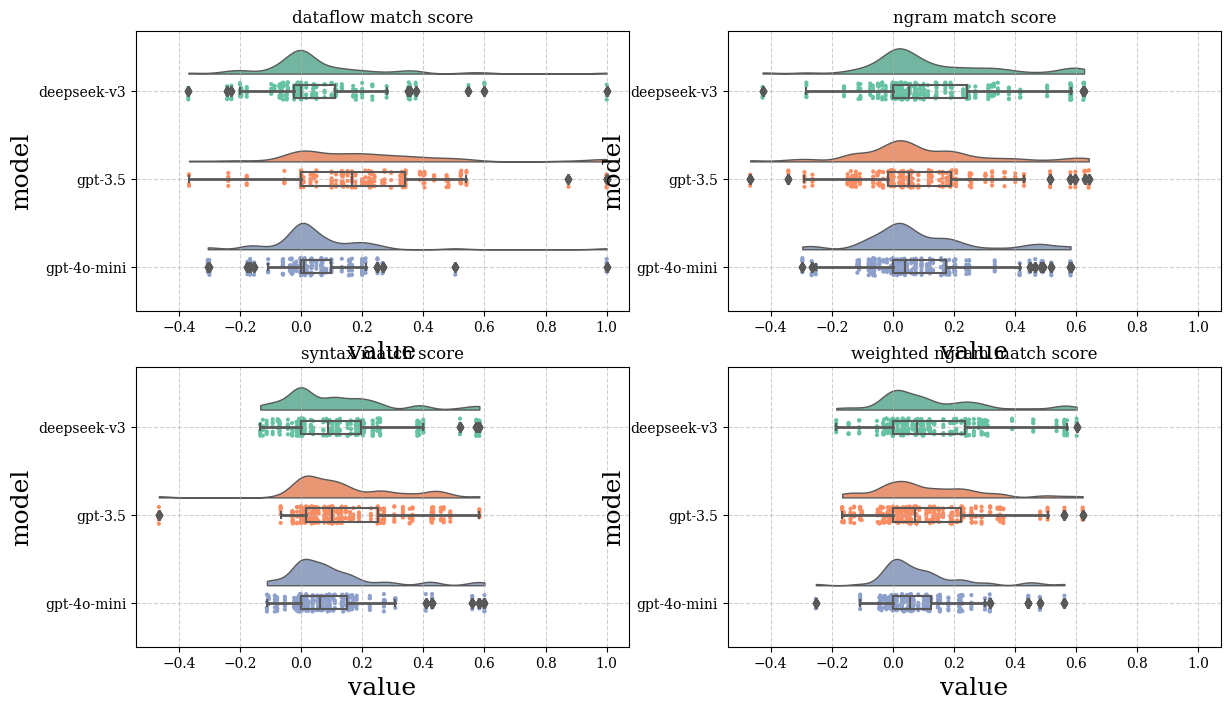

In [ ]:
import pandas as pd
import csv
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 2)

# 共享坐标轴
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs[1, 0], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs[1, 1], sharex=ax1, sharey=ax1)

with open('result/dataflow_match_score.csv', 'r') as file:
    reader = csv.reader(file)
    dataflow_match_score_rows = list(reader)  # 读取所有行

dataflow_match_score_rows = dataflow_match_score_rows[1:]
new_data=list()
for row1, row2 in zip(dataflow_match_score_rows[::2], dataflow_match_score_rows[1::2]):
    new_data.append([row1[0]] + [row1[2]] + [float(row1[-1]) - float(row2[-1])])
dataflow_match_score_df = pd.DataFrame(new_data, columns=["file_name", "model","value"])
   
dy="value"; dx="model"; ort="h"; pal="Set2"; sigma=.2
pt.RainCloud(x=dx, y=dy, data=dataflow_match_score_df, palette=pal, bw=sigma,
             width_viol = .6, ax = ax1, orient = ort)
ax1.set_title("dataflow match score")
ax1.grid(True, linestyle='--', alpha=0.6)

with open('result/ngram_match_score.csv', 'r') as file:
    reader = csv.reader(file)
    ngram_match_score_rows = list(reader)  # 读取所有行

ngram_match_score_rows = ngram_match_score_rows[1:]
new_data=list()
for row1, row2 in zip(ngram_match_score_rows[::2], ngram_match_score_rows[1::2]):
    new_data.append([row1[0]] + [row1[2]] + [float(row1[-1]) - float(row2[-1])])
ngram_match_score_df = pd.DataFrame(new_data, columns=["file_name", "model","value"])
   
dy="value"; dx="model"; ort="h"; pal="Set2"; sigma=.2
pt.RainCloud(x=dx, y=dy, data=ngram_match_score_df, palette=pal, bw=sigma,
             width_viol = .6, ax = ax2, orient = ort)
ax2.set_title("ngram match score")
ax2.grid(True, linestyle='--', alpha=0.6)

with open('result/syntax_match_score.csv', 'r') as file:
    reader = csv.reader(file)
    syntax_match_score_rows = list(reader)  # 读取所有行

syntax_match_score_rows = syntax_match_score_rows[1:]
new_data=list()
for row1, row2 in zip(syntax_match_score_rows[::2], syntax_match_score_rows[1::2]):
    new_data.append([row1[0]] + [row1[2]] + [float(row1[-1]) - float(row2[-1])])
syntax_match_score_df = pd.DataFrame(new_data, columns=["file_name", "model","value"])
   
dy="value"; dx="model"; ort="h"; pal="Set2"; sigma=.2
pt.RainCloud(x=dx, y=dy, data=syntax_match_score_df, palette=pal, bw=sigma,
             width_viol = .6, ax = ax3, orient = ort)
ax3.set_title("syntax match score")
ax3.grid(True, linestyle='--', alpha=0.6)

with open('result/weighted_ngram_match_score.csv', 'r') as file:
    reader = csv.reader(file)
    weighted_ngram_match_score_rows = list(reader)  # 读取所有行

weighted_ngram_match_score_rows = weighted_ngram_match_score_rows[1:]
new_data=list()
for row1, row2 in zip(weighted_ngram_match_score_rows[::2], weighted_ngram_match_score_rows[1::2]):
    new_data.append([row1[0]] + [row1[2]] + [float(row1[-1]) - float(row2[-1])])
weighted_ngram_match_score_df = pd.DataFrame(new_data, columns=["file_name", "model","value"])
   
dy="value"; dx="model"; ort="h"; pal="Set2"; sigma=.2
pt.RainCloud(x=dx, y=dy, data=weighted_ngram_match_score_df, palette=pal, bw=sigma,
             width_viol = .6, ax = ax4, orient = ort)
ax4.set_title("weighted ngram match score")
ax4.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
import pandas as pd
from tabulate import tabulate

test_df = pd.read_csv('/home/zyx/republication/emperiment_result/result_backup.csv')

def get_filtered_data(data,model,label):
    return data[(data['model'] == model)][label].mean()

def get_result(data,label):  
    table = {
        "deepseek":[get_filtered_data(data,'deepseek',label)],
        "gpt-4o":[get_filtered_data(data,'gpt-4o',label)],
        "llama":[get_filtered_data(data,'llama',label)]
    } 
    return pd.DataFrame(table)

test_result = get_result(test_df,'pass@1')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

compile_result = get_result(test_df,'pass@5')
print(tabulate(compile_result,headers='keys',tablefmt='grid',showindex=False))

compile_result = get_result(test_df,'compile@1')
print(tabulate(compile_result,headers='keys',tablefmt='grid',showindex=False))

compile_result = get_result(test_df,'compile@5')
print(tabulate(compile_result,headers='keys',tablefmt='grid',showindex=False))


ModuleNotFoundError: No module named 'pandas'

In [ ]:
/bin/python3 -m pip install ipykernel -U --user --force-reinstall

: 

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from scipy import stats

test_df = pd.read_csv('result/autoware/result_backup.csv')

def get_filtered_data(data,model,label):
    return data[(data['model'] == model)][label].to_numpy()

def get_pass(a_results,b_results):
    a_pass_rate = np.mean(a_results)
    statistic, p_value = stats.mannwhitneyu(a_results, b_results, alternative='two-sided')
    return  a_pass_rate,statistic,p_value


def get_result(data,label):  
    table = {
        "context/model":["metric","U-value","P-value"],
        "deepseek":get_pass(get_filtered_data(data,'deepseek',label),get_filtered_data(data,'gpt-4o',label)),
        "gpt-4o":get_pass(get_filtered_data(data,'gpt-4o',label),get_filtered_data(data,'llama',label)),
        "llama":get_pass(get_filtered_data(data,'llama',label),get_filtered_data(data,'deepseek',label))
    } 
    return pd.DataFrame(table)

test_result = get_result(test_df,'pass@1')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

compile_result = get_result(test_df,'pass@5')
print(tabulate(compile_result,headers='keys',tablefmt='grid',showindex=False))

compile_result = get_result(test_df,'compile@1')
print(tabulate(compile_result,headers='keys',tablefmt='grid',showindex=False))

compile_result = get_result(test_df,'compile@5')
print(tabulate(compile_result,headers='keys',tablefmt='grid',showindex=False))


+-----------------+--------------+--------------+--------------+
| context/model   |     deepseek |       gpt-4o |        llama |
+=================+==============+==============+==============+
| metric          |     0.205833 |     0.175833 |     0.1925   |
+-----------------+--------------+--------------+--------------+
| U-value         | 29890        | 28751        | 27803        |
+-----------------+--------------+--------------+--------------+
| P-value         |     0.348871 |     0.965688 |     0.390054 |
+-----------------+--------------+--------------+--------------+
+-----------------+--------------+-------------+--------------+
| context/model   |     deepseek |      gpt-4o |        llama |
+=================+==============+=============+==============+
| metric          |     0.275    |     0.2375  |     0.233333 |
+-----------------+--------------+-------------+--------------+
| U-value         | 29880        | 28920       | 27600        |
+-----------------+------------

In [ ]:
test_df = pd.read_csv('result/autoware/result.csv')

def get_filtered_data(data, model, context, label):
    # 基础过滤条件
    condition = (data['model'] == model)
    
    # 只有当 context 不为空时才添加 element 过滤条件
    if context and pd.notna(context):
        condition = condition & (data['element'].str.contains(context, na=False))
    else:
        # 如果 context 为空，只选择 element 不为空的行
        print(data['element'])
        condition = condition & (data['element'] == '[]')
    
    return data[condition][label].mean()

get_filtered_data(test_df,'deepseek','','pass@1')

0                                                     []
1                                                     []
2                                                     []
3      has_domain_library,has_topic,has_parameter,has...
4      has_domain_library,has_topic,has_parameter,has...
                             ...                        
718                       has_domain_library,has_message
719                       has_domain_library,has_message
720                    has_topic,has_parameter,has_timer
721                    has_topic,has_parameter,has_timer
722                    has_topic,has_parameter,has_timer
Name: element, Length: 723, dtype: object


0.26046511627906976

In [ ]:
import pandas as pd
from tabulate import tabulate

test_df = pd.read_csv('result/autoware/result_backup.csv')

def get_filtered_data(data, model, context, label):
    # 基础过滤条件
    condition = (data['model'] == model)
    
    # 只有当 context 不为空时才添加 element 过滤条件
    if context and pd.notna(context):
        condition = condition & (data['element'].str.contains(context, na=False))
    else:
        # 如果 context 为空，只选择 element 不为空的行
        condition = condition & (data['element'].notna()) & (data['element'] != '')
    
    return data[condition][label].mean()

def get_result(data,label):  
    table = {
        "context/model":["has_domain_library","has_service","has_topic","has_parameter","has_message","has_timer","has_logger","has_diagnostic",""],
        "deepseek":[get_filtered_data(data,'deepseek','has_domain_library',label),get_filtered_data(data,'deepseek','has_service',label),get_filtered_data(data,'deepseek','has_topic',label),get_filtered_data(data,'deepseek','has_parameter',label),get_filtered_data(data,'deepseek','has_message',label),get_filtered_data(data,'deepseek','has_timer',label),get_filtered_data(data,'deepseek','has_logger',label),get_filtered_data(data,'deepseek','has_diagnostic',label),get_filtered_data(data,'deepseek','',label)],
        "gpt-4o":[get_filtered_data(data,'gpt-4o','has_domain_library',label),get_filtered_data(data,'gpt-4o','has_service',label),get_filtered_data(data,'gpt-4o','has_topic',label),get_filtered_data(data,'gpt-4o','has_parameter',label),get_filtered_data(data,'gpt-4o','has_message',label),get_filtered_data(data,'gpt-4o','has_timer',label),get_filtered_data(data,'gpt-4o','has_logger',label),get_filtered_data(data,'gpt-4o','has_diagnostic',label),get_filtered_data(data,'gpt-4o','',label)],
        "claude":[get_filtered_data(data,'claude','has_domain_library',label),get_filtered_data(data,'claude','has_service',label),get_filtered_data(data,'claude','has_topic',label),get_filtered_data(data,'claude','has_parameter',label),get_filtered_data(data,'claude','has_message',label),get_filtered_data(data,'claude','has_timer',label),get_filtered_data(data,'claude','has_logger',label),get_filtered_data(data,'claude','has_diagnostic',label),get_filtered_data(data,'claude','',label)]
    } 
    return pd.DataFrame(table)

test_result = get_result(test_df,'pass@1')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

compile_result = get_result(test_df,'pass@5')
print(tabulate(compile_result,headers='keys',tablefmt='grid',showindex=False))

compile_result = get_result(test_df,'compile@1')
print(tabulate(compile_result,headers='keys',tablefmt='grid',showindex=False))

compile_result = get_result(test_df,'compile@5')
print(tabulate(compile_result,headers='keys',tablefmt='grid',showindex=False))


+--------------------+------------+-----------+-----------+
| context/model      |   deepseek |    gpt-4o |     llama |
+====================+============+===========+===========+
| has_domain_library |  0.168254  | 0.212698  | 0.168254  |
+--------------------+------------+-----------+-----------+
| has_service        |  0.0285714 | 0         | 0         |
+--------------------+------------+-----------+-----------+
| has_topic          |  0.179747  | 0.0582278 | 0.0936709 |
+--------------------+------------+-----------+-----------+
| has_parameter      |  0.125926  | 0.0592593 | 0.0703704 |
+--------------------+------------+-----------+-----------+
| has_message        |  0.223438  | 0.134375  | 0.154687  |
+--------------------+------------+-----------+-----------+
| has_timer          |  0.178462  | 0.0707692 | 0.0830769 |
+--------------------+------------+-----------+-----------+
| has_logger         |  0.141818  | 0.0727273 | 0.138182  |
+--------------------+------------+-----

Pass@1 结果分析 - Mann-Whitney U检验
has_logger:
  - 通过数: 18/55 (0.327)
  - 通过率: 0.327
has_parameter:
  - 通过数: 96/240 (0.400)
  - 通过率: 0.400
通过率差异: 0.073

Mann-Whitney U检验结果
U统计量: 6120.0000
p值: 0.319078
显著性水平: α = 0.05
效应量 (Cliff's delta): -0.0727
效应量大小: 可忽略
结果: 统计不显著 (p ≥ 0.05)
结论: 没有足够证据表明两个模型存在显著差异


/home/zyx/code/rostm/rostm/.venv/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zyx/code/rostm/rostm/.venv/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36807 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zyx/code/rostm/rostm/.venv/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zyx/code/rostm/rostm/.venv/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zyx/code/rostm/rostm/.venv/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36739 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zyx/code/rostm/rostm/.ve

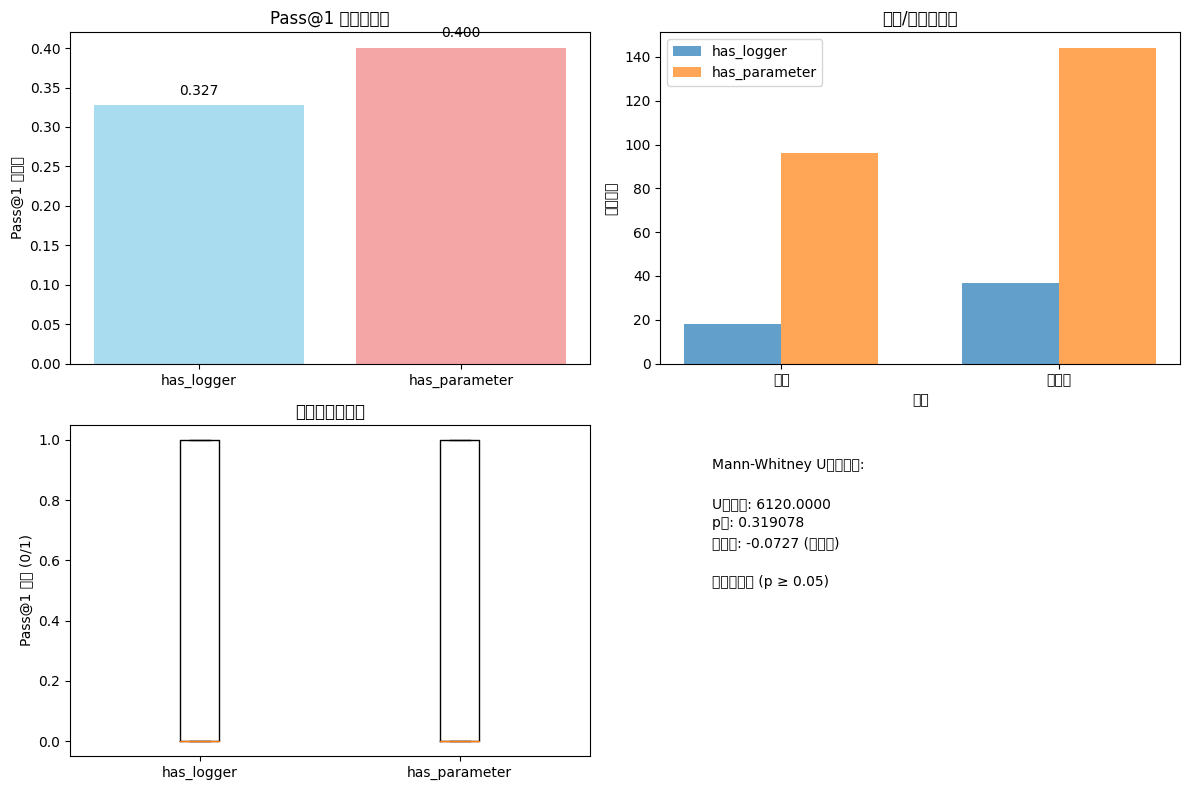


结果总结:
        Metric      Value
0    Pass Rate      0.073
1  U Statistic  6120.0000
2      P-value   0.319078
3  Effect Size    -0.0727
4  Significant      False


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_pass_at_1_mannwhitney(model_a_results, model_b_results, model_a_name="Model A", model_b_name="Model B", alpha=0.05):
    """
    对两个模型的pass@1结果进行Mann-Whitney U检验分析
    
    Parameters:
    -----------
    model_a_results : list or array
        模型A的pass@1结果列表（每个样本的通过情况：1通过，0未通过）
    model_b_results : list or array
        模型B的pass@1结果列表
    model_a_name : str
        模型A的名称
    model_b_name : str
        模型B的名称
    alpha : float
        显著性水平
    
    Returns:
    --------
    dict : 包含所有分析结果的字典
    """
    
    # 转换为numpy数组
    a_results = np.array(model_a_results)
    b_results = np.array(model_b_results)
    
    # 基本统计信息
    a_pass_rate = np.mean(a_results)
    b_pass_rate = np.mean(b_results)
    a_total = len(a_results)
    b_total = len(b_results)
    a_passes = np.sum(a_results)
    b_passes = np.sum(b_results)
    
    print("=" * 60)
    print(f"Pass@1 结果分析 - Mann-Whitney U检验")
    print("=" * 60)
    print(f"{model_a_name}:")
    print(f"  - 通过数: {a_passes}/{a_total} ({a_pass_rate:.3f})")
    print(f"  - 通过率: {a_pass_rate:.3f}")
    print(f"{model_b_name}:")
    print(f"  - 通过数: {b_passes}/{b_total} ({b_pass_rate:.3f})")
    print(f"  - 通过率: {b_pass_rate:.3f}")
    print(f"通过率差异: {b_pass_rate - a_pass_rate:.3f}")
    
    # 执行Mann-Whitney U检验
    statistic, p_value = stats.mannwhitneyu(a_results, b_results, alternative='two-sided')
    
    print("\n" + "=" * 40)
    print("Mann-Whitney U检验结果")
    print("=" * 40)
    print(f"U统计量: {statistic:.4f}")
    print(f"p值: {p_value:.6f}")
    print(f"显著性水平: α = {alpha}")
    
    # 效应量计算
    # 使用Cliff's delta作为效应量
    def cliffs_delta(x, y):
        """计算Cliff's delta效应量"""
        n_x, n_y = len(x), len(y)
        wins = 0
        ties = 0
        
        for i in range(n_x):
            for j in range(n_y):
                if x[i] > y[j]:
                    wins += 1
                elif x[i] == y[j]:
                    ties += 1
        
        delta = (wins - (n_x * n_y - wins - ties)) / (n_x * n_y)
        return delta
    
    effect_size = cliffs_delta(a_results, b_results)
    
    print(f"效应量 (Cliff's delta): {effect_size:.4f}")
    
    # 效应量解释
    if abs(effect_size) < 0.147:
        effect_interpretation = "可忽略"
    elif abs(effect_size) < 0.33:
        effect_interpretation = "小"
    elif abs(effect_size) < 0.474:
        effect_interpretation = "中"
    else:
        effect_interpretation = "大"
    
    print(f"效应量大小: {effect_interpretation}")
    
    # 统计显著性判断
    if p_value < alpha:
        print(f"结果: 统计显著 (p < {alpha})")
        if b_pass_rate > a_pass_rate:
            print(f"结论: {model_b_name} 显著优于 {model_a_name}")
        else:
            print(f"结论: {model_a_name} 显著优于 {model_b_name}")
    else:
        print(f"结果: 统计不显著 (p ≥ {alpha})")
        print(f"结论: 没有足够证据表明两个模型存在显著差异")
    
    # 可视化
    plt.figure(figsize=(12, 8))
    
    # 子图1: 通过率比较
    plt.subplot(2, 2, 1)
    rates = [a_pass_rate, b_pass_rate]
    models = [model_a_name, model_b_name]
    bars = plt.bar(models, rates, color=['skyblue', 'lightcoral'], alpha=0.7)
    plt.ylabel('Pass@1 通过率')
    plt.title('Pass@1 通过率比较')
    
    # 在柱状图上添加数值标签
    for bar, rate in zip(bars, rates):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{rate:.3f}', ha='center', va='bottom')
    
    # 子图2: 通过/未通过分布
    plt.subplot(2, 2, 2)
    categories = ['通过', '未通过']
    a_counts = [a_passes, a_total - a_passes]
    b_counts = [b_passes, b_total - b_passes]
    
    x = np.arange(len(categories))
    width = 0.35
    
    plt.bar(x - width/2, a_counts, width, label=model_a_name, alpha=0.7)
    plt.bar(x + width/2, b_counts, width, label=model_b_name, alpha=0.7)
    plt.xlabel('结果')
    plt.ylabel('样本数量')
    plt.title('通过/未通过分布')
    plt.xticks(x, categories)
    plt.legend()
    
    # 子图3: 箱线图
    plt.subplot(2, 2, 3)
    data = [a_results, b_results]
    plt.boxplot(data, labels=[model_a_name, model_b_name])
    plt.ylabel('Pass@1 结果 (0/1)')
    plt.title('结果分布箱线图')
    
    # 子图4: 统计检验信息
    plt.subplot(2, 2, 4)
    plt.axis('off')
    info_text = f'Mann-Whitney U检验结果:\n\n'
    info_text += f'U统计量: {statistic:.4f}\n'
    info_text += f'p值: {p_value:.6f}\n'
    info_text += f'效应量: {effect_size:.4f} ({effect_interpretation})\n\n'
    
    if p_value < alpha:
        info_text += f'统计显著 (p < {alpha})'
        if b_pass_rate > a_pass_rate:
            info_text += f'\n{model_b_name} 显著更优'
        else:
            info_text += f'\n{model_a_name} 显著更优'
    else:
        info_text += f'统计不显著 (p ≥ {alpha})'
    
    plt.text(0.1, 0.9, info_text, transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', linespacing=1.5)
    
    plt.tight_layout()
    plt.show()
    
    # 返回详细结果
    return {
        'model_a': {
            'name': model_a_name,
            'pass_rate': a_pass_rate,
            'total_samples': a_total,
            'pass_count': a_passes
        },
        'model_b': {
            'name': model_b_name,
            'pass_rate': b_pass_rate,
            'total_samples': b_total,
            'pass_count': b_passes
        },
        'test_results': {
            'statistic': statistic,
            'p_value': p_value,
            'effect_size': effect_size,
            'effect_interpretation': effect_interpretation,
            'significant': p_value < alpha,
            'difference': b_pass_rate - a_pass_rate
        }
    }

def get_filtered_data(data, model, context, label):
    # 基础过滤条件
    condition = (data['model'] == model)

    if context and pd.notna(context):
        condition = condition & (data['element'].str.contains(context, na=False))
    else:
        # 如果 context 为空，只选择 element 不为空的行
        condition = condition & (data['element'].notna()) & (data['element'] != '')
    
    return data[condition][label]

def get_filtered_data_2(data, model, label):
    # 基础过滤条件
    condition = (data['model'] == model)

    
    return data[condition][label]

# 示例使用
def analyze(model,element_1,element_2,metric):
    # 生成示例数据
    np.random.seed(42)
    
    # 模型A: 通过率约60%

    test_df = pd.read_csv('result/autoware/result_backup.csv')
    model_a_results = get_filtered_data(test_df,model,element_1,metric).to_numpy()
    
    # 模型B: 通过率约75%
    model_b_results = get_filtered_data_2(test_df,model,metric).to_numpy()
    
    # 执行分析
    results = analyze_pass_at_1_mannwhitney(
        model_a_results, 
        model_b_results, 
        model_a_name=element_1, 
        model_b_name=element_2
    )
    
    # 保存结果到文件（可选）
    results_df = pd.DataFrame({
        'Metric': ['Pass Rate', 'U Statistic', 'P-value', 'Effect Size', 'Significant'],
        'Value': [
            f"{results['model_b']['pass_rate'] - results['model_a']['pass_rate']:.3f}",
            f"{results['test_results']['statistic']:.4f}",
            f"{results['test_results']['p_value']:.6f}",
            f"{results['test_results']['effect_size']:.4f}",
            results['test_results']['significant']
        ]
    })
    
    print("\n结果总结:")
    print(results_df)
analyze('gpt-4o','has_logger','has_parameter','compile@5')

In [ ]:
import pandas as pd
from tabulate import tabulate

test_df = pd.read_csv('result/autoware/result_backup.csv')
print(pd.DataFrame(test_df['cyclomatic_complexity_ground_truth']).describe())

print(pd.DataFrame(test_df['sloc_ground_truth']).describe())


       cyclomatic_complexity_ground_truth
count                          720.000000
mean                             3.445833
std                              2.499482
min                              1.000000
25%                              2.000000
50%                              3.000000
75%                              4.250000
max                             15.000000
       sloc_ground_truth
count         720.000000
mean           24.791667
std            19.408455
min             7.000000
25%            14.000000
50%            19.000000
75%            28.000000
max           151.000000


In [ ]:
analysis_df = test_df['element']
def count_commas(text):
    if pd.isna(text) or text=='[]':
        return 0
    return str(text).count(',')+1
analysis_df['comma_count'] = test_df['element'].apply(count_commas)
print(analysis_df['comma_count'].describe())

count    720.000000
mean       1.920833
std        1.351086
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: element, dtype: float64


/tmp/ipykernel_119297/2770156962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['comma_count'] = test_df['element'].apply(count_commas)


In [ ]:
import numpy as np
test_df = pd.read_csv('result/autoware/result.csv')

def get_filtered_data(data,model,context,label):
    return data[(data['model'] == model) & (data['category'] == context)][label]


def calculate_cv(data):
    """
    计算变异系数(Coefficient of Variation, CV)
    
    参数:
    data: 列表、数组或Pandas Series格式的数值数据
    
    返回:
    cv: 变异系数
    mean: 平均值
    std: 标准差
    """
    # 转换为numpy数组以便计算
    data_array = np.array(data)
    
    # 计算平均值和标准差
    mean = np.mean(data_array)
    std = np.std(data_array, ddof=0)  # 使用总体标准差，ddof=0
    
    # 计算变异系数
    cv = std / mean if mean != 0 else np.nan  # 避免除零错误
    
    return cv



def get_result(data,label):  
    table = {
        "context/model":["ros_architecture","utilities"],
        "deepseek":[calculate_cv(get_filtered_data(data,'deepseek','ros_architecture',label)),calculate_cv(get_filtered_data(data,'deepseek','utilities',label))],
        "gpt-4o":[calculate_cv(get_filtered_data(data,'gpt-4o','ros_architecture',label)),calculate_cv(get_filtered_data(data,'gpt-4o','utilities',label))],
        "llama":[calculate_cv(get_filtered_data(data,'llama','ros_architecture',label)),calculate_cv(get_filtered_data(data,'llama','utilities',label))]
    } 
    return pd.DataFrame(table)


test_result = get_result(test_df,'pass@1')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

test_result = get_result(test_df,'compile@1')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

test_result = get_result(test_df,'pass@5')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

test_result = get_result(test_df,'compile@5')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

+------------------+------------+-----------+-----------+
| context/model    |   deepseek |    gpt-4o |     llama |
+==================+============+===========+===========+
| ros_architecture |  nan       | nan       | nan       |
+------------------+------------+-----------+-----------+
| utilities        |    1.79208 |   1.63399 |   1.64077 |
+------------------+------------+-----------+-----------+
+------------------+------------+----------+---------+
| context/model    |   deepseek |   gpt-4o |   llama |
+==================+============+==========+=========+
| ros_architecture |    1.31305 |  1.86196 | 1.53174 |
+------------------+------------+----------+---------+
| utilities        |    1.08704 |  1.01562 | 1.10606 |
+------------------+------------+----------+---------+
+------------------+------------+-----------+-----------+
| context/model    |   deepseek |    gpt-4o |     llama |
+==================+============+===========+===========+
| ros_architecture |  nan       | n

In [ ]:
import numpy as np
test_df = pd.read_csv('result/autoware/result.csv')

def get_filtered_data(data,model,label):
    return data[(data['model'] == model)][label]


def calculate_cv(data):
    """
    计算变异系数(Coefficient of Variation, CV)
    
    参数:
    data: 列表、数组或Pandas Series格式的数值数据
    
    返回:
    cv: 变异系数
    mean: 平均值
    std: 标准差
    """
    # 转换为numpy数组以便计算
    data_array = np.array(data)
    
    # 计算平均值和标准差
    mean = np.mean(data_array)
    std = np.std(data_array, ddof=0)  # 使用总体标准差，ddof=0
    
    # 计算变异系数
    cv = std / mean if mean != 0 else np.nan  # 避免除零错误
    
    return cv



def get_result(data,label):  
    table = {
        "context/model":["all"],
        "deepseek":[calculate_cv(get_filtered_data(data,'deepseek',label))],
        "gpt-4o":[calculate_cv(get_filtered_data(data,'gpt-4o',label))],
        "llama":[calculate_cv(get_filtered_data(data,'llama',label))]
    } 
    return pd.DataFrame(table)


test_result = get_result(test_df,'pass@1')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

test_result = get_result(test_df,'compile@1')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

test_result = get_result(test_df,'pass@5')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

test_result = get_result(test_df,'compile@5')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

: 

In [ ]:
test_df = pd.read_csv('result/autoware/result.csv')

def get_filtered_data(data, model, context, min_val, max_val):
    return data[(data['model'] == model) & 
                (data['type'] == context) & 
                (data['pass@1'] >= min_val) & 
                (data['pass@1'] < max_val)] # 假设 'id' 是列名

test_result = get_filtered_data(test_df, 'deepseek', 'basic',0.8, 1)
# 输出结果
print("筛选结果:")
print("=" * 50)
for index, row in test_result.iterrows():
    print(f"ID: {row['id']}")
    print(f"Category: {row['category']}")
    print(f"Pass@1: {row['pass@1']}")
    print(f"Model: {row['model']}")
    print(f"Type: {row['type']}")
    print("-" * 30)

筛选结果:
ID: 13
Category: robot_application
Pass@1: 0.8
Model: deepseek
Type: basic
------------------------------
ID: 18
Category: robot_application
Pass@1: 0.8
Model: deepseek
Type: basic
------------------------------
ID: 26
Category: robot_application
Pass@1: 0.8
Model: deepseek
Type: basic
------------------------------
ID: 47
Category: robot_application
Pass@1: 0.8
Model: deepseek
Type: basic
------------------------------


+--------------------+---------------+-----------+---------------+
|   difficulty/model |   deepseek-v3 |   gpt-3.5 |   gpt-4o-mini |
+====================+===============+===========+===============+
|                  1 |      0.582514 | 0.403279  |     0.420765  |
+--------------------+---------------+-----------+---------------+
|                  2 |      0.379845 | 0.246512  |     0.229457  |
+--------------------+---------------+-----------+---------------+
|                  3 |      0.14188  | 0.0581197 |     0.0888889 |
+--------------------+---------------+-----------+---------------+
+--------------------+---------------+-----------+---------------+
|   difficulty/model |   deepseek-v3 |   gpt-3.5 |   gpt-4o-mini |
+====================+===============+===========+===============+
|                  1 |     0.351913  | 0.219672  |     0.262295  |
+--------------------+---------------+-----------+---------------+
|                  2 |     0.16124   | 0.0930233 |     0.07906

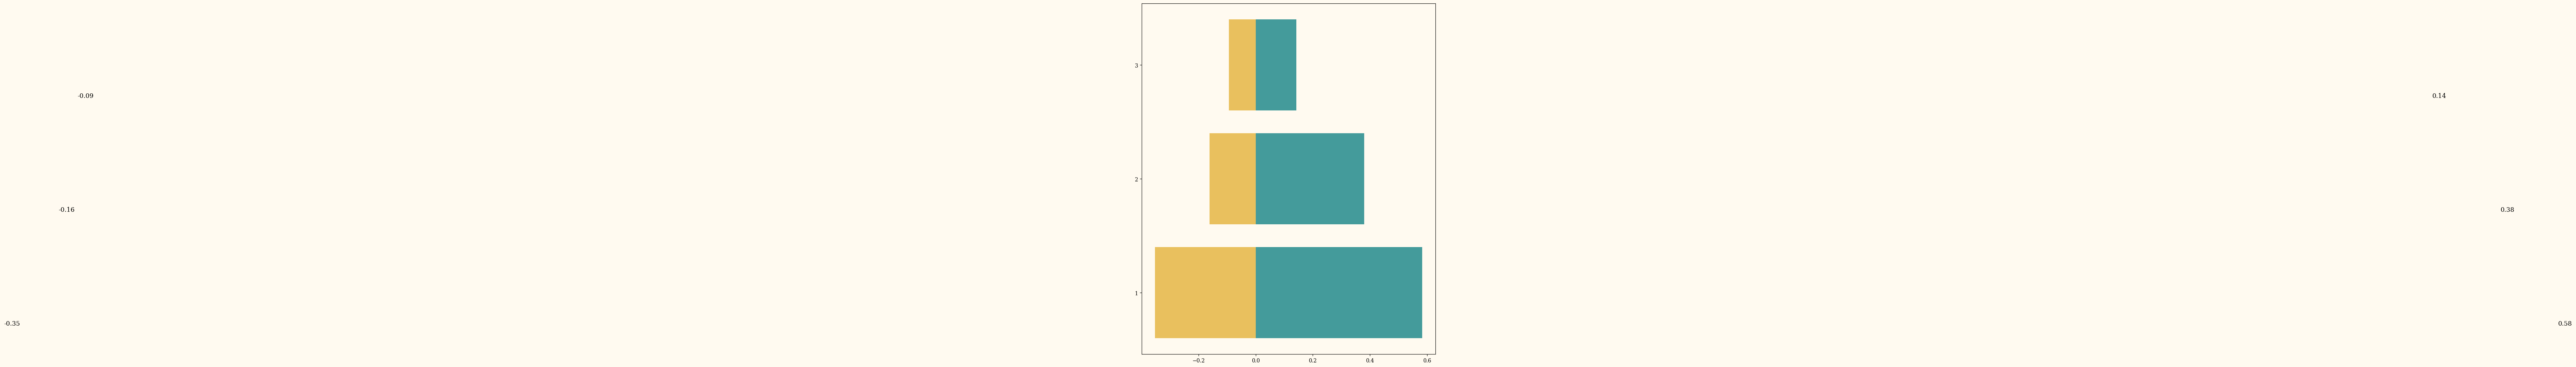

In [ ]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np


test_df = pd.read_csv('result/test_result.csv')

def get_filtered_data(data,model,context,difficulty,label):
    return data[(data['model'] == model) & (data['is_contain_context'] == context)& (data['difficulty'] == difficulty)][label].mean()

def get_result(data,context,label):  
    table = {
        "difficulty/model":["1","2","3"],
        "deepseek-v3":[get_filtered_data(data,'deepseek-v3',context,1,label),get_filtered_data(data,'deepseek-v3',context,2,label),get_filtered_data(data,'deepseek-v3',context,3,label)],
        "gpt-3.5":[get_filtered_data(data,'gpt-3.5',context,1,label),get_filtered_data(data,'gpt-3.5',context,2,label),get_filtered_data(data,'gpt-3.5',context,3,label)],
        "gpt-4o-mini":[get_filtered_data(data,'gpt-4o-mini',context,1,label),get_filtered_data(data,'gpt-4o-mini',context,2,label),get_filtered_data(data,'gpt-4o-mini',context,3,label)]
    } 
    return pd.DataFrame(table)

test_result = get_result(test_df,True,'pass@1')
print(tabulate(test_result,headers='keys',tablefmt='grid',showindex=False))

test_without_result = get_result(test_df,False,'pass@1')
print(tabulate(test_without_result,headers='keys',tablefmt='grid',showindex=False))


In [ ]:
dataflow_match_score_df = pd.read_csv('result/dataflow_match_score.csv')
ngram_match_score_df = pd.read_csv('result/ngram_match_score.csv')
syntax_match_score_df = pd.read_csv('result/syntax_match_score.csv')
weighted_ngram_match_score_df = pd.read_csv('result/weighted_ngram_match_score.csv')

def get_filtered_data(data,model,context,label):
    return data[(data['model'] == model) & (data['is_contain_context'] == context)][label].mean()

def get_result(data,label):  
    table = {
        "context/model":["with_context","without_context","percentage"],
        "deepseek-v3":[get_filtered_data(data,'deepseek-v3',True,label),get_filtered_data(data,'deepseek-v3',False,label),(get_filtered_data(data,'deepseek-v3',True,label)-get_filtered_data(data,'deepseek-v3',False,label))/get_filtered_data(data,'deepseek-v3',False,label)],
        "gpt-3.5":[get_filtered_data(data,'gpt-3.5',True,label),get_filtered_data(data,'gpt-3.5',False,label),(get_filtered_data(data,'gpt-3.5',True,label)-get_filtered_data(data,'gpt-3.5',False,label))/get_filtered_data(data,'gpt-3.5',False,label)],
        "gpt-4o-mini":[get_filtered_data(data,'gpt-4o-mini',True,label),get_filtered_data(data,'gpt-4o-mini',False,label),(get_filtered_data(data,'gpt-4o-mini',True,label)-get_filtered_data(data,'gpt-4o-mini',False,label))/get_filtered_data(data,'gpt-4o-mini',False,label)]
    } 
    return pd.DataFrame(table)

dataflow_match_score_result = get_result(dataflow_match_score_df,'mean')
print(tabulate(dataflow_match_score_result,headers='keys',tablefmt='grid',showindex=False))

ngram_match_score_result = get_result(ngram_match_score_df,'mean')
print(tabulate(ngram_match_score_result,headers='keys',tablefmt='grid',showindex=False))

syntax_match_score_result = get_result(syntax_match_score_df,'mean')
print(tabulate(syntax_match_score_result,headers='keys',tablefmt='grid',showindex=False))

weighted_ngram_match_score_result = get_result(weighted_ngram_match_score_df,'mean')
print(tabulate(weighted_ngram_match_score_result,headers='keys',tablefmt='grid',showindex=False))

+-----------------+---------------+-----------+---------------+
| context/model   |   deepseek-v3 |   gpt-3.5 |   gpt-4o-mini |
+=================+===============+===========+===============+
| with_context    |     0.680713  |  0.624754 |     0.661969  |
+-----------------+---------------+-----------+---------------+
| without_context |     0.629871  |  0.489574 |     0.626733  |
+-----------------+---------------+-----------+---------------+
| percentage      |     0.0807174 |  0.276117 |     0.0562218 |
+-----------------+---------------+-----------+---------------+
+-----------------+---------------+-----------+---------------+
| context/model   |   deepseek-v3 |   gpt-3.5 |   gpt-4o-mini |
+=================+===============+===========+===============+
| with_context    |      0.382464 |  0.321625 |      0.332587 |
+-----------------+---------------+-----------+---------------+
| without_context |      0.249608 |  0.216323 |      0.241774 |
+-----------------+---------------+-----

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['serif']
plt.rcParams["axes.labelsize"] = 18
palette=['#FDDED7','#F5BE8F',"#C1E0DB","#CCD376","#A28CC2","#8498AB","#5CB0C3"]

test_df = pd.read_csv('result/test_result.csv')
with_context_df_deepseek = test_df[(test_df['is_contain_context']==True) & (test_df['model']=='deepseek-v3')]

def get_difficulty(data,categroy,difficulty):
    return data[(data['difficulty']==difficulty) & (data['category']==categroy)]['pass@1'].mean()

def get_result(data,categroy):  
    return [get_difficulty(data,categroy,1),get_difficulty(data,categroy,2),get_difficulty(data,categroy,3)]

def get_category_and_difficulty():
    data = {"context/model":["1","2","3"]}
    categories = with_context_df_deepseek['category'].unique()
    for each in categories:
        data[each]=get_result(with_context_df_deepseek,each)
    return pd.DataFrame(data)

result = get_category_and_difficulty()
print(tabulate(result,headers='keys',tablefmt='grid',showindex=False))

labels = result.columns.tolist()




+-----------------+-------------+-----------+----------------+-------+--------------+------------+-----------+-------------+
|   context/model |   Utilities |   Control |   Localization |   Map |   Perception |   Planning |   Sensing |   Simulator |
+=================+=============+===========+================+=======+==============+============+===========+=============+
|               1 |   0.607463  |  0.416667 |            0   |   0.8 |     0.466667 |  0.575439  |       0.5 |         0.5 |
+-----------------+-------------+-----------+----------------+-------+--------------+------------+-----------+-------------+
|               2 |   0.371429  |  0.569231 |            0.8 |   0   |     0.2      |  0.339623  |       0   |         0   |
+-----------------+-------------+-----------+----------------+-------+--------------+------------+-----------+-------------+
|               3 |   0.0814815 |  0.215385 |          nan   |   0.3 |     0.32     |  0.0830189 |     nan   |       nan   |


In [ ]:
dataflow_match_score_df = pd.read_csv('result/dataflow_match_score.csv')
ngram_match_score_df = pd.read_csv('result/ngram_match_score.csv')
syntax_match_score_df = pd.read_csv('result/syntax_match_score.csv')
weighted_ngram_match_score_df = pd.read_csv('result/weighted_ngram_match_score.csv')

def get_filtered_data(data,model,context,label):
    return data[(data['model'] == model) & (data['is_contain_context'] == context)][label].mean()

def get_result(data,label):  
    table = {
        "context/model":["with_context","without_context","percentage"],
        "deepseek-v3":[get_filtered_data(data,'deepseek-v3',True,label),get_filtered_data(data,'deepseek-v3',False,label),(get_filtered_data(data,'deepseek-v3',True,label)-get_filtered_data(data,'deepseek-v3',False,label))/get_filtered_data(data,'deepseek-v3',False,label)],
        "gpt-3.5":[get_filtered_data(data,'gpt-3.5',True,label),get_filtered_data(data,'gpt-3.5',False,label),(get_filtered_data(data,'gpt-3.5',True,label)-get_filtered_data(data,'gpt-3.5',False,label))/get_filtered_data(data,'gpt-3.5',False,label)],
        "gpt-4o-mini":[get_filtered_data(data,'gpt-4o-mini',True,label),get_filtered_data(data,'gpt-4o-mini',False,label),(get_filtered_data(data,'gpt-4o-mini',True,label)-get_filtered_data(data,'gpt-4o-mini',False,label))/get_filtered_data(data,'gpt-4o-mini',False,label)]
    } 
    return pd.DataFrame(table)

dataflow_match_score_result = get_result(dataflow_match_score_df,'mean')
print(tabulate(dataflow_match_score_result,headers='keys',tablefmt='grid',showindex=False))

ngram_match_score_result = get_result(ngram_match_score_df,'mean')
print(tabulate(ngram_match_score_result,headers='keys',tablefmt='grid',showindex=False))

syntax_match_score_result = get_result(syntax_match_score_df,'mean')
print(tabulate(syntax_match_score_result,headers='keys',tablefmt='grid',showindex=False))

weighted_ngram_match_score_result = get_result(weighted_ngram_match_score_df,'mean')
print(tabulate(weighted_ngram_match_score_result,headers='keys',tablefmt='grid',showindex=False))

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 36.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.6 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 66.1 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10748 sha256=bbcfaacc539edf591397e9f8a82bc722335b6f25463b6bd4373610b91572daf2
  Stored in directory: /home/zyx/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince


ImportError: cannot import name '_CategoricalScatterPlotter' from 'seaborn.categorical' (/home/zyx/code/rostm/rostm/.venv/lib/python3.10/site-packages/seaborn/categorical.py)

/tmp/ipykernel_3011764/2707918255.py:99: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x7c6ae0851e70> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 0.95))
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


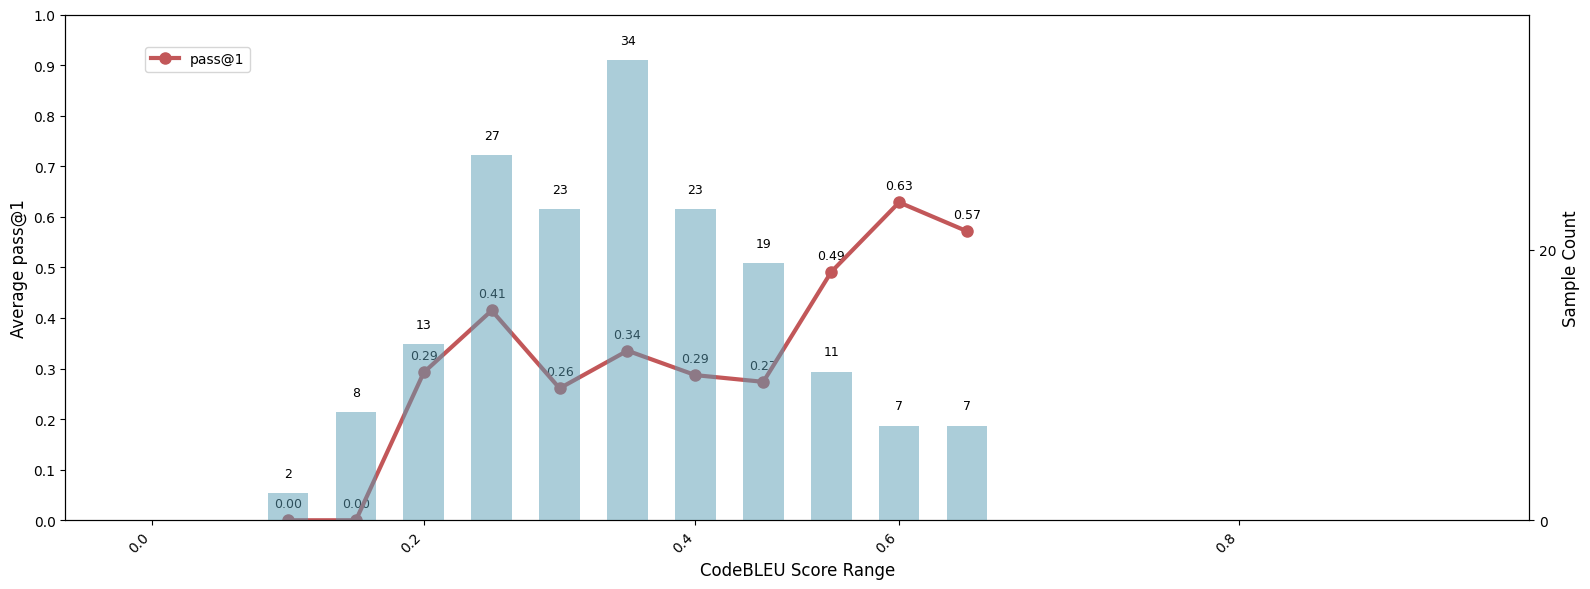

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

order = [1,2,3]

# 1. 准备数据
length_ranges = [f'{i:.2f}-{i+0.05:.2f}' for i in np.arange(0, 1, 0.05)]
bin_edges = np.arange(0, 1.05, 0.05)

df = pd.read_csv('result/autoware/result.csv')
df['length_range'] = pd.cut(df['code_bleu'], bins=bin_edges, labels=length_ranges, right=False, include_lowest=True)

result = df.groupby('length_range', observed=False).agg({
    'pass@1': 'mean',
    'code_bleu': 'count'
}).reindex(length_ranges)

x_values = result.index.values
y_pass = result['pass@1'].values
y_count = result['code_bleu'].values

# 2. 创建图形
fig, ax1 = plt.subplots(figsize=(16, 6))

# 关键技巧1：强制设置轴在图形上方
ax1.set_axisbelow(False)

# 3. 先绘制柱状图（底层）
ax2 = ax1.twinx()
bars = ax2.bar(x_values, y_count, 
              color='#599CB4', 
              alpha=0.5,  # 增加透明度
              width=0.6,
              label='Sample Count',
              zorder=1)  # 低zorder

# 4. 再绘制折线图（顶层）
line = ax1.plot(x_values, y_pass,
               color='#C25759', 
               marker='o', 
               linestyle='-', 
               linewidth=3,  # 加粗线条
               markersize=8,
               label='pass@1',
               zorder=4)  # 高zorder

# 5. 设置轴属性
ax1.set_xlabel('CodeBLEU Score Range', fontsize=12)
ax1.set_ylabel('Average pass@1', color='black', fontsize=12)
ax1.set_ylim(0, 1.0)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
ax1.tick_params(axis='y', labelcolor='black')

ax2.set_ylabel('Sample Count', color='black', fontsize=12)
max_count = y_count.max()
ax2.set_ylim(0, max_count * 1.1)
ax2.set_yticks(np.arange(0, max_count * 1.1, 20))
ax2.tick_params(axis='y', labelcolor='black')


# 7. 添加标签（确保在正确层级）
# 折线图标签
for x, y in zip(x_values, y_pass):
    ax1.text(x, y + 0.02, f'{y:.2f}',
            ha='center', va='bottom',
            color='black',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
            zorder=1)

# 柱状图标签
for x, y in zip(x_values, y_count):
    if y > 0:
        ax2.text(x, y + 1, f'{int(y)}',
                ha='center', va='bottom',
                color='black',
                fontsize=9,
                zorder=1)

# 8. 设置x轴刻度
target_values = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
tick_positions = []
tick_labels = []

for val in target_values:
    for i, r in enumerate(length_ranges):
        lower = float(r.split('-')[0])
        upper = lower + 0.05
        if lower <= val < upper or (val == 1.0 and upper > 1.0):
            tick_positions.append(r)
            tick_labels.append(f'{val:.1f}')
            break

ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, rotation=45, ha='right')

# 9. 图例
lines = line + [bars[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 0.95))

plt.tight_layout()
plt.show()

for i in range(len(xobs)):
    plt.fill(xobs[i] + robs[i] * np.cos(theta), yobs[i] + robs[i] * np.sin(theta), edgecolor="k", linewidth=1.0,
             zorder=order[i])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


['0.00-0.05' '0.05-0.10' '0.10-0.15' '0.15-0.20' '0.20-0.25' '0.25-0.30'
 '0.30-0.35' '0.35-0.40' '0.40-0.45' '0.45-0.50' '0.50-0.55' '0.55-0.60'
 '0.60-0.65' '0.65-0.70' '0.70-0.75' '0.75-0.80' '0.80-0.85' '0.85-0.90'
 '0.90-0.95' '0.95-1.00']


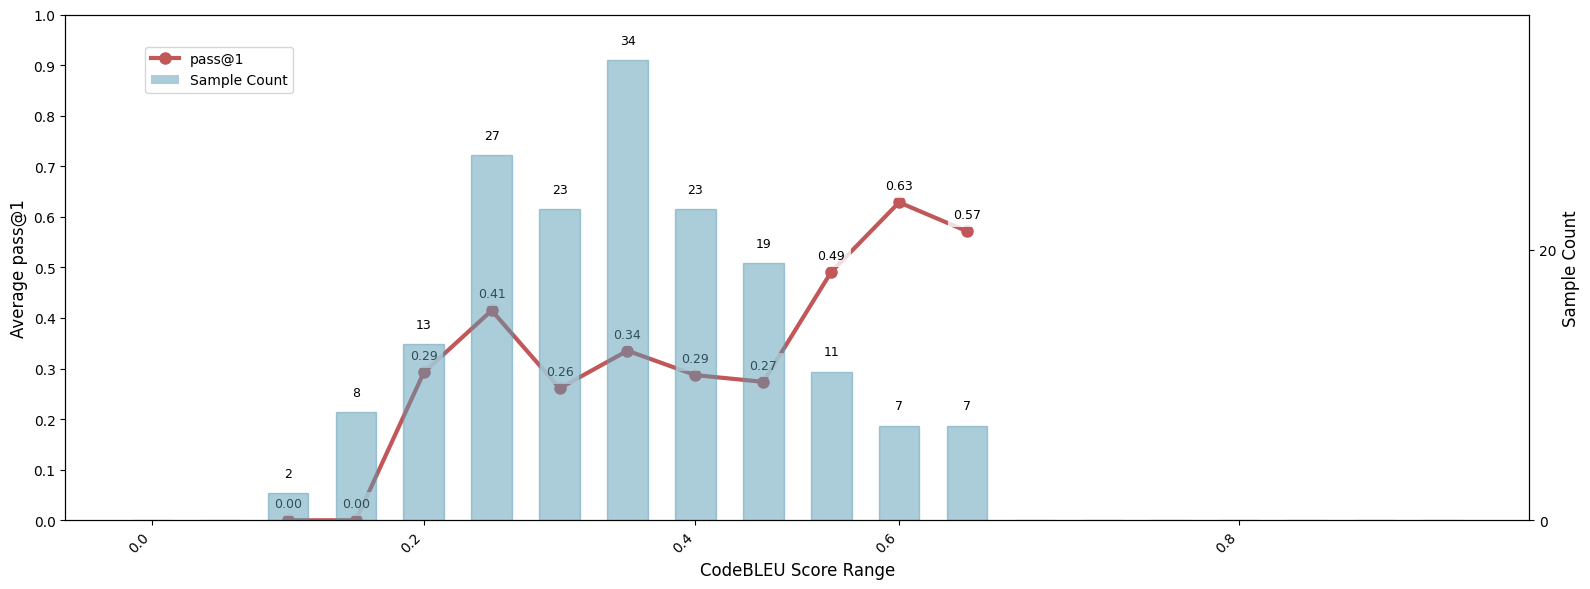

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 准备数据
length_ranges = [f'{i:.2f}-{i+0.05:.2f}' for i in np.arange(0, 1, 0.05)]
bin_edges = np.arange(0, 1.05, 0.05)

df = pd.read_csv('result/autoware/result.csv')
df['length_range'] = pd.cut(df['code_bleu'], bins=bin_edges, labels=length_ranges, right=False, include_lowest=True)

result = df.groupby('length_range', observed=False).agg({
    'pass@1': 'mean',
    'code_bleu': 'count'
}).reindex(length_ranges)

x_values = result.index.values
y_pass = result['pass@1'].values
y_count = result['code_bleu'].values

print(x_values)

# 2. 创建图形
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.set_axisbelow(False)  # 关键设置

# 3. 定义图层顺序
zorder_bars = 1   # 柱状图层级
zorder_line = 3    # 折线图层级
zorder_text = 4    # 文字层级
zorder_legend = 5  # 图例层级

# 4. 使用plt.fill绘制柱状图（底层）
ax2 = ax1.twinx()
bar_width = 0.6
for i, (x, y) in enumerate(zip(x_values, y_count)):
    # 创建柱状图的矩形路径
    rect_x = [i - bar_width/2, i - bar_width/2, i + bar_width/2, i + bar_width/2]
    rect_y = [0, y, y, 0]
    ax2.fill(rect_x, rect_y, 
             color='#599CB4', 
             alpha=0.5,
             label='Sample Count' if i == 0 else '',
             zorder=zorder_bars)

# 5. 绘制折线图（顶层）
line = ax1.plot(range(len(x_values)), y_pass,
               color='#C25759', 
               marker='o', 
               linestyle='-', 
               linewidth=3,
               markersize=8,
               label='pass@1',
               zorder=zorder_line)

# 6. 设置轴属性
ax1.set_xlabel('CodeBLEU Score Range', fontsize=12)
ax1.set_ylabel('Average pass@1', color='black', fontsize=12)
ax1.set_ylim(0, 1.0)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
ax1.tick_params(axis='y', labelcolor='black')

ax2.set_ylabel('Sample Count', color='black', fontsize=12)
max_count = y_count.max()
ax2.set_ylim(0, max_count * 1.1)
ax2.set_yticks(np.arange(0, max_count * 1.1, 20))
ax2.tick_params(axis='y', labelcolor='black')

# 7. 添加标签
for i, (x, y) in enumerate(zip(x_values, y_pass)):
    ax1.text(i, y + 0.02, f'{y:.2f}',
            ha='center', va='bottom',
            color='black',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
            zorder=zorder_text)

for i, (x, y) in enumerate(zip(x_values, y_count)):
    if y > 0:
        ax2.text(i, y + 1, f'{int(y)}',
                ha='center', va='bottom',
                color='black',
                fontsize=9,
                zorder=zorder_text-1)

# 8. 设置x轴刻度
target_values = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
tick_positions = []
tick_labels = []

for val in target_values:
    for i, r in enumerate(length_ranges):
        lower = float(r.split('-')[0])
        upper = lower + 0.05
        if lower <= val < upper or (val == 1.0 and upper > 1.0):
            tick_positions.append(i)
            tick_labels.append(f'{val:.1f}')
            break

ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, rotation=45, ha='right')

# 9. 图例 - 修正后的方法
bars_patch = plt.Rectangle((0,0), 1, 1, fc='#599CB4', alpha=0.5)  # 创建柱状图的图例项
lines = line + [bars_patch]
labels = [l.get_label() for l in line] + ['Sample Count']
legend = ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 0.95))

# 设置图例zorder的替代方法
for text in legend.get_texts():
    text.set_zorder(zorder_legend)
for patch in legend.get_patches():
    patch.set_zorder(zorder_legend)
for line in legend.get_lines():
    line.set_zorder(zorder_legend)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 准备数据
length_ranges = [f'{i:.2f}-{i+0.05:.2f}' for i in np.arange(0, 1, 0.05)]
bin_edges = np.arange(0, 1.05, 0.05)

df = pd.read_csv('result/autoware/result.csv')

df_deepseek_basic = df[(df['type']=='basic') & (df['model']=='deepseek')]

df_deepseek_basic['code_bleu_range'] = pd.cut(df_deepseek_basic['code_bleu'], bins=bin_edges, labels=length_ranges, right=False, include_lowest=True)

# 先计算平均值
mean_result = df_deepseek_basic.groupby('code_bleu_range', observed=False)['pass@1'].mean().reindex(length_ranges)
# 再计算计数
count_result = df_deepseek_basic.groupby('code_bleu_range', observed=False)['pass@1'].count().reindex(length_ranges)

# 合并结果
deepseek_basic_result = pd.DataFrame({
    'pass@1_mean': mean_result,
    'total_count': count_result
})

print(deepseek_basic_result)
# x_values = deepseek_basic_result.index.values
# y_pass = deepseek_basic_result['pass@1'].values
# y_count = deepseek_basic_result['code_bleu'].values


                 pass@1_mean  total_count
code_bleu_range                          
0.00-0.05                NaN            0
0.05-0.10                NaN            0
0.10-0.15                NaN            0
0.15-0.20           0.000000            2
0.20-0.25                NaN            0
0.25-0.30           0.600000            3
0.30-0.35           0.166667            6
0.35-0.40           0.466667            6
0.40-0.45           0.240000            5
0.45-0.50           0.200000            5
0.50-0.55           0.466667            3
0.55-0.60                NaN            0
0.60-0.65                NaN            0
0.65-0.70                NaN            0
0.70-0.75                NaN            0
0.75-0.80                NaN            0
0.80-0.85                NaN            0
0.85-0.90                NaN            0
0.90-0.95                NaN            0
0.95-1.00                NaN            0


/tmp/ipykernel_484262/2450711282.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deepseek_basic['code_bleu_range'] = pd.cut(df_deepseek_basic['code_bleu'], bins=bin_edges, labels=length_ranges, right=False, include_lowest=True)


/tmp/ipykernel_3914462/2847624871.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['code_bleu'], bins=bin_edges,
/tmp/ipykernel_3914462/2847624871.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['code_bleu'], bins=bin_edges,
/tmp/ipykernel_3914462/2847624871.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

                pass@1  code_bleu
length_range                     
0.00-0.05          NaN          0
0.05-0.10          NaN          0
0.10-0.15          NaN          0
0.15-0.20     0.000000          2
0.20-0.25     0.000000          4
0.25-0.30     0.222222          9
0.30-0.35     0.083333         12
0.35-0.40     0.144444         18
0.40-0.45     0.177778         18
0.45-0.50     0.095652         23
0.50-0.55     0.166667          6
0.55-0.60     0.476923         13
0.60-0.65     0.350000          4
0.65-0.70     0.571429          7
0.70-0.75     0.000000          1
0.75-0.80     0.500000          2
0.80-0.85          NaN          0
0.85-0.90     1.000000          1
0.90-0.95          NaN          0
0.95-1.00          NaN          0
                pass@1  code_bleu
length_range                     
0.00-0.05          NaN          0
0.05-0.10          NaN          0
0.10-0.15     0.000000          1
0.15-0.20     0.333333          6
0.20-0.25     0.028571          7
0.25-0.30     

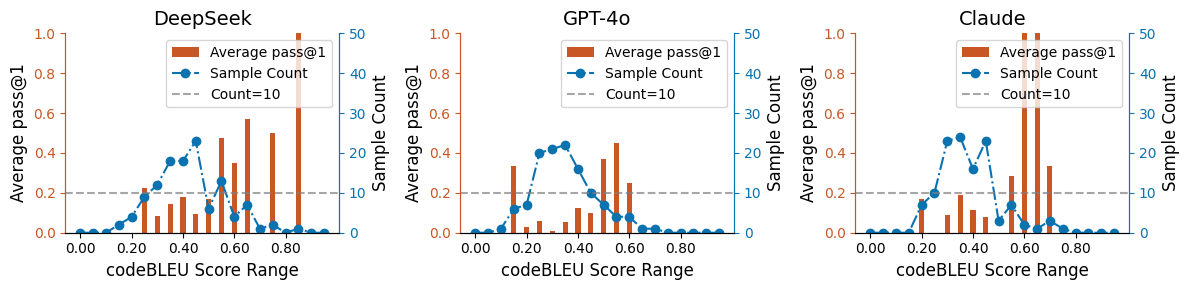

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]

# 准备数据
length_ranges = [f'{i:.2f}-{i+0.05:.2f}' for i in np.arange(0, 1, 0.05)]
bin_edges = np.arange(0, 1.05, 0.05)

df = pd.read_csv('result/autoware/result.csv')

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# 定义模型列表和对应的子图标题
models = ['deepseek', 'gpt-4o', 'llama']
titles = ['DeepSeek', 'GPT-4o', 'Claude']

# 为每个子图创建图表
for i, (model, title) in enumerate(zip(models, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # 根据不同的模型筛选数据
    df_model_basic = df[(df['category']=='ros_architecture') & (df['model']==model)]
    
    df_model_basic['length_range'] = pd.cut(df_model_basic['code_bleu'], bins=bin_edges, 
                                           labels=length_ranges, right=False, include_lowest=True)
    
    result = df_model_basic.groupby('length_range', observed=False).agg({
        'pass@1': 'mean',
        'code_bleu': 'count'
    }).reindex(length_ranges)

    print(result)
    
    x_values = result.index.values
    y_pass = result['pass@1'].fillna(0).values  # 填充NaN值为0
    y_count = result['code_bleu'].fillna(0).values  # 填充NaN值为0
    
    # 绘制图形
    bar = ax1.bar(x_values, y_pass, label='Average pass@1', color='#C85725', width=0.4)
    line, = ax2.plot(x_values, y_count, label='Sample Count', color='#0972AF', marker='o', ls='-.')
    ax2.axhline(y=10, color='grey', linestyle='--', alpha=0.7, label='Count=10')
    
    # 设置x轴和y轴的标签
    ax1.set_xlabel('codeBLEU Score Range', fontdict={'size': 12})
    ax1.set_ylabel('Average pass@1', fontdict={'size': 12})
    ax2.set_ylabel('Sample Count', fontdict={'size': 12})
    
    # 自定义y轴刻度
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax2.set_ylim(0, 50)
    ax2.set_yticks(np.arange(0, 51, 10))
    
    # 自定义x轴刻度 - 只显示0, 0.2, 0.4, 0.6, 0.8, 1.0
    major_ticks = [i for i, val in enumerate(length_ranges) if float(val.split('-')[0]) in [0, 0.2, 0.4, 0.6, 0.8, 1.0]]
    major_labels = [val.split('-')[0] for val in length_ranges if float(val.split('-')[0]) in [0, 0.2, 0.4, 0.6, 0.8, 1.0]]
    
    ax1.set_xticks(major_ticks)
    ax1.set_xticklabels(major_labels)
    
    # 添加图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    # 设置轴标签颜色
    ax1.tick_params('y', colors='#C85725')
    ax2.tick_params('y', colors='#0972AF')
    
    # 设置轴颜色
    ax1.spines['left'].set_color('#C85725')
    ax2.spines['left'].set_color('#C85725')
    ax1.spines['right'].set_color('#0972AF')
    ax2.spines['right'].set_color('#0972AF')
    
    # 去掉上轴线
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 为每个子图添加标题
    ax1.set_title(f'{title}', fontsize=14)

# 调整子图之间的间距
plt.tight_layout()

# 展示图片
plt.show()

/tmp/ipykernel_3914462/3022210472.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['code_bleu'], bins=bin_edges,
/tmp/ipykernel_3914462/3022210472.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['code_bleu'], bins=bin_edges,
/tmp/ipykernel_3914462/3022210472.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

                pass@1  code_bleu
length_range                     
0.00-0.05          NaN          0
0.05-0.10          NaN          0
0.10-0.15          NaN          0
0.15-0.20     0.066667          3
0.20-0.25     0.000000          2
0.25-0.30     0.028571          7
0.30-0.35     0.181818         11
0.35-0.40     0.121739         23
0.40-0.45     0.240000         15
0.45-0.50     0.166667         18
0.50-0.55     0.025000         16
0.55-0.60     0.222222          9
0.60-0.65     0.520000          5
0.65-0.70     0.333333          3
0.70-0.75     0.666667          3
0.75-0.80     0.733333          3
0.80-0.85     0.800000          1
0.85-0.90          NaN          0
0.90-0.95          NaN          0
0.95-1.00          NaN          0
                pass@1  code_bleu
length_range                     
0.00-0.05          NaN          0
0.05-0.10          NaN          0
0.10-0.15          NaN          0
0.15-0.20     0.000000          2
0.20-0.25     0.600000          6
0.25-0.30     

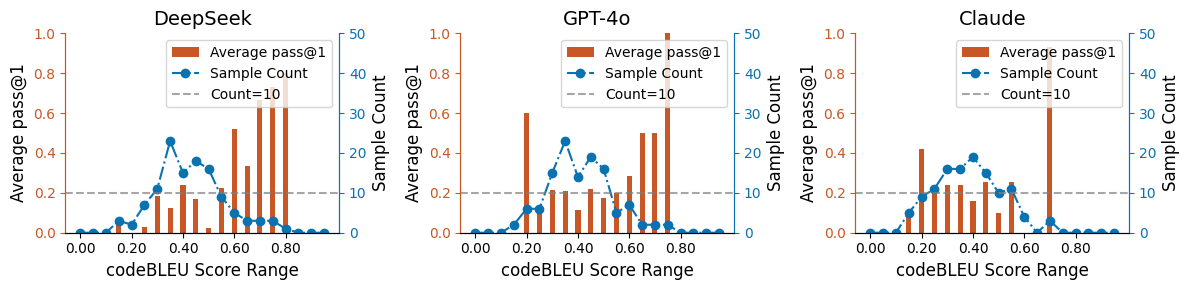

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]

# 准备数据
length_ranges = [f'{i:.2f}-{i+0.05:.2f}' for i in np.arange(0, 1, 0.05)]
bin_edges = np.arange(0, 1.05, 0.05)

df = pd.read_csv('result/autoware/result.csv')

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# 定义模型列表和对应的子图标题
models = ['deepseek', 'gpt-4o', 'llama']
titles = ['DeepSeek', 'GPT-4o', 'Claude']

# 为每个子图创建图表
for i, (model, title) in enumerate(zip(models, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # 根据不同的模型筛选数据
    df_model_basic = df[(df['category']=='utilities') & (df['model']==model)]
    
    df_model_basic['length_range'] = pd.cut(df_model_basic['code_bleu'], bins=bin_edges, 
                                           labels=length_ranges, right=False, include_lowest=True)
    
    result = df_model_basic.groupby('length_range', observed=False).agg({
        'pass@1': 'mean',
        'code_bleu': 'count'
    }).reindex(length_ranges)

    print(result)
    
    x_values = result.index.values
    y_pass = result['pass@1'].fillna(0).values  # 填充NaN值为0
    y_count = result['code_bleu'].fillna(0).values  # 填充NaN值为0
    
    # 绘制图形
    bar = ax1.bar(x_values, y_pass, label='Average pass@1', color='#C85725', width=0.4)
    line, = ax2.plot(x_values, y_count, label='Sample Count', color='#0972AF', marker='o', ls='-.')
    ax2.axhline(y=10, color='grey', linestyle='--', alpha=0.7, label='Count=10')
    
    # 设置x轴和y轴的标签
    ax1.set_xlabel('codeBLEU Score Range', fontdict={'size': 12})
    ax1.set_ylabel('Average pass@1', fontdict={'size': 12})
    ax2.set_ylabel('Sample Count', fontdict={'size': 12})
    
    # 自定义y轴刻度
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax2.set_ylim(0, 50)
    ax2.set_yticks(np.arange(0, 51, 10))
    
    # 自定义x轴刻度 - 只显示0, 0.2, 0.4, 0.6, 0.8, 1.0
    major_ticks = [i for i, val in enumerate(length_ranges) if float(val.split('-')[0]) in [0, 0.2, 0.4, 0.6, 0.8, 1.0]]
    major_labels = [val.split('-')[0] for val in length_ranges if float(val.split('-')[0]) in [0, 0.2, 0.4, 0.6, 0.8, 1.0]]
    
    ax1.set_xticks(major_ticks)
    ax1.set_xticklabels(major_labels)
    
    # 添加图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    # 设置轴标签颜色
    ax1.tick_params('y', colors='#C85725')
    ax2.tick_params('y', colors='#0972AF')
    
    # 设置轴颜色
    ax1.spines['left'].set_color('#C85725')
    ax2.spines['left'].set_color('#C85725')
    ax1.spines['right'].set_color('#0972AF')
    ax2.spines['right'].set_color('#0972AF')
    
    # 去掉上轴线
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 为每个子图添加标题
    ax1.set_title(f'{title}', fontsize=14)

# 调整子图之间的间距
plt.tight_layout()
# 展示图片
plt.show()

/tmp/ipykernel_7940/820584355.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['sloc'], bins=bin_edges,
/tmp/ipykernel_7940/820584355.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['sloc'], bins=bin_edges,
/tmp/ipykernel_7940/820584355.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



DeepSeek results:
                pass@1  sloc
length_range                
0-10          0.329412    17
10-20         0.357778    90
20-30         0.130952    84
30-40         0.017647    34
40-50         0.000000     6
50-60         0.000000     5
60-70         0.000000     3
70-80         0.000000     1
80-90              NaN     0
90-100             NaN     0
100-110            NaN     0
110-120            NaN     0
count       240
unique        8
top       10-20
freq         90
Name: length_range, dtype: object

GPT-4o results:
                pass@1  sloc
length_range                
0-10          0.120000    10
10-20         0.269388    98
20-30         0.177143    70
30-40         0.045714    35
40-50         0.033333    18
50-60         0.000000     6
60-70         0.000000     1
70-80         0.000000     1
80-90         0.000000     1
90-100             NaN     0
100-110            NaN     0
110-120            NaN     0
count       240
unique        9
top       10-20
freq   

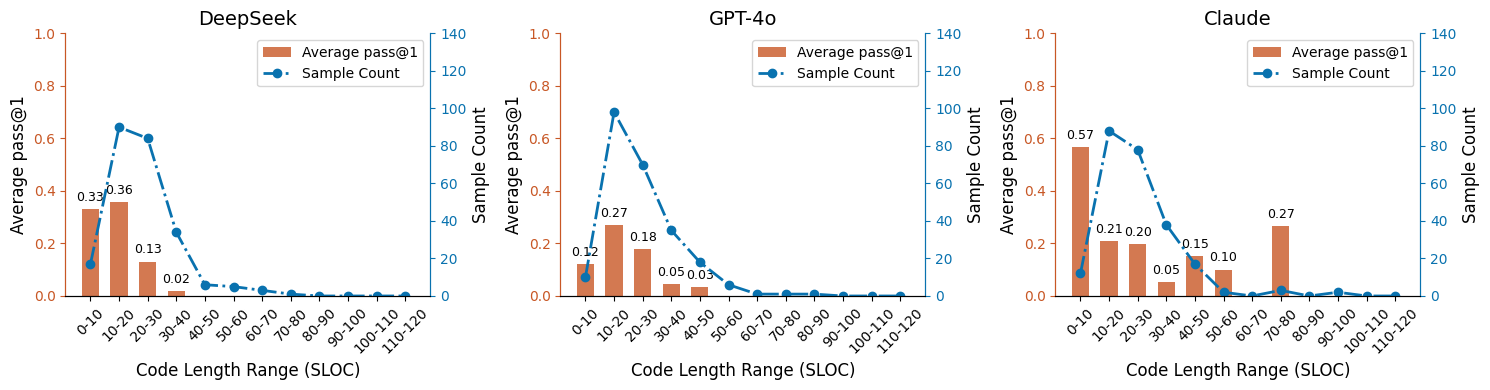

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]

# 准备数据 - 修正为长度范围 (0-60)
length_ranges = [f'{i}-{i+10}' for i in range(0, 120, 10)]
bin_edges = np.arange(0, 121, 10)  # 0, 10, 20, ..., 60

df = pd.read_csv('result/autoware/result_backup.csv')

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 定义模型列表和对应的子图标题
models = ['deepseek', 'gpt-4o', 'llama']
titles = ['DeepSeek', 'GPT-4o', 'Claude']

# 为每个子图创建图表
for i, (model, title) in enumerate(zip(models, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # 根据不同的模型筛选数据
    # df_model_basic = df[(df['category']=='ros_architecture') & (df['model']==model)]
    df_model_basic = df[(df['model']==model)]

    # 使用 sloc_ground_truth 进行分箱 (0-60范围)
    df_model_basic['length_range'] = pd.cut(df_model_basic['sloc'], bins=bin_edges, 
                                           labels=length_ranges, right=False)
    
    result = df_model_basic.groupby('length_range', observed=False).agg({
        'pass@1': 'mean',
        'sloc': 'count'
    }).reindex(length_ranges)

    print(f"{title} results:")
    print(result)
    print(df_model_basic['length_range'].describe())
    print()
    
    x_values = range(len(length_ranges))  # 使用索引作为x值
    y_pass = result['pass@1'].fillna(0).values  # 填充NaN值为0
    y_count = result['sloc'].fillna(0).values  # 填充NaN值为0
    
    # 绘制图形
    bar = ax1.bar(x_values, y_pass, label='Average pass@1', color='#C85725', width=0.6, alpha=0.8)
    line, = ax2.plot(x_values, y_count, label='Sample Count', color='#0972AF', marker='o', ls='-.', linewidth=2, markersize=6)
    # ax2.axhline(y=10, color='grey', linestyle='--', alpha=0.7, label='Count=10')
    
    # 设置x轴和y轴的标签 - 修正x轴标签
    ax1.set_xlabel('Code Length Range (SLOC)', fontdict={'size': 12})
    ax1.set_ylabel('Average pass@1', fontdict={'size': 12})
    ax2.set_ylabel('Sample Count', fontdict={'size': 12})
    
    # 自定义y轴刻度
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax2.set_ylim(0, 140)
    ax2.set_yticks(np.arange(0, 141, 20))
    
    # 设置x轴刻度 - 使用长度范围标签
    ax1.set_xticks(range(len(length_ranges)))
    ax1.set_xticklabels(length_ranges, rotation=45)
    
    # 添加图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    # 设置轴标签颜色
    ax1.tick_params('y', colors='#C85725')
    ax2.tick_params('y', colors='#0972AF')
    
    # 设置轴颜色
    ax1.spines['left'].set_color('#C85725')
    ax2.spines['left'].set_color('#C85725')
    ax1.spines['right'].set_color('#0972AF')
    ax2.spines['right'].set_color('#0972AF')
    
    # 去掉上轴线
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 为每个子图添加标题
    ax1.set_title(f'{title}', fontsize=14)
    
    # 在柱状图上添加数值标签
    for j, v in enumerate(y_pass):
        if v > 0:  # 只在有值的地方显示标签
            ax1.text(j, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

# 调整子图之间的间距
plt.tight_layout()

plt.savefig('length.pdf', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_3914462/3730606916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['sloc_ground_truth'], bins=bin_edges,
/tmp/ipykernel_3914462/3730606916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['sloc_ground_truth'], bins=bin_edges,
/tmp/ipykernel_3914462/3730606916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

DeepSeek results:
                pass@1  sloc_ground_truth
length_range                             
0-10          0.240000                  5
10-20         0.287500                 64
20-30         0.127273                 33
30-40         0.000000                 13
40-50         0.000000                  3
50-60         0.000000                  2
60-70              NaN                  0
70-80              NaN                  0
80-90              NaN                  0
90-100             NaN                  0
100-110            NaN                  0
110-120            NaN                  0

GPT-4o results:
                pass@1  sloc_ground_truth
length_range                             
0-10          0.280000                  5
10-20         0.346875                 64
20-30         0.163636                 33
30-40         0.000000                 13
40-50         0.000000                  3
50-60         0.000000                  2
60-70              NaN                  0

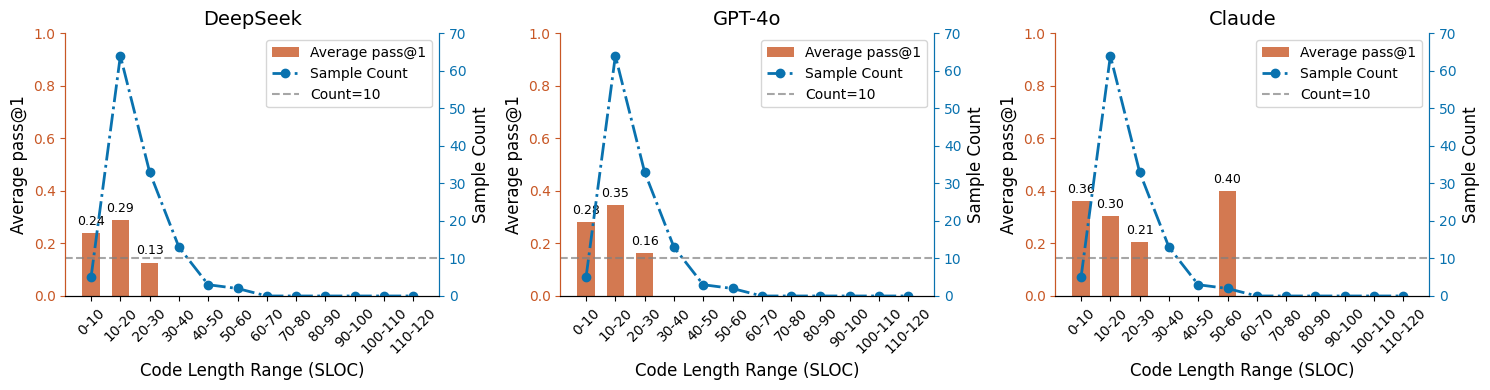

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]

# 准备数据 - 修正为长度范围 (0-60)
length_ranges = [f'{i}-{i+10}' for i in range(0, 120, 10)]
bin_edges = np.arange(0, 121, 10)  # 0, 10, 20, ..., 60

df = pd.read_csv('result/autoware/result.csv')

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 定义模型列表和对应的子图标题
models = ['deepseek', 'gpt-4o', 'llama']
titles = ['DeepSeek', 'GPT-4o', 'Claude']

# 为每个子图创建图表
for i, (model, title) in enumerate(zip(models, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # 根据不同的模型筛选数据
    df_model_basic = df[(df['category']=='utilities') & (df['model']==model)]
    
    # 使用 sloc_ground_truth 进行分箱 (0-60范围)
    df_model_basic['length_range'] = pd.cut(df_model_basic['sloc_ground_truth'], bins=bin_edges, 
                                           labels=length_ranges, right=False)
    
    result = df_model_basic.groupby('length_range', observed=False).agg({
        'pass@1': 'mean',
        'sloc_ground_truth': 'count'
    }).reindex(length_ranges)

    print(f"{title} results:")
    print(result)
    print()
    
    x_values = range(len(length_ranges))  # 使用索引作为x值
    y_pass = result['pass@1'].fillna(0).values  # 填充NaN值为0
    y_count = result['sloc_ground_truth'].fillna(0).values  # 填充NaN值为0
    
    # 绘制图形
    bar = ax1.bar(x_values, y_pass, label='Average pass@1', color='#C85725', width=0.6, alpha=0.8)
    line, = ax2.plot(x_values, y_count, label='Sample Count', color='#0972AF', marker='o', ls='-.', linewidth=2, markersize=6)
    ax2.axhline(y=10, color='grey', linestyle='--', alpha=0.7, label='Count=10')
    
    # 设置x轴和y轴的标签 - 修正x轴标签
    ax1.set_xlabel('Code Length Range (SLOC)', fontdict={'size': 12})
    ax1.set_ylabel('Average pass@1', fontdict={'size': 12})
    ax2.set_ylabel('Sample Count', fontdict={'size': 12})
    
    # 自定义y轴刻度
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax2.set_ylim(0, 70)
    ax2.set_yticks(np.arange(0, 71, 10))
    
    # 设置x轴刻度 - 使用长度范围标签
    ax1.set_xticks(range(len(length_ranges)))
    ax1.set_xticklabels(length_ranges, rotation=45)
    
    # 添加图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    # 设置轴标签颜色
    ax1.tick_params('y', colors='#C85725')
    ax2.tick_params('y', colors='#0972AF')
    
    # 设置轴颜色
    ax1.spines['left'].set_color('#C85725')
    ax2.spines['left'].set_color('#C85725')
    ax1.spines['right'].set_color('#0972AF')
    ax2.spines['right'].set_color('#0972AF')
    
    # 去掉上轴线
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 为每个子图添加标题
    ax1.set_title(f'{title}', fontsize=14)
    
    # 在柱状图上添加数值标签
    for j, v in enumerate(y_pass):
        if v > 0:  # 只在有值的地方显示标签
            ax1.text(j, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

# 调整子图之间的间距
plt.tight_layout()

# 展示图片
plt.show()

/tmp/ipykernel_3914462/1968724771.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['sloc_ground_truth'], bins=bin_edges,
/tmp/ipykernel_3914462/1968724771.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['sloc_ground_truth'], bins=bin_edges,
/tmp/ipykernel_3914462/1968724771.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

DeepSeek results:
                pass@1  sloc_ground_truth
length_range                             
0-10          0.400000                 10
10-20         0.409302                 43
20-30         0.109677                 31
30-40         0.036364                 11
40-50         0.025000                  8
50-60         0.000000                  7
60-70         0.000000                  1
70-80         0.000000                  4
80-90         0.000000                  1
90-100             NaN                  0
100-110       0.000000                  1
110-120       0.000000                  1

GPT-4o results:
                pass@1  sloc_ground_truth
length_range                             
0-10          0.160000                 10
10-20         0.237209                 43
20-30         0.045161                 31
30-40         0.000000                 11
40-50         0.000000                  8
50-60         0.000000                  7
60-70         0.000000                  1

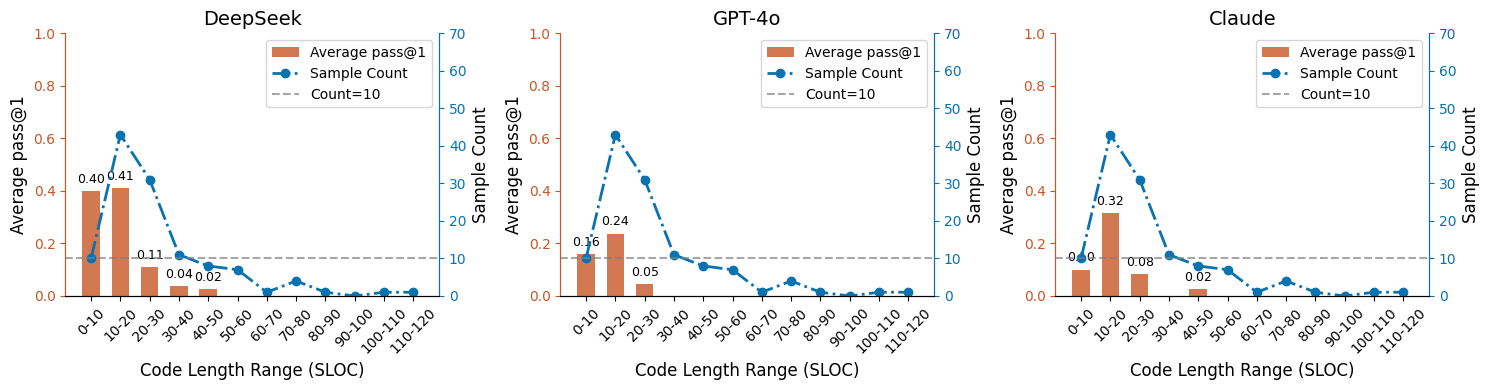

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]

# 准备数据 - 修正为长度范围 (0-60)
length_ranges = [f'{i}-{i+10}' for i in range(0, 120, 10)]
bin_edges = np.arange(0, 121, 10)  # 0, 10, 20, ..., 60

df = pd.read_csv('result/autoware/result.csv')

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 定义模型列表和对应的子图标题
models = ['deepseek', 'gpt-4o', 'llama']
titles = ['DeepSeek', 'GPT-4o', 'Claude']

# 为每个子图创建图表
for i, (model, title) in enumerate(zip(models, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # 根据不同的模型筛选数据
    df_model_basic = df[(df['category']=='ros_architecture') & (df['model']==model)]
    
    # 使用 sloc_ground_truth 进行分箱 (0-60范围)
    df_model_basic['length_range'] = pd.cut(df_model_basic['sloc_ground_truth'], bins=bin_edges, 
                                           labels=length_ranges, right=False)
    
    result = df_model_basic.groupby('length_range', observed=False).agg({
        'pass@1': 'mean',
        'sloc_ground_truth': 'count'
    }).reindex(length_ranges)

    print(f"{title} results:")
    print(result)
    print()
    
    x_values = range(len(length_ranges))  # 使用索引作为x值
    y_pass = result['pass@1'].fillna(0).values  # 填充NaN值为0
    y_count = result['sloc_ground_truth'].fillna(0).values  # 填充NaN值为0
    
    # 绘制图形
    bar = ax1.bar(x_values, y_pass, label='Average pass@1', color='#C85725', width=0.6, alpha=0.8)
    line, = ax2.plot(x_values, y_count, label='Sample Count', color='#0972AF', marker='o', ls='-.', linewidth=2, markersize=6)
    ax2.axhline(y=10, color='grey', linestyle='--', alpha=0.7, label='Count=10')
    
    # 设置x轴和y轴的标签 - 修正x轴标签
    ax1.set_xlabel('Code Length Range (SLOC)', fontdict={'size': 12})
    ax1.set_ylabel('Average pass@1', fontdict={'size': 12})
    ax2.set_ylabel('Sample Count', fontdict={'size': 12})
    
    # 自定义y轴刻度
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax2.set_ylim(0, 70)
    ax2.set_yticks(np.arange(0, 71, 10))
    
    # 设置x轴刻度 - 使用长度范围标签
    ax1.set_xticks(range(len(length_ranges)))
    ax1.set_xticklabels(length_ranges, rotation=45)
    
    # 添加图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    # 设置轴标签颜色
    ax1.tick_params('y', colors='#C85725')
    ax2.tick_params('y', colors='#0972AF')
    
    # 设置轴颜色
    ax1.spines['left'].set_color('#C85725')
    ax2.spines['left'].set_color('#C85725')
    ax1.spines['right'].set_color('#0972AF')
    ax2.spines['right'].set_color('#0972AF')
    
    # 去掉上轴线
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 为每个子图添加标题
    ax1.set_title(f'{title}', fontsize=14)
    
    # 在柱状图上添加数值标签
    for j, v in enumerate(y_pass):
        if v > 0:  # 只在有值的地方显示标签
            ax1.text(j, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

# 调整子图之间的间距
plt.tight_layout()

# 展示图片
plt.show()

/tmp/ipykernel_3914462/3555708745.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['cyclomatic_complexity_ground_truth'], bins=bin_edges,
/tmp/ipykernel_3914462/3555708745.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['cyclomatic_complexity_ground_truth'], bins=bin_edges,
/tmp/ipykernel_3914462/3555708745.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

DeepSeek results:
                pass@1  cyclomatic_complexity_ground_truth
length_range                                              
0-3           0.271795                                  39
3-6           0.189831                                  59
6-9           0.111111                                  18
9-12          0.000000                                   3
12-15              NaN                                   0

GPT-4o results:
                pass@1  cyclomatic_complexity_ground_truth
length_range                                              
0-3           0.353846                                  39
3-6           0.220339                                  59
6-9           0.122222                                  18
9-12          0.000000                                   3
12-15              NaN                                   0

Claude results:
                pass@1  cyclomatic_complexity_ground_truth
length_range                                              
0-3 

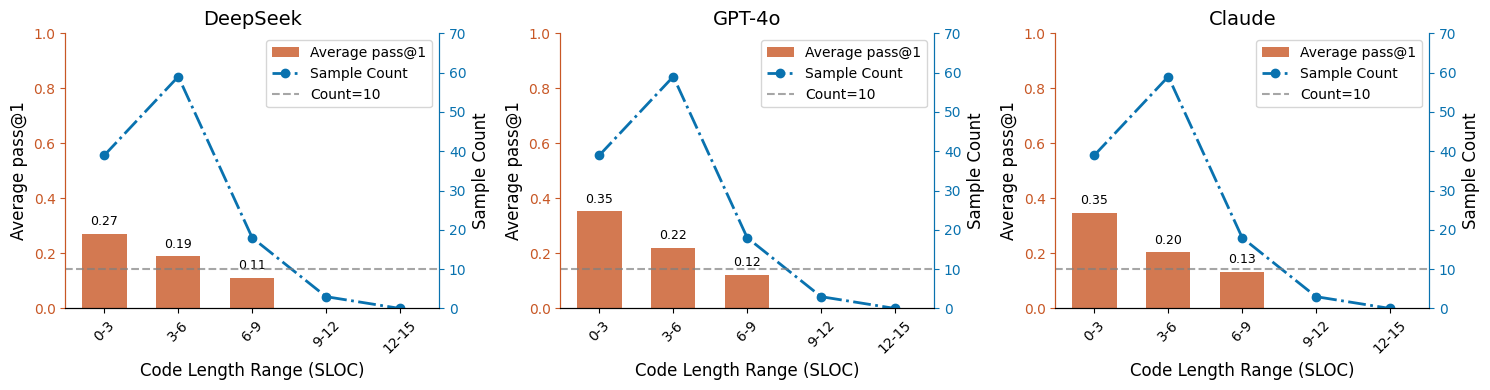

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]

# 准备数据 - 修正为长度范围 (0-60)
length_ranges = [f'{i}-{i+3}' for i in range(0, 15, 3)]
bin_edges = np.arange(0, 16, 3)  # 0, 10, 20, ..., 60

df = pd.read_csv('result/autoware/result.csv')

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 定义模型列表和对应的子图标题
models = ['deepseek', 'gpt-4o', 'llama']
titles = ['DeepSeek', 'GPT-4o', 'Claude']

# 为每个子图创建图表
for i, (model, title) in enumerate(zip(models, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # 根据不同的模型筛选数据
    df_model_basic = df[(df['category']=='utilities') & (df['model']==model)]
    
    # 使用 sloc_ground_truth 进行分箱 (0-60范围)
    df_model_basic['length_range'] = pd.cut(df_model_basic['cyclomatic_complexity_ground_truth'], bins=bin_edges, 
                                           labels=length_ranges, right=False)
    
    result = df_model_basic.groupby('length_range', observed=False).agg({
        'pass@1': 'mean',
        'cyclomatic_complexity_ground_truth': 'count'
    }).reindex(length_ranges)

    print(f"{title} results:")
    print(result)
    print()
    
    x_values = range(len(length_ranges))  # 使用索引作为x值
    y_pass = result['pass@1'].fillna(0).values  # 填充NaN值为0
    y_count = result['cyclomatic_complexity_ground_truth'].fillna(0).values  # 填充NaN值为0
    
    # 绘制图形
    bar = ax1.bar(x_values, y_pass, label='Average pass@1', color='#C85725', width=0.6, alpha=0.8)
    line, = ax2.plot(x_values, y_count, label='Sample Count', color='#0972AF', marker='o', ls='-.', linewidth=2, markersize=6)
    ax2.axhline(y=10, color='grey', linestyle='--', alpha=0.7, label='Count=10')
    
    # 设置x轴和y轴的标签 - 修正x轴标签
    ax1.set_xlabel('Code Length Range (SLOC)', fontdict={'size': 12})
    ax1.set_ylabel('Average pass@1', fontdict={'size': 12})
    ax2.set_ylabel('Sample Count', fontdict={'size': 12})
    
    # 自定义y轴刻度
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax2.set_ylim(0, 70)
    ax2.set_yticks(np.arange(0, 71, 10))
    
    # 设置x轴刻度 - 使用长度范围标签
    ax1.set_xticks(range(len(length_ranges)))
    ax1.set_xticklabels(length_ranges, rotation=45)
    
    # 添加图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    # 设置轴标签颜色
    ax1.tick_params('y', colors='#C85725')
    ax2.tick_params('y', colors='#0972AF')
    
    # 设置轴颜色
    ax1.spines['left'].set_color('#C85725')
    ax2.spines['left'].set_color('#C85725')
    ax1.spines['right'].set_color('#0972AF')
    ax2.spines['right'].set_color('#0972AF')
    
    # 去掉上轴线
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 为每个子图添加标题
    ax1.set_title(f'{title}', fontsize=14)
    
    # 在柱状图上添加数值标签
    for j, v in enumerate(y_pass):
        if v > 0:  # 只在有值的地方显示标签
            ax1.text(j, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

# 调整子图之间的间距
plt.tight_layout()

# 展示图片
plt.show()

/tmp/ipykernel_3914462/2488313867.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['cyclomatic_complexity_ground_truth'], bins=bin_edges,
/tmp/ipykernel_3914462/2488313867.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['cyclomatic_complexity_ground_truth'], bins=bin_edges,
/tmp/ipykernel_3914462/2488313867.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

DeepSeek results:
              compile@1  cyclomatic_complexity_ground_truth
length_range                                               
0-3            0.390164                                  61
3-6            0.340000                                  40
6-9            0.120000                                  10
9-12           0.100000                                   8
12-15          0.000000                                   1

GPT-4o results:
              compile@1  cyclomatic_complexity_ground_truth
length_range                                               
0-3            0.222951                                  61
3-6            0.225000                                  40
6-9            0.120000                                  10
9-12           0.050000                                   8
12-15          0.000000                                   1

Claude results:
              compile@1  cyclomatic_complexity_ground_truth
length_range                                    

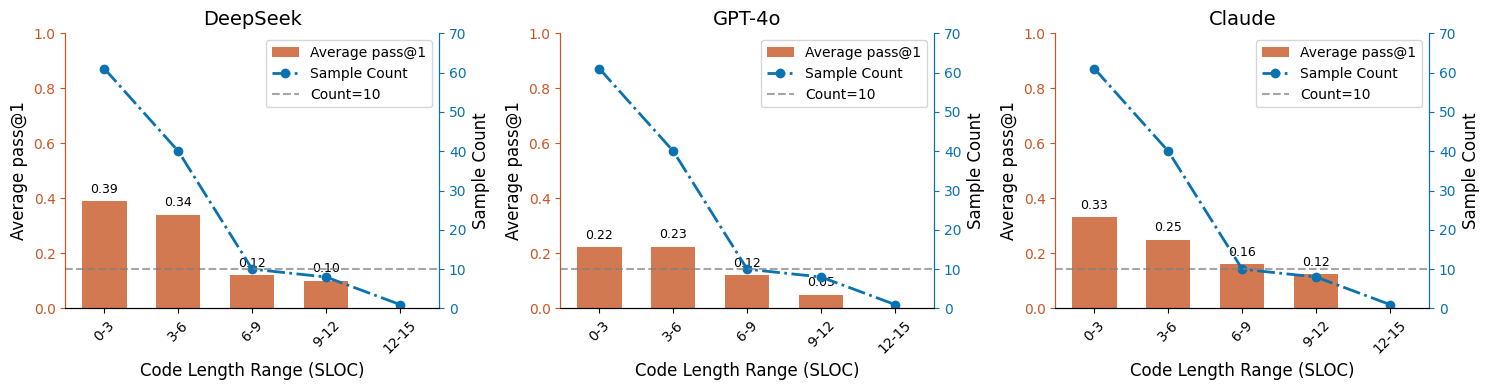

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]

# 准备数据 - 修正为长度范围 (0-60)
length_ranges = [f'{i}-{i+3}' for i in range(0, 15, 3)]
bin_edges = np.arange(0, 16, 3)  # 0, 10, 20, ..., 60

df = pd.read_csv('result/autoware/result.csv')

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 定义模型列表和对应的子图标题
models = ['deepseek', 'gpt-4o', 'llama']
titles = ['DeepSeek', 'GPT-4o', 'Claude']

# 为每个子图创建图表
for i, (model, title) in enumerate(zip(models, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # 根据不同的模型筛选数据
    df_model_basic = df[(df['category']=='ros_architecture') & (df['model']==model)]
    
    # 使用 sloc_ground_truth 进行分箱 (0-60范围)
    df_model_basic['length_range'] = pd.cut(df_model_basic['cyclomatic_complexity_ground_truth'], bins=bin_edges, 
                                           labels=length_ranges, right=False)
    
    result = df_model_basic.groupby('length_range', observed=False).agg({
        'compile@1': 'mean',
        'cyclomatic_complexity_ground_truth': 'count'
    }).reindex(length_ranges)

    print(f"{title} results:")
    print(result)
    print()
    
    x_values = range(len(length_ranges))  # 使用索引作为x值
    y_pass = result['compile@1'].fillna(0).values  # 填充NaN值为0
    y_count = result['cyclomatic_complexity_ground_truth'].fillna(0).values  # 填充NaN值为0
    
    # 绘制图形
    bar = ax1.bar(x_values, y_pass, label='Average pass@1', color='#C85725', width=0.6, alpha=0.8)
    line, = ax2.plot(x_values, y_count, label='Sample Count', color='#0972AF', marker='o', ls='-.', linewidth=2, markersize=6)
    ax2.axhline(y=10, color='grey', linestyle='--', alpha=0.7, label='Count=10')
    
    # 设置x轴和y轴的标签 - 修正x轴标签
    ax1.set_xlabel('Code Length Range (SLOC)', fontdict={'size': 12})
    ax1.set_ylabel('Average pass@1', fontdict={'size': 12})
    ax2.set_ylabel('Sample Count', fontdict={'size': 12})
    
    # 自定义y轴刻度
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax2.set_ylim(0, 70)
    ax2.set_yticks(np.arange(0, 71, 10))
    
    # 设置x轴刻度 - 使用长度范围标签
    ax1.set_xticks(range(len(length_ranges)))
    ax1.set_xticklabels(length_ranges, rotation=45)
    
    # 添加图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    # 设置轴标签颜色
    ax1.tick_params('y', colors='#C85725')
    ax2.tick_params('y', colors='#0972AF')
    
    # 设置轴颜色
    ax1.spines['left'].set_color('#C85725')
    ax2.spines['left'].set_color('#C85725')
    ax1.spines['right'].set_color('#0972AF')
    ax2.spines['right'].set_color('#0972AF')
    
    # 去掉上轴线
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 为每个子图添加标题
    ax1.set_title(f'{title}', fontsize=14)
    
    # 在柱状图上添加数值标签
    for j, v in enumerate(y_pass):
        if v > 0:  # 只在有值的地方显示标签
            ax1.text(j, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

# 调整子图之间的间距
plt.tight_layout()

# 展示图片
plt.show()

/tmp/ipykernel_3914462/1927950644.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['element_count'] = df_model_basic['element'].apply(
/tmp/ipykernel_3914462/1927950644.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['element_count'], bins=bin_edges,
/tmp/ipykernel_3914462/1927950644.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

DeepSeek results:
                pass@1  element
length_range                   
0-1                NaN        0
1-2           0.228866       97
2-3           0.076190       21
3-4           0.000000        2
4-5                NaN        0
5-6                NaN        0
6-7                NaN        0
Element count statistics for DeepSeek:
count    120.000000
mean       1.208333
std        0.447135
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: element_count, dtype: float64

GPT-4o results:
                pass@1  element
length_range                   
0-1                NaN        0
1-2           0.263918       97
2-3           0.161905       21
3-4           0.000000        2
4-5                NaN        0
5-6                NaN        0
6-7                NaN        0
Element count statistics for GPT-4o:
count    120.000000
mean       1.208333
std        0.447135
min        1.000000
25%        1.000000
50%        1.0000

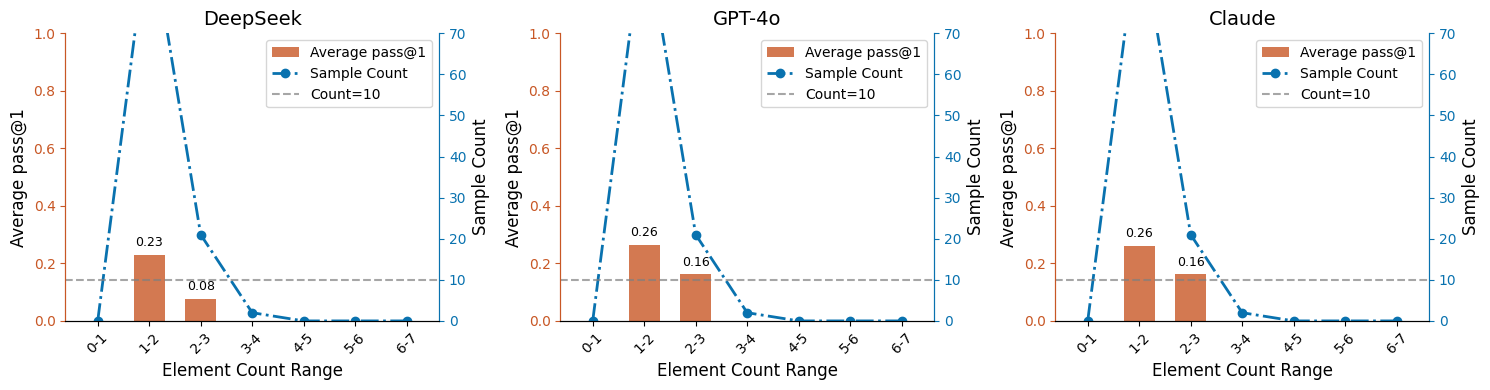

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]

# 准备数据 - 修正为长度范围 (0-60)
length_ranges = [f'{i}-{i+1}' for i in range(0, 7, 1)]
bin_edges = np.arange(0, 7.1, 1)  # 0, 10, 20, ..., 60

df = pd.read_csv('result/autoware/result.csv')

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 定义模型列表和对应的子图标题
models = ['deepseek', 'gpt-4o', 'llama']
titles = ['DeepSeek', 'GPT-4o', 'Claude']

# 为每个子图创建图表
for i, (model, title) in enumerate(zip(models, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # 根据不同的模型筛选数据
    df_model_basic = df[(df['category']=='utilities') & (df['model']==model)]
    
    # 修改：按照列表中的元素个数进行划分（以逗号分隔）
    # 将字符串转换为列表并计算元素个数
    df_model_basic['element_count'] = df_model_basic['element'].apply(
        lambda x: len(str(x).split(',')) if pd.notna(x) else 0
    )
    
    # 使用元素个数进行分箱
    df_model_basic['length_range'] = pd.cut(df_model_basic['element_count'], bins=bin_edges, 
                                           labels=length_ranges, right=False)
    
    result = df_model_basic.groupby('length_range', observed=False).agg({
        'pass@1': 'mean',
        'element': 'count'
    }).reindex(length_ranges)

    print(f"{title} results:")
    print(result)
    print(f"Element count statistics for {title}:")
    print(df_model_basic['element_count'].describe())
    print()
    
    x_values = range(len(length_ranges))  # 使用索引作为x值
    y_pass = result['pass@1'].fillna(0).values  # 填充NaN值为0
    y_count = result['element'].fillna(0).values  # 填充NaN值为0
    
    # 绘制图形
    bar = ax1.bar(x_values, y_pass, label='Average pass@1', color='#C85725', width=0.6, alpha=0.8)
    line, = ax2.plot(x_values, y_count, label='Sample Count', color='#0972AF', marker='o', ls='-.', linewidth=2, markersize=6)
    ax2.axhline(y=10, color='grey', linestyle='--', alpha=0.7, label='Count=10')
    
    # 设置x轴和y轴的标签 - 修正x轴标签
    ax1.set_xlabel('Element Count Range', fontdict={'size': 12})  # 修改x轴标签
    ax1.set_ylabel('Average pass@1', fontdict={'size': 12})
    ax2.set_ylabel('Sample Count', fontdict={'size': 12})
    
    # 自定义y轴刻度
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax2.set_ylim(0, 70)
    ax2.set_yticks(np.arange(0, 71, 10))
    
    # 设置x轴刻度 - 使用长度范围标签
    ax1.set_xticks(range(len(length_ranges)))
    ax1.set_xticklabels(length_ranges, rotation=45)
    
    # 添加图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    # 设置轴标签颜色
    ax1.tick_params('y', colors='#C85725')
    ax2.tick_params('y', colors='#0972AF')
    
    # 设置轴颜色
    ax1.spines['left'].set_color('#C85725')
    ax2.spines['left'].set_color('#C85725')
    ax1.spines['right'].set_color('#0972AF')
    ax2.spines['right'].set_color('#0972AF')
    
    # 去掉上轴线
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 为每个子图添加标题
    ax1.set_title(f'{title}', fontsize=14)
    
    # 在柱状图上添加数值标签
    for j, v in enumerate(y_pass):
        if v > 0:  # 只在有值的地方显示标签
            ax1.text(j, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

# 调整子图之间的间距
plt.tight_layout()

# 展示图片
plt.show()

/tmp/ipykernel_3914462/2583592475.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['element_count'] = df_model_basic['element'].apply(
/tmp/ipykernel_3914462/2583592475.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['element_count'], bins=bin_edges,
/tmp/ipykernel_3914462/2583592475.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

DeepSeek results:
                pass@1  element
length_range                   
0                  NaN        0
1             0.252830      106
2             0.127586       58
3             0.254237       59
4             0.015385       13
5             0.000000        2
6             0.000000        2
Element count statistics for DeepSeek:
count    240.000000
mean       1.970833
std        1.056551
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: element_count, dtype: float64

GPT-4o results:
                pass@1  element
length_range                   
0                  NaN        0
1             0.279245      106
2             0.120690       58
3             0.094915       59
4             0.000000       13
5             0.000000        2
6             0.000000        2
Element count statistics for GPT-4o:
count    240.000000
mean       1.970833
std        1.056551
min        1.000000
25%        1.000000
50%        2.0000

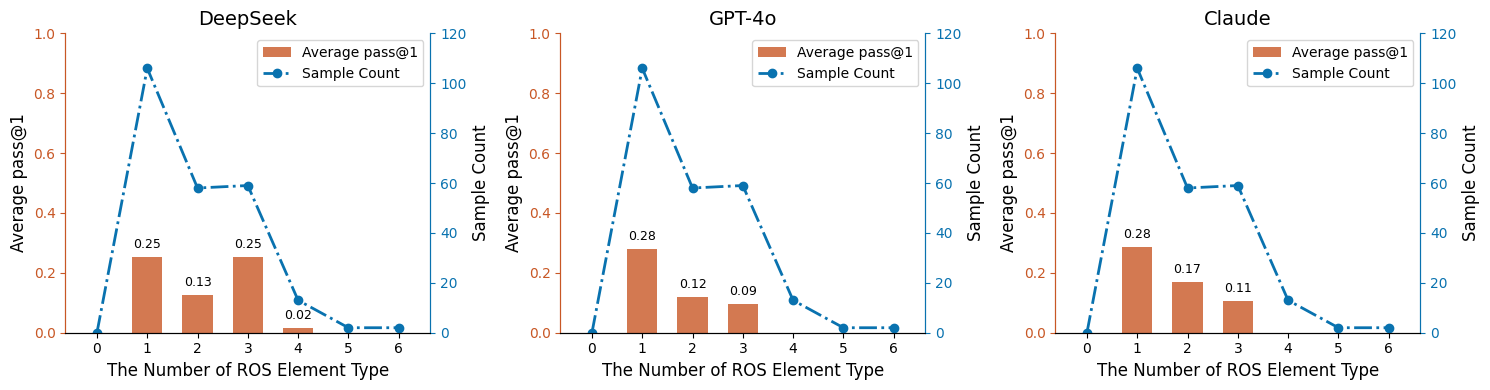

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]

# 准备数据 - 修改为0-7的范围
length_ranges = ['0', '1', '2', '3', '4', '5', '6']
bin_edges = np.arange(0, 8, 1)  # 0, 1, 2, ..., 8

df = pd.read_csv('result/autoware/result.csv')

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 定义模型列表和对应的子图标题
models = ['deepseek', 'gpt-4o', 'llama']
titles = ['DeepSeek', 'GPT-4o', 'Claude']

# 为每个子图创建图表
for i, (model, title) in enumerate(zip(models, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # 根据不同的模型筛选数据
    df_model_basic = df[(df['model']==model)]
    
    # 按照列表中的元素个数进行划分（以逗号分隔）
    # 将字符串转换为列表并计算元素个数
    df_model_basic['element_count'] = df_model_basic['element'].apply(
        lambda x: len(str(x).split(',')) if pd.notna(x) else 0
    )
    
    # 使用元素个数进行分箱
    df_model_basic['length_range'] = pd.cut(df_model_basic['element_count'], bins=bin_edges, 
                                           labels=length_ranges, right=False)
    
    result = df_model_basic.groupby('length_range', observed=False).agg({
        'pass@1': 'mean',
        'element': 'count'
    }).reindex(length_ranges)

    print(f"{title} results:")
    print(result)
    print(f"Element count statistics for {title}:")
    print(df_model_basic['element_count'].describe())
    print()
    
    x_values = range(len(length_ranges))  # 使用索引作为x值
    y_pass = result['pass@1'].fillna(0).values  # 填充NaN值为0
    y_count = result['element'].fillna(0).values  # 填充NaN值为0
    
    # 绘制图形
    bar = ax1.bar(x_values, y_pass, label='Average pass@1', color='#C85725', width=0.6, alpha=0.8)
    line, = ax2.plot(x_values, y_count, label='Sample Count', color='#0972AF', marker='o', ls='-.', linewidth=2, markersize=6)
    # ax2.axhline(x1=1.97, color='grey', linestyle='--', alpha=0.7, label='Count=10')
    
    # 设置x轴和y轴的标签
    ax1.set_xlabel('The Number of ROS Element Type', fontdict={'size': 12})
    ax1.set_ylabel('Average pass@1', fontdict={'size': 12})
    ax2.set_ylabel('Sample Count', fontdict={'size': 12})
    
    # 自定义y轴刻度
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax2.set_ylim(0, 120)
    ax2.set_yticks(np.arange(0, 121, 20))
    
    # 设置x轴刻度 - 修改为0,1,2,3,4,5,6,7
    ax1.set_xticks(range(len(length_ranges)))
    ax1.set_xticklabels(length_ranges, rotation=0)  # 旋转角度改为0
    
    # 添加图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    # 设置轴标签颜色
    ax1.tick_params('y', colors='#C85725')
    ax2.tick_params('y', colors='#0972AF')
    
    # 设置轴颜色
    ax1.spines['left'].set_color('#C85725')
    ax2.spines['left'].set_color('#C85725')
    ax1.spines['right'].set_color('#0972AF')
    ax2.spines['right'].set_color('#0972AF')
    
    # 去掉上轴线
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 为每个子图添加标题
    ax1.set_title(f'{title}', fontsize=14)
    
    # 在柱状图上添加数值标签
    for j, v in enumerate(y_pass):
        if v > 0:  # 只在有值的地方显示标签
            ax1.text(j, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

# 调整子图之间的间距
plt.tight_layout()

# 展示图片
plt.show()

/tmp/ipykernel_3914462/3949176200.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['element_count'] = df_model_basic['element'].apply(
/tmp/ipykernel_3914462/3949176200.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_basic['length_range'] = pd.cut(df_model_basic['element_count'], bins=bin_edges,
/tmp/ipykernel_3914462/3949176200.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

DeepSeek results:
                pass@1  element
length_range                   
0                  NaN        0
1             0.228866       97
2             0.076190       21
3             0.000000        2
4                  NaN        0
5                  NaN        0
6                  NaN        0
Element count statistics for DeepSeek:
count    120.000000
mean       1.208333
std        0.447135
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: element_count, dtype: float64

GPT-4o results:
                pass@1  element
length_range                   
0                  NaN        0
1             0.263918       97
2             0.161905       21
3             0.000000        2
4                  NaN        0
5                  NaN        0
6                  NaN        0
Element count statistics for GPT-4o:
count    120.000000
mean       1.208333
std        0.447135
min        1.000000
25%        1.000000
50%        1.0000

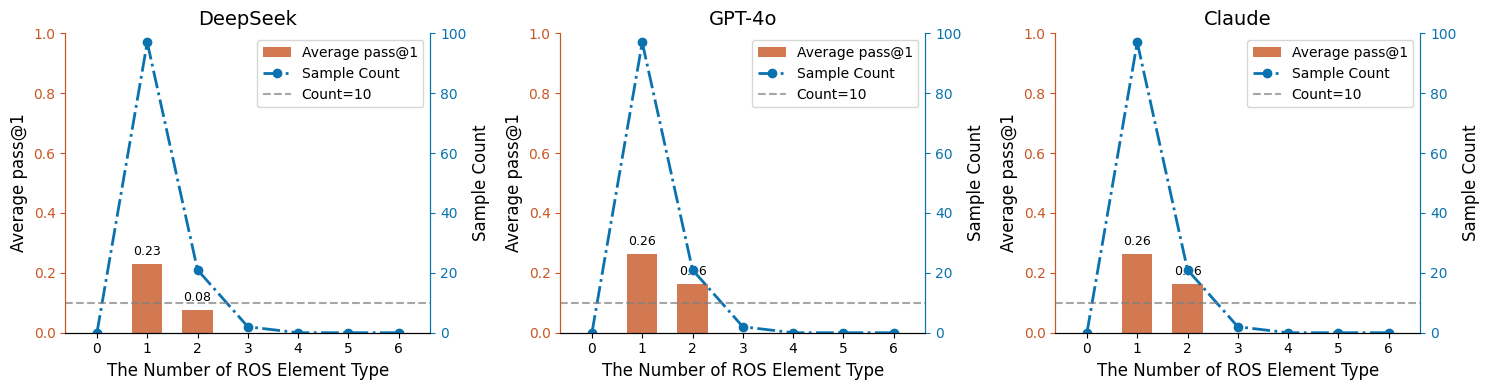

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]

# 准备数据 - 修改为0-7的范围
length_ranges = ['0', '1', '2', '3', '4', '5', '6']
bin_edges = np.arange(0, 8, 1)  # 0, 1, 2, ..., 8

df = pd.read_csv('result/autoware/result.csv')

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 定义模型列表和对应的子图标题
models = ['deepseek', 'gpt-4o', 'llama']
titles = ['DeepSeek', 'GPT-4o', 'Claude']

# 为每个子图创建图表
for i, (model, title) in enumerate(zip(models, titles)):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # 根据不同的模型筛选数据
    df_model_basic = df[(df['category']=='utilities') & (df['model']==model)]
    
    # 按照列表中的元素个数进行划分（以逗号分隔）
    # 将字符串转换为列表并计算元素个数
    df_model_basic['element_count'] = df_model_basic['element'].apply(
        lambda x: len(str(x).split(',')) if pd.notna(x) else 0
    )
    
    # 使用元素个数进行分箱
    df_model_basic['length_range'] = pd.cut(df_model_basic['element_count'], bins=bin_edges, 
                                           labels=length_ranges, right=False)
    
    result = df_model_basic.groupby('length_range', observed=False).agg({
        'pass@1': 'mean',
        'element': 'count'
    }).reindex(length_ranges)

    print(f"{title} results:")
    print(result)
    print(f"Element count statistics for {title}:")
    print(df_model_basic['element_count'].describe())
    print()
    
    x_values = range(len(length_ranges))  # 使用索引作为x值
    y_pass = result['pass@1'].fillna(0).values  # 填充NaN值为0
    y_count = result['element'].fillna(0).values  # 填充NaN值为0
    
    # 绘制图形
    bar = ax1.bar(x_values, y_pass, label='Average pass@1', color='#C85725', width=0.6, alpha=0.8)
    line, = ax2.plot(x_values, y_count, label='Sample Count', color='#0972AF', marker='o', ls='-.', linewidth=2, markersize=6)
    ax2.axhline(y=10, color='grey', linestyle='--', alpha=0.7, label='Count=10')
    
    # 设置x轴和y轴的标签
    ax1.set_xlabel('The Number of ROS Element Type', fontdict={'size': 12})
    ax1.set_ylabel('Average pass@1', fontdict={'size': 12})
    ax2.set_ylabel('Sample Count', fontdict={'size': 12})
    
    # 自定义y轴刻度
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax2.set_ylim(0, 100)
    ax2.set_yticks(np.arange(0, 101, 20))
    
    # 设置x轴刻度 - 修改为0,1,2,3,4,5,6,7
    ax1.set_xticks(range(len(length_ranges)))
    ax1.set_xticklabels(length_ranges, rotation=0)  # 旋转角度改为0
    
    # 添加图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    # 设置轴标签颜色
    ax1.tick_params('y', colors='#C85725')
    ax2.tick_params('y', colors='#0972AF')
    
    # 设置轴颜色
    ax1.spines['left'].set_color('#C85725')
    ax2.spines['left'].set_color('#C85725')
    ax1.spines['right'].set_color('#0972AF')
    ax2.spines['right'].set_color('#0972AF')
    
    # 去掉上轴线
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # 为每个子图添加标题
    ax1.set_title(f'{title}', fontsize=14)
    
    # 在柱状图上添加数值标签
    for j, v in enumerate(y_pass):
        if v > 0:  # 只在有值的地方显示标签
            ax1.text(j, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

# 调整子图之间的间距
plt.tight_layout()

# 展示图片
plt.show()

/tmp/ipykernel_4122991/3156827312.py:22: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="model",  # 指定x轴的数据
/tmp/ipykernel_4122991/3156827312.py:22: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.15`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x="model",  # 指定x轴的数据


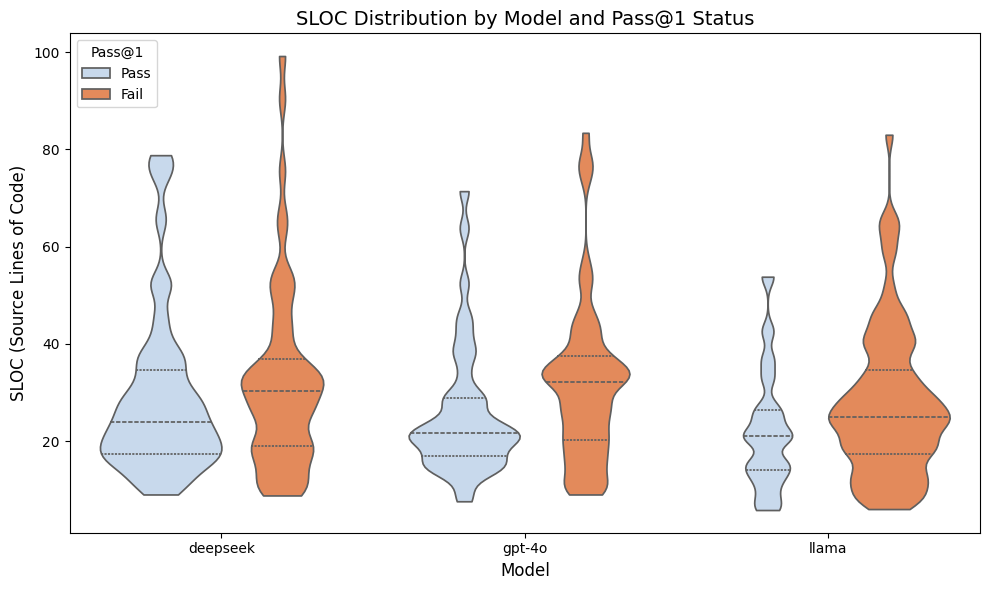

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]
# 读取数据
data = pd.read_csv('result/autoware/result.csv')

# 将pass@1转换为分类变量，便于分组显示
data['pass@1'] = data['pass@1'].apply(lambda x: 'Pass' if x > 0 else 'Fail')

# 绘制分组小提琴图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 方案5: 蓝绿色和橙红色（平衡且美观）
palette = {'Pass': '#C3D9F1', 'Fail': '#F4854A'}

sns.violinplot(x="model",  # 指定x轴的数据
               y="sloc",  # 指定y轴的数据
               hue="pass@1",  # 指定分组变量
               data=data,  # 指定绘图的数据集
               order=['deepseek', 'gpt-4o', 'llama'],  # 指定x轴刻度标签的顺序
               hue_order=['Pass', 'Fail'],  # 指定hue变量的顺序
               scale='count',  # 以数据点数量调节小提琴图的宽度
               dodge=True,  # 将不同组的小提琴图并排显示而不是重叠
               palette=palette,  # 使用选择的颜色方案
               inner="quartile",  # 显示四分位数线
               cut=0,  # 限制小提琴图的范围到数据范围内
               saturation=0.8,  # 调整颜色饱和度，使颜色更加柔和
               bw=0.15  # 控制核密度估计的带宽，值越小越不平滑（默认值为0.8）
              )
# 添加标题和标签
plt.title('SLOC Distribution by Model and Pass@1 Status', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('SLOC (Source Lines of Code)', fontsize=12)

# 设置图例
plt.legend(loc='upper left', title='Pass@1', frameon=True)

# 调整布局并显示图形
plt.tight_layout()
plt.show()

# 可选：保存图形
# plt.savefig('violin_plot_sloc_by_model_pass.png', dpi=300, bbox_inches='tight')

In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

# 读取数据
data = pd.read_csv('result/autoware/result.csv')

# 将pass@1转换为分类变量
data['pass@1'] = data['pass@1'].apply(lambda x: 'Pass' if x == 1 else 'Fail')

# 为每个模型计算Mann-Whitney U检验
models = ['deepseek', 'gpt-4o', 'llama']
results = []

for model in models:
    model_data = data[data['model'] == model]
    
    # 分离Pass和Fail的数据
    pass_sloc = model_data[model_data['pass@1'] == 'Pass']['sloc_ground_truth']
    fail_sloc = model_data[model_data['pass@1'] == 'Fail']['sloc_ground_truth']
    
    # 确保两组都有数据
    if len(pass_sloc) > 0 and len(fail_sloc) > 0:
        # 执行Mann-Whitney U检验
        statistic, p_value = mannwhitneyu(pass_sloc, fail_sloc, alternative='two-sided')
        
        # 计算效应量 (使用秩双列相关系数)
        n1, n2 = len(pass_sloc), len(fail_sloc)
        rbc = 1 - (2 * statistic) / (n1 * n2)  # 秩双列相关系数
        
        results.append({
            'Model': model,
            'U_Statistic': statistic,
            'P_Value': p_value,
            'Effect_Size_RBC': rbc,
            'Pass_n': len(pass_sloc),
            'Fail_n': len(fail_sloc),
            'Pass_Median': pass_sloc.median(),
            'Fail_Median': fail_sloc.median(),
            'Significant': p_value < 0.05
        })

# 创建结果数据框
results_df = pd.DataFrame(results)

# 打印详细结果
print("Mann-Whitney U Test Results for SLOC Differences between Pass and Fail Groups")
print("=" * 80)
for _, row in results_df.iterrows():
    print(f"\nModel: {row['Model']}")
    print(f"  Sample sizes - Pass: {row['Pass_n']}, Fail: {row['Fail_n']}")
    print(f"  Median SLOC - Pass: {row['Pass_Median']:.2f}, Fail: {row['Fail_Median']:.2f}")
    print(f"  U Statistic: {row['U_Statistic']:.2f}")
    print(f"  P-Value: {row['P_Value']:.4f}")
    print(f"  Effect Size (RBC): {row['Effect_Size_RBC']:.3f}")
    
    if row['P_Value'] < 0.05:
        print(f"  Result: SIGNIFICANT difference (p < 0.05)")
        if row['Effect_Size_RBC'] > 0:
            print(f"  Interpretation: Pass group has HIGHER SLOC than Fail group")
        else:
            print(f"  Interpretation: Pass group has LOWER SLOC than Fail group")
    else:
        print(f"  Result: No significant difference (p = {row['P_Value']:.4f})")
    
    print(f"  {'-' * 50}")

Mann-Whitney U Test Results for SLOC Differences between Pass and Fail Groups

Model: deepseek
  Sample sizes - Pass: 15, Fail: 45
  Median SLOC - Pass: 17.00, Fail: 22.00
  U Statistic: 207.50
  P-Value: 0.0268
  Effect Size (RBC): 0.385
  Result: SIGNIFICANT difference (p < 0.05)
  Interpretation: Pass group has HIGHER SLOC than Fail group
  --------------------------------------------------

Model: gpt-4o
  Sample sizes - Pass: 16, Fail: 44
  Median SLOC - Pass: 16.00, Fail: 23.00
  U Statistic: 182.00
  P-Value: 0.0045
  Effect Size (RBC): 0.483
  Result: SIGNIFICANT difference (p < 0.05)
  Interpretation: Pass group has HIGHER SLOC than Fail group
  --------------------------------------------------

Model: llama
  Sample sizes - Pass: 7, Fail: 53
  Median SLOC - Pass: 14.00, Fail: 22.00
  U Statistic: 99.50
  P-Value: 0.0486
  Effect Size (RBC): 0.464
  Result: SIGNIFICANT difference (p < 0.05)
  Interpretation: Pass group has HIGHER SLOC than Fail group
  -----------------------

/tmp/ipykernel_4122991/1774709147.py:14: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="model", y="sloc_ground_truth", hue="pass@1", data=data,
/tmp/ipykernel_4122991/1774709147.py:14: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x="model", y="sloc_ground_truth", hue="pass@1", data=data,
/tmp/ipykernel_4122991/1774709147.py:27: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="model", y="cyclomatic_complexity_ground_truth", hue="pass@1", data=data,
/tmp/ipykernel_4122991/1774709147.py:27: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Settin

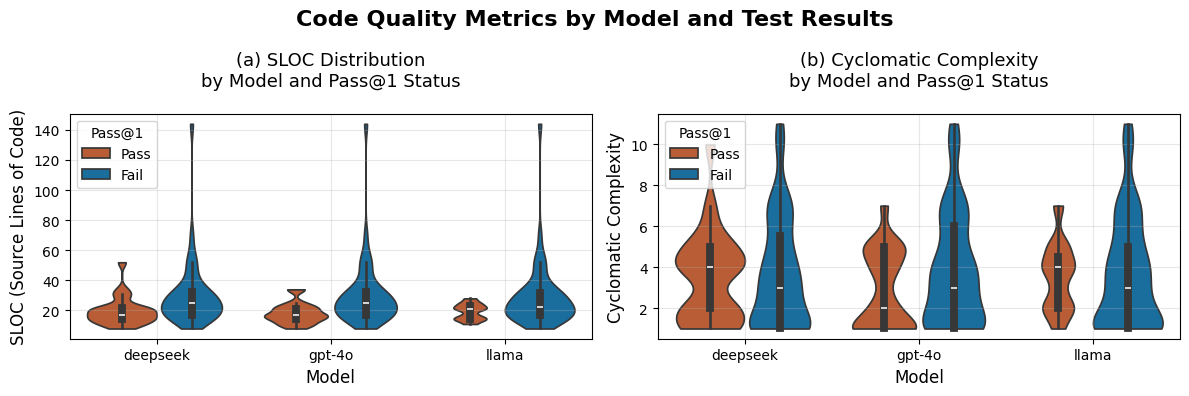

<Figure size 640x480 with 0 Axes>

In [ ]:

# 读取数据
data = pd.read_csv('result/autoware/result.csv')

# 将pass@1转换为分类变量
data['pass@1'] = data['pass@1'].apply(lambda x: 'Pass' if x == 1 else 'Fail')

# 创建包含三个子图的图形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 颜色方案
palette = {'Pass': '#C85725', 'Fail': '#0972AF'}

# 第一个子图：SLOC分布
sns.violinplot(x="model", y="sloc_ground_truth", hue="pass@1", data=data,
               order=['deepseek', 'gpt-4o', 'llama'],
               hue_order=['Pass', 'Fail'],
               scale='count', dodge=True, palette=palette,
               inner="box", cut=0, saturation=0.8, bw=0.3, ax=ax1)

ax1.set_title('(a) SLOC Distribution\nby Model and Pass@1 Status', fontsize=13, pad=20)
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('SLOC (Source Lines of Code)', fontsize=12)
ax1.legend(title='Pass@1', frameon=True, loc='upper left')
ax1.grid(True, alpha=0.3)

# 第二个子图：Cyclomatic Complexity分布
sns.violinplot(x="model", y="cyclomatic_complexity_ground_truth", hue="pass@1", data=data,
               order=['deepseek', 'gpt-4o', 'llama'],
               hue_order=['Pass', 'Fail'],
               scale='count', dodge=True, palette=palette,
               inner="box", cut=0, saturation=0.8, bw=0.3, ax=ax2)

ax2.set_title('(b) Cyclomatic Complexity\nby Model and Pass@1 Status', fontsize=13, pad=20)
ax2.set_xlabel('Model', fontsize=12)
ax2.set_ylabel('Cyclomatic Complexity', fontsize=12)
ax2.legend(title='Pass@1', frameon=True, loc='upper left')
ax2.grid(True, alpha=0.3)


# 添加整体标题
plt.suptitle('Code Quality Metrics by Model and Test Results', fontsize=16, fontweight='bold', y=0.98)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 可选：保存图形（高质量输出）
# plt.savefig('triple_violin_plots.png', dpi=300, bbox_inches='tight')
# plt.savefig('triple_violin_plots.pdf', bbox_inches='tight')tic_complexity']) * 1.1)

# 添加整体标题
plt.suptitle('Code Quality Metrics by Model and Test Results', fontsize=16, fontweight='bold', y=0.98)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 可选：保存图形
# plt.savefig('combined_violin_plots.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_484262/1607117904.py:16: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,


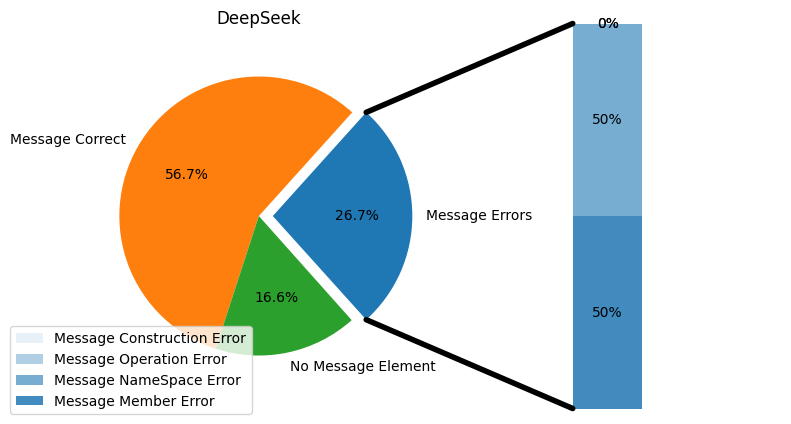

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.2666, .5666, .166]
labels = ['Message Errors', 'Message Correct', 'No Message Element']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.5, .5, .0, .0]
age_labels = ['Message Member Error', 'Message NameSpace Error', 'Message Operation Error', 'Message Construction Error']
bottom = 1
width = .2


# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('DeepSeek', x=-0.5, y=1, transform=ax2.transAxes)
ax2.legend(bbox_to_anchor=(-0.5,0.1), loc='center right')
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)


# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

/tmp/ipykernel_3914462/450914014.py:54: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,


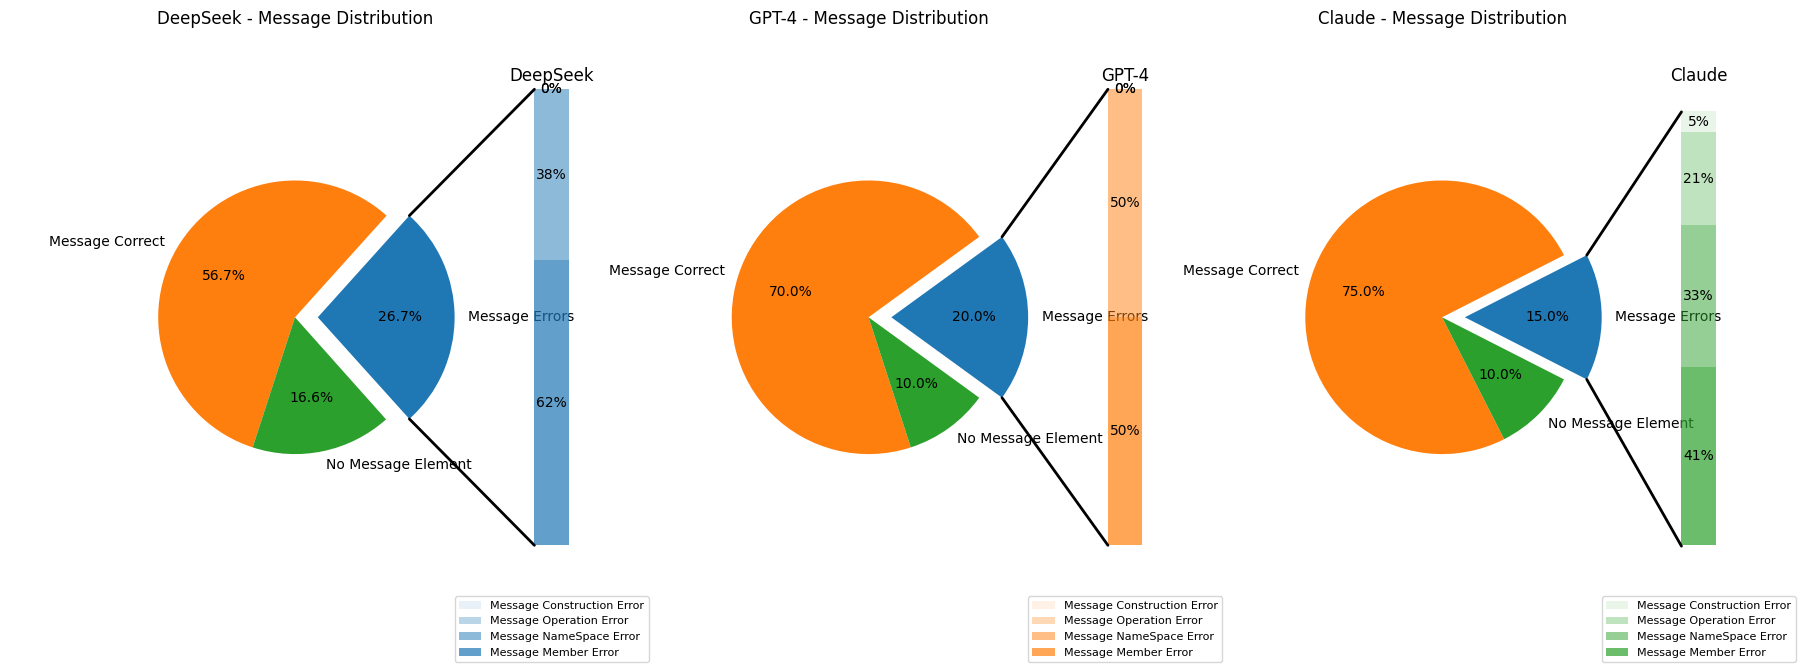

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch

# 创建包含三个子图的图表
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=0.3)

# 三个子图的数据
datasets = [
    {
        'title': 'DeepSeek',
        'overall_ratios': [.2666, .5666, .166],
        'labels': ['Message Errors', 'Message Correct', 'No Message Element'],
        'age_ratios': [.625, .375, .0, .0],
        'age_labels': ['Message Member Error', 'Message NameSpace Error', 
                      'Message Operation Error', 'Message Construction Error']
    },
    {
        'title': 'GPT-4',
        'overall_ratios': [.2, .7, .1],
        'labels': ['Message Errors', 'Message Correct', 'No Message Element'],
        'age_ratios': [.5, .5, .0, .0],
        'age_labels': ['Message Member Error', 'Message NameSpace Error', 
                      'Message Operation Error', 'Message Construction Error']
    },
    {
        'title': 'Claude',
        'overall_ratios': [.15, .75, .1],
        'labels': ['Message Errors', 'Message Correct', 'No Message Element'],
        'age_ratios': [.409, .327, .213, .049],
        'age_labels': ['Message Member Error', 'Message NameSpace Error', 
                      'Message Operation Error', 'Message Construction Error']
    }
]

# 为每个子图绘制饼图和条形图
for i, (ax, data) in enumerate(zip(axes, datasets)):
    # 创建子图中的两个轴 - 调整饼图大小
    ax1 = ax
    # 减小饼图半径
    ax1.set_position([ax1.get_position().x0, ax1.get_position().y0, 
                     ax1.get_position().width * 0.6, ax1.get_position().height])
    
    ax2 = ax1.inset_axes([0.8, 0.1, 0.3, 0.8])  # 调整条形图位置
    
    # 饼图参数
    overall_ratios = data['overall_ratios']
    labels = data['labels']
    explode = [0.1, 0, 0]
    angle = -180 * overall_ratios[0]
    
    # 绘制饼图 - 使用更小的半径
    wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                         labels=labels, explode=explode, radius=0.6)  # 减小半径
    
    # 条形图参数
    age_ratios = data['age_ratios']
    age_labels = data['age_labels']
    bottom = 1
    width = .2
    
    # 绘制条形图
    for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
        bottom -= height
        bc = ax2.bar(0, height, width, bottom=bottom, color=f'C{i}', label=label,
                     alpha=0.1 + 0.2 * j)
        ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    
    ax2.set_title(data['title'], fontsize=12)
    ax2.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize=8)
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)
    
    # 使用ConnectionPatch绘制两个图之间的连接线
    theta1, theta2 = wedges[0].theta1, wedges[0].theta2
    center, r = wedges[0].center, wedges[0].r
    total_height = np.sum(age_ratios)
    
    # 绘制顶部连接线
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = r * np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, total_height), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(2)
    ax2.add_artist(con)
    
    # 绘制底部连接线
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(2)
    ax2.add_artist(con)
    
    # 设置饼图标题
    ax1.set_title(f'{data["title"]} - Message Distribution', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np


# 读取数据

def get_ros_architecture_data(model):
    data = pd.read_csv('result/autoware/code_generation_analysis.csv')
    data = data.fillna(0)


    model_data = data[data['model']==model]
    message_result = [model_data['message_selection_error'].sum()]
#     domain_library_result = [model_data['lack_of_domain_library_error'].sum(),
#             model_data['domain_library_utilization_error'].sum()]
#     condition_result = [model_data['condition_missing'].sum(),
#             model_data['condition_error'].sum()]
    parameter_result = [model_data['lack_of_scenario_specific_parameter_initialization'].sum(),
            model_data['lack_of_dynamic_parameter_reconfiguration'].sum(),
            model_data['set_default_parameter'].sum(),
            model_data['type_mismatch'].sum()]
    topic_result = [model_data['lack_of_scenario_specific_topic_initialization'].sum(),
            model_data['topic_name_mismatch'].sum(),
            model_data['qos_setting_mismatch'].sum(),
            model_data['callback_function_bind_error'].sum()]
    timer_result = [model_data['inappropriate_clock_selection'].sum()]
    diagnostic_result = [model_data['diagnostic_error'].sum()]
    log_result = [model_data['inappropriate_log_level'].sum(),
                  model_data['logger_missing'].sum()]

    sum_result = np.sum(message_result)+np.sum(parameter_result)+np.sum(topic_result)+np.sum(timer_result)+np.sum(diagnostic_result)+np.sum(log_result)
    message_result = np.round((np.array(message_result)/sum_result)*100,2)
    parameter_result = np.round((np.array(parameter_result)/sum_result)*100,2)
    topic_result = np.round((np.array(topic_result)/sum_result)*100,2)
    timer_result = np.round((np.array(timer_result)/sum_result)*100,2)
    diagnostic_result = np.round((np.array(diagnostic_result)/sum_result)*100,2)
    log_result = np.round((np.array(log_result)/sum_result)*100,2)
    return message_result,parameter_result,topic_result,timer_result,diagnostic_result,log_result




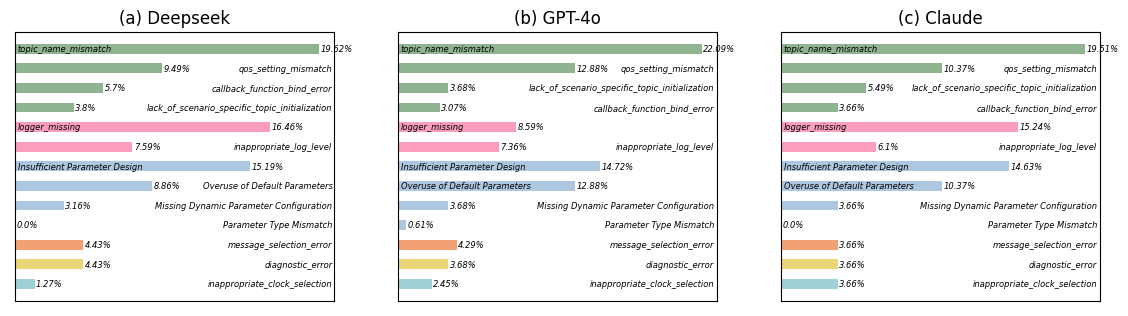

In [ ]:
import matplotlib.pyplot as plt


plt.rcParams['font.serif'] = ['Times New Roman']
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,3.5))
colors = ['#9FD0D6']*1 + ['#ECD577'] * 1 + ['#F2A176'] * 1 + ['#AEC7E0']*4 + ['#FA9EBC']*2 + ['#90B48F']*4
# colors = ['#9FD0D6']*11 + ['#ECD577'] * 2 + ['#F2A176'] *4 + ['#AEC7E0']*1 + ['#FA9EBC']*1 + ['#90B48F']*4

def draw():
    message_categories = ['message_selection_error']
    parameter_categories = ['Insufficient Parameter Design','Missing Dynamic Parameter Configuration','Overuse of Default Parameters','Parameter Type Mismatch']
    topic_categories = ['lack_of_scenario_specific_topic_initialization','topic_name_mismatch','qos_setting_mismatch','callback_function_bind_error']
    timer_categories = ['inappropriate_clock_selection']
    diagnostic_categories = ['diagnostic_error']
    log_categories = ['inappropriate_log_level','logger_missing']

    for model in ['deepseek','gpt-4o','llama']:
        data = get_ros_architecture_data(model)

        sorted_message = sorted(zip(data[0],message_categories),reverse=False)
        sorted_parameter = sorted(zip(data[1],parameter_categories),reverse=False)
        sorted_topic = sorted(zip(data[2],topic_categories),reverse=False)
        sorted_timer = sorted(zip(data[3],timer_categories),reverse=False)
        sorted_diagnostic = sorted(zip(data[4],diagnostic_categories),reverse=False)
        sorted_log = sorted(zip(data[5],log_categories),reverse=False)


        sorted_message_values,sorted_message_categories = zip(*sorted_message)
        sorted_parameter_values,sorted_parameter_categories = zip(*sorted_parameter)
        sorted_topic_values,sorted_topic_categories = zip(*sorted_topic)
        sorted_timer_values,sorted_timer_categories = zip(*sorted_timer)
        sorted_diagnostic_values,sorted_diagnostic_categories = zip(*sorted_diagnostic)
        sorted_log_values,sorted_log_categories = zip(*sorted_log)

        sorted_values = np.concatenate([sorted_timer_values,sorted_diagnostic_values,sorted_message_values,sorted_parameter_values,sorted_log_values,sorted_topic_values])
        sorted_categories = np.concatenate([sorted_timer_categories,sorted_diagnostic_categories,sorted_message_categories,sorted_parameter_categories,sorted_log_categories,sorted_topic_categories])



        normalized_alphas = (sorted_values-np.min(sorted_values))/(np.max(sorted_values)-np.min(sorted_values))*0.9+0.1

        if model == 'deepseek':
            bars = ax1.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_timer_categories +sorted_diagnostic_categories + sorted_message_categories+ sorted_parameter_categories + sorted_log_categories+ sorted_topic_categories)-1 \
                   or i==len(sorted_timer_categories +sorted_diagnostic_categories + sorted_message_categories+ sorted_parameter_categories + sorted_log_categories)-1 \
                   or i==len(sorted_timer_categories +sorted_diagnostic_categories + sorted_message_categories+ sorted_parameter_categories )-1:
                    ax1.text(0.2,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax1.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    ax1.text(20.5,i,f'{category}',ha='right',va='center',fontsize=6,style='italic')
                    ax1.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax1.set_xticks([])
            ax1.set_yticks([])
            ax1.set_title(f'(a) Deepseek', fontsize=12)
        if model == 'gpt-4o':
            bars = ax2.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_timer_categories +sorted_diagnostic_categories + sorted_message_categories+ sorted_parameter_categories + sorted_log_categories+ sorted_topic_categories)-1 \
                   or i==len(sorted_timer_categories +sorted_diagnostic_categories + sorted_message_categories+ sorted_parameter_categories + sorted_log_categories)-1 \
                   or i==len(sorted_timer_categories +sorted_diagnostic_categories + sorted_message_categories+ sorted_parameter_categories )-1 \
                   or i==len(sorted_timer_categories +sorted_diagnostic_categories + sorted_message_categories+ sorted_parameter_categories )-2:
                    ax2.text(0.2,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax2.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    ax2.text(23,i,f'{category}',ha='right',va='center',fontsize=6,style='italic')
                    ax2.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax2.set_xticks([])
            ax2.set_yticks([])
            ax2.set_title(f'(b) GPT-4o', fontsize=12)   

        if model == 'llama':
            bars = ax3.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_timer_categories +sorted_diagnostic_categories + sorted_message_categories+ sorted_parameter_categories + sorted_log_categories+ sorted_topic_categories)-1 \
                   or i==len(sorted_timer_categories +sorted_diagnostic_categories + sorted_message_categories+ sorted_parameter_categories + sorted_log_categories)-1 \
                   or i==len(sorted_timer_categories +sorted_diagnostic_categories + sorted_message_categories+ sorted_parameter_categories )-1 \
                   or i==len(sorted_timer_categories +sorted_diagnostic_categories + sorted_message_categories+ sorted_parameter_categories )-2:
                    ax3.text(0.2,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax3.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    ax3.text(20.3,i,f'{category}',ha='right',va='center',fontsize=6,style='italic')
                    ax3.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax3.set_xticks([])
            ax3.set_yticks([])   
            ax3.set_title(f'(c) Claude', fontsize=12)

draw() 
plt.show()

In [ ]:
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np


# 读取数据

def get_ros_architecture_data(model):
    data = pd.read_csv('result/autoware/code_generation_analysis.csv')
    data = data.fillna(0)


    model_data = data[data['model']==model]
    domain_library_result = [model_data['lack_of_domain_library_error'].sum(),
                      model_data['domain_library_utilization_error'].sum()]
    condition_result = [model_data['condition check logic misapplication'].sum(),
                      model_data['condition_missing'].sum()]
    message_result = [model_data['message_operation_error'].sum(),
                      model_data['message_member_error'].sum(),
                      model_data['message_not_declared'].sum(),
                      model_data['message_initialization_error'].sum()]
    parameter_result = [model_data['not_use_parameter_server'].sum(),
                        model_data['type_mismatch'].sum(),
                        model_data['hard_coded_configuration_issues'].sum(),
                        model_data['parameter_value_set_error'].sum()]
    topic_result = [model_data['publisher_usage_error'].sum(),
            model_data['not_use_topic_usage'].sum()]
    timer_result = [model_data['timestamp_processing_error'].sum(),
                    model_data['timestamp_processing_missing'].sum(),
                    model_data['timestamp_operation_mismatch'].sum()]

    sum_result = np.sum(domain_library_result)+np.sum(condition_result)+np.sum(message_result)+np.sum(parameter_result)+np.sum(topic_result)+np.sum(timer_result)
    domain_library_result = np.round_((np.array(domain_library_result)/sum_result)*100,2)
    condition_result = np.round_((np.array(condition_result)/sum_result)*100,2)
    message_result = np.round((np.array(message_result)/sum_result)*100,2)
    parameter_result = np.round((np.array(parameter_result)/sum_result)*100,2)
    topic_result = np.round((np.array(topic_result)/sum_result)*100,2)
    timer_result = np.round((np.array(timer_result)/sum_result)*100,2)
    return domain_library_result,condition_result,message_result,parameter_result,topic_result,timer_result




/tmp/ipykernel_4597/1658523511.py:17: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  data = get_ros_architecture_data(model)
/tmp/ipykernel_4597/1658523511.py:17: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  data = get_ros_architecture_data(model)
/tmp/ipykernel_4597/1658523511.py:17: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  data = get_ros_architecture_data(model)


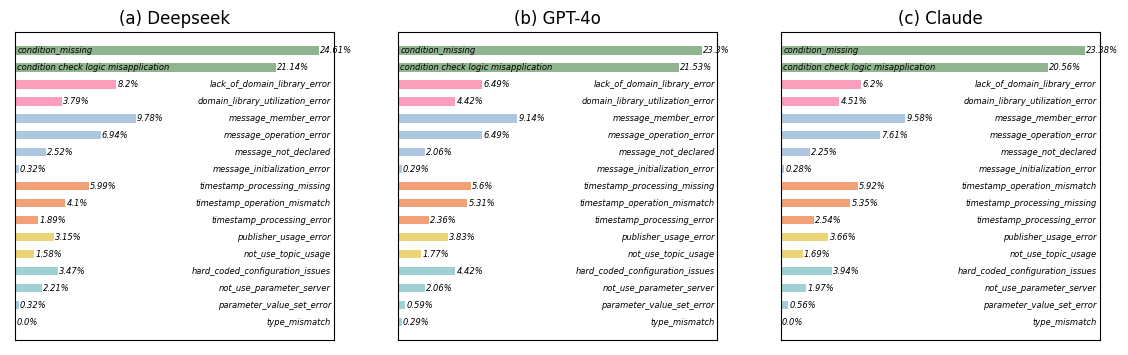

In [ ]:
import matplotlib.pyplot as plt


plt.rcParams['font.serif'] = ['Times New Roman']
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,4))
colors = ['#9FD0D6']*4 + ['#ECD577'] * 2 + ['#F2A176'] *3 + ['#AEC7E0']*4 + ['#FA9EBC']*2 + ['#90B48F']*2

def draw():
    domain_library_categories = ['lack_of_domain_library_error','domain_library_utilization_error']
    condition_categories = ['condition check logic misapplication','condition_missing']
    message_categories = ['message_operation_error','message_member_error','message_not_declared','message_initialization_error']
    parameter_categories = ['not_use_parameter_server','type_mismatch','hard_coded_configuration_issues','parameter_value_set_error']
    topic_categories = ['publisher_usage_error','not_use_topic_usage']
    timer_categories = ['timestamp_processing_error','timestamp_processing_missing','timestamp_operation_mismatch']

    for model in ['deepseek','gpt-4o','llama']:
        data = get_ros_architecture_data(model)

        sorted_domain_library = sorted(zip(data[0],domain_library_categories),reverse=False)
        sorted_condition = sorted(zip(data[1],condition_categories),reverse=False)
        sorted_message = sorted(zip(data[2],message_categories),reverse=False)
        sorted_parameter = sorted(zip(data[3],parameter_categories),reverse=False)
        sorted_topic = sorted(zip(data[4],topic_categories),reverse=False)
        sorted_timer = sorted(zip(data[5],timer_categories),reverse=False)

        sorted_domain_library_values,sorted_domain_library_categories = zip(*sorted_domain_library)
        sorted_condition_values,sorted_condition_categories = zip(*sorted_condition)
        sorted_message_values,sorted_message_categories = zip(*sorted_message)
        sorted_parameter_values,sorted_parameter_categories = zip(*sorted_parameter)
        sorted_topic_values,sorted_topic_categories = zip(*sorted_topic)
        sorted_timer_values,sorted_timer_categories = zip(*sorted_timer)

        sorted_values = np.concatenate([sorted_parameter_values,sorted_topic_values,sorted_timer_values,sorted_message_values,sorted_domain_library_values,sorted_condition_values])
        sorted_categories = np.concatenate([sorted_parameter_categories,sorted_topic_categories,sorted_timer_categories,sorted_message_categories,sorted_domain_library_categories,sorted_condition_categories])

        normalized_alphas = (sorted_values-np.min(sorted_values))/(np.max(sorted_values)-np.min(sorted_values))*0.9+0.1

        if model == 'deepseek':
            bars = ax1.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-1 \
                    or i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-2 :
                    ax1.text(0.2,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax1.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    ax1.text(25.6,i,f'{category}',ha='right',va='center',fontsize=6,style='italic')
                    ax1.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax1.set_xticks([])
            ax1.set_yticks([])
            ax1.set_title(f'(a) Deepseek', fontsize=12)
        if model == 'gpt-4o':
            bars = ax2.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-1 \
                    or i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-2 :
                    ax2.text(0.2,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax2.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    ax2.text(24.3,i,f'{category}',ha='right',va='center',fontsize=6,style='italic')
                    ax2.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax2.set_xticks([])
            ax2.set_yticks([])
            ax2.set_title(f'(b) GPT-4o', fontsize=12)   

        if model == 'llama':
            bars = ax3.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-1 \
                    or i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-2 :
                    ax3.text(0.2,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax3.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    ax3.text(24.3,i,f'{category}',ha='right',va='center',fontsize=6,style='italic')
                    ax3.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax3.set_xticks([])
            ax3.set_yticks([])   
            ax3.set_title(f'(c) Claude', fontsize=12)

draw() 
plt.show()

In [ ]:
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np


# 读取数据

def get_ros_architecture_data(model):
    data = pd.read_csv('result/autoware/code_generation_analysis.csv')
    data = data.fillna(0)


    model_data = data[data['model']==model]
    domain_library_result = [model_data['lack_of_domain_library_error'].sum(),
                      model_data['domain_library_utilization_error'].sum()]
    condition_result = [model_data['condition check logic misapplication'].sum(),
                      model_data['condition_missing'].sum()]
    message_result = [model_data['message_operation_error'].sum(),
                      model_data['message_member_error'].sum(),
                      model_data['message_not_declared'].sum(),
                      model_data['message_initialization_error'].sum(),
                      model_data['message_selection_error'].sum()]
    parameter_result = [model_data['type_mismatch'].sum(),
                        model_data['hard_coded_configuration_issues'].sum(),
                        model_data['parameter_value_set_error'].sum(),
                        model_data['lack_of_scenario_specific_parameter_initialization'].sum(),
                        model_data['lack_of_dynamic_parameter_reconfiguration'].sum(),
                        model_data['set_default_parameter'].sum()]
    topic_result = [model_data['publisher_usage_error'].sum(),
                    model_data['lack_of_scenario_specific_topic_initialization'].sum(),
                    model_data['topic_name_mismatch'].sum(),
                    model_data['qos_setting_mismatch'].sum(),
                    model_data['callback_function_bind_error'].sum(),
                    model_data['not_use_topic_usage'].sum()]
    timer_result = [model_data['timestamp_processing_error'].sum(),
                    model_data['timestamp_processing_missing'].sum(),
                    model_data['timestamp_operation_mismatch'].sum(),
                    model_data['inappropriate_clock_selection'].sum()]
    diagnostic_result = [model_data['diagnostic_error'].sum()]
    log_result = [model_data['inappropriate_log_level'].sum(),
                model_data['logger_missing'].sum()]
    sum_result = np.sum(domain_library_result)+np.sum(condition_result)+np.sum(message_result)+np.sum(parameter_result)+np.sum(topic_result)+np.sum(timer_result)+np.sum(diagnostic_result)+np.sum(log_result)
    domain_library_result = np.round_((np.array(domain_library_result)/sum_result)*100,2)
    condition_result = np.round_((np.array(condition_result)/sum_result)*100,2)
    message_result = np.round((np.array(message_result)/sum_result)*100,2)
    parameter_result = np.round((np.array(parameter_result)/sum_result)*100,2)
    topic_result = np.round((np.array(topic_result)/sum_result)*100,2)
    timer_result = np.round((np.array(timer_result)/sum_result)*100,2)
    diagnostic_result = np.round((np.array(diagnostic_result)/sum_result)*100,2)
    log_result = np.round((np.array(log_result)/sum_result)*100,2)
    return domain_library_result,condition_result,message_result,parameter_result,topic_result,timer_result,diagnostic_result,log_result



/tmp/ipykernel_4597/2845305568.py:19: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  data = get_ros_architecture_data(model)
/tmp/ipykernel_4597/2845305568.py:19: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  data = get_ros_architecture_data(model)
/tmp/ipykernel_4597/2845305568.py:19: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  data = get_ros_architecture_data(model)


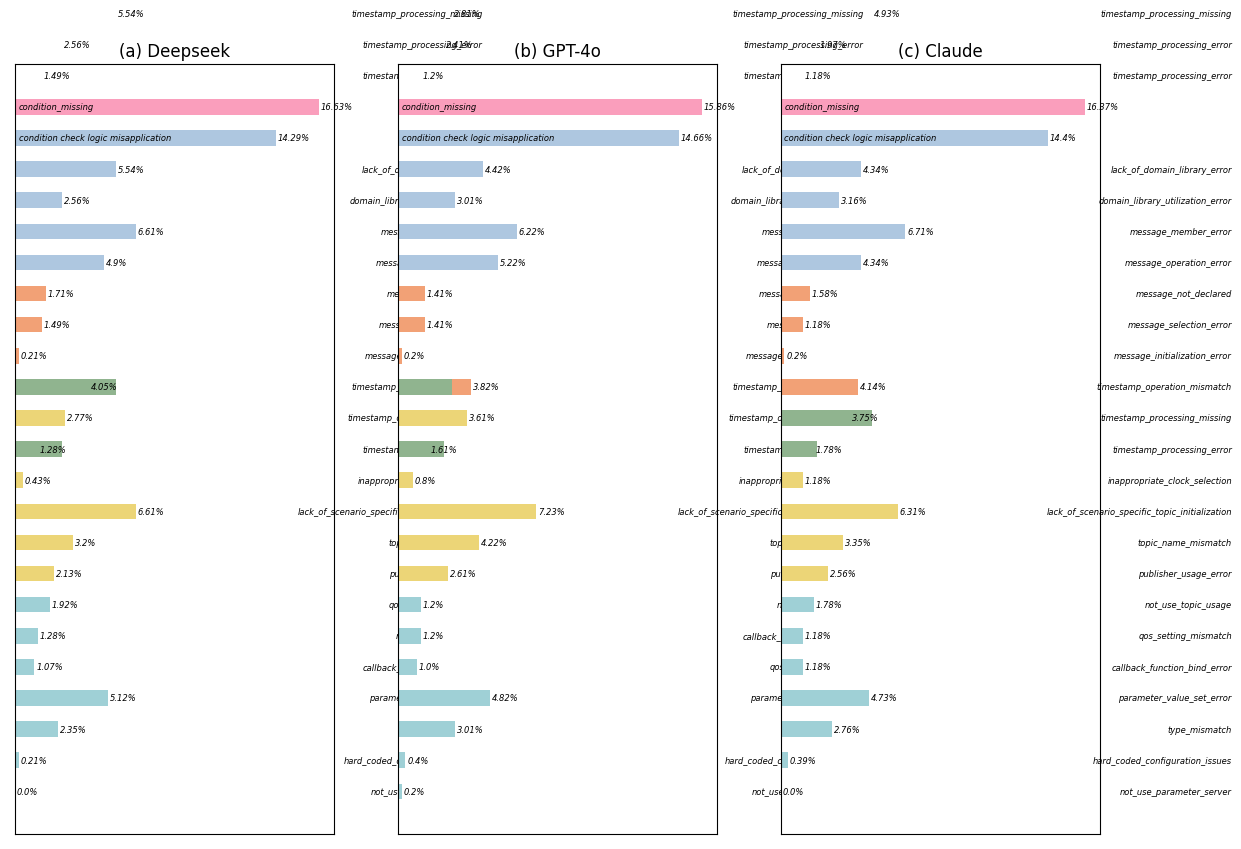

In [ ]:
import matplotlib.pyplot as plt


plt.rcParams['font.serif'] = ['Times New Roman']
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,10))
colors = ['#9FD0D6']*3 + ['#9FD0D6']*4 + ['#ECD577'] * 6 + ['#F2A176'] *4 + ['#AEC7E0']*5 + ['#FA9EBC']*2 + ['#90B48F']*2

def draw():
    domain_library_categories = ['lack_of_domain_library_error','domain_library_utilization_error']
    condition_categories = ['condition check logic misapplication','condition_missing']
    message_categories = ['message_operation_error','message_member_error','message_not_declared','message_initialization_error','message_selection_error']
    parameter_categories = ['not_use_parameter_server','type_mismatch','hard_coded_configuration_issues','parameter_value_set_error']
    topic_categories = ['publisher_usage_error','not_use_topic_usage','lack_of_scenario_specific_topic_initialization','topic_name_mismatch','qos_setting_mismatch','callback_function_bind_error']
    timer_categories = ['timestamp_processing_error','timestamp_processing_missing','timestamp_operation_mismatch','inappropriate_clock_selection']
    diagnostic_categories = ['diagnostic_error']
    logger_categories = ['inappropriate_log_level','logger_missing']

    for model in ['deepseek','gpt-4o','llama']:
        data = get_ros_architecture_data(model)

        sorted_domain_library = sorted(zip(data[0],domain_library_categories),reverse=False)
        sorted_condition = sorted(zip(data[1],condition_categories),reverse=False)
        sorted_message = sorted(zip(data[2],message_categories),reverse=False)
        sorted_parameter = sorted(zip(data[3],parameter_categories),reverse=False)
        sorted_topic = sorted(zip(data[4],topic_categories),reverse=False)
        sorted_timer = sorted(zip(data[5],timer_categories),reverse=False)
        sorted_diagnostic = sorted(zip(data[6],timer_categories),reverse=False)
        sorted_log = sorted(zip(data[7],timer_categories),reverse=False)

        sorted_domain_library_values,sorted_domain_library_categories = zip(*sorted_domain_library)
        sorted_condition_values,sorted_condition_categories = zip(*sorted_condition)
        sorted_message_values,sorted_message_categories = zip(*sorted_message)
        sorted_parameter_values,sorted_parameter_categories = zip(*sorted_parameter)
        sorted_topic_values,sorted_topic_categories = zip(*sorted_topic)
        sorted_timer_values,sorted_timer_categories = zip(*sorted_timer)
        sorted_diagnostic_values,sorted_diagnostic_categories = zip(*sorted_diagnostic)
        sorted_logger_values,sorted_logger_categories = zip(*sorted_log)
        

        sorted_values = np.concatenate([sorted_parameter_values,sorted_topic_values,sorted_timer_values,sorted_message_values,sorted_domain_library_values,sorted_condition_values,sorted_diagnostic_values,sorted_logger_values])
        sorted_categories = np.concatenate([sorted_parameter_categories,sorted_topic_categories,sorted_timer_categories,sorted_message_categories,sorted_domain_library_categories,sorted_condition_categories,sorted_diagnostic_categories,sorted_logger_categories])

        normalized_alphas = (sorted_values-np.min(sorted_values))/(np.max(sorted_values)-np.min(sorted_values))*0.9+0.1

        if model == 'deepseek':
            bars = ax1.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-1 \
                    or i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-2 :
                    ax1.text(0.2,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax1.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    ax1.text(25.6,i,f'{category}',ha='right',va='center',fontsize=6,style='italic')
                    ax1.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax1.set_xticks([])
            ax1.set_yticks([])
            ax1.set_title(f'(a) Deepseek', fontsize=12)
        if model == 'gpt-4o':
            bars = ax2.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-1 \
                    or i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-2 :
                    ax2.text(0.2,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax2.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    ax2.text(24.3,i,f'{category}',ha='right',va='center',fontsize=6,style='italic')
                    ax2.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax2.set_xticks([])
            ax2.set_yticks([])
            ax2.set_title(f'(b) GPT-4o', fontsize=12)   

        if model == 'llama':
            bars = ax3.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-1 \
                    or i==len(sorted_domain_library_categories)+len(sorted_message_categories)+len(sorted_parameter_categories)+len(sorted_topic_categories)+len(sorted_timer_categories)+len(sorted_condition_categories)-2 :
                    ax3.text(0.2,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax3.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    ax3.text(24.3,i,f'{category}',ha='right',va='center',fontsize=6,style='italic')
                    ax3.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax3.set_xticks([])
            ax3.set_yticks([])   
            ax3.set_title(f'(c) Claude', fontsize=12)

draw() 
plt.show()

45.64


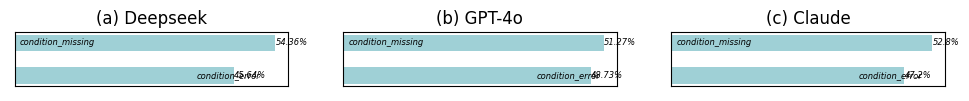

In [ ]:
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数

def get_function_data(model):
    data = pd.read_csv('result/autoware/code_generation_analysis.csv')
    data = data.fillna(0)

    model_data = data[data['model']==model]
    domain_library_result = [model_data['condition_missing'].sum(),
                      model_data['condition_error'].sum()]
    
    domain_library_result = np.round((np.array(domain_library_result)/np.sum(domain_library_result))*100,2)
    return domain_library_result



plt.rcParams['font.serif'] = ['Times New Roman']
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,0.7))
colors = ['#9FD0D6']*2

def draw():
    domain_library_categories = ['condition_missing','condition_error']

    for model in ['deepseek','gpt-4o','llama']:
        data = get_function_data(model)

        sorted_message = sorted(zip(data,domain_library_categories),reverse=False)

        sorted_message_values,sorted_message_categories = zip(*sorted_message)

        sorted_values = np.concatenate([sorted_message_values])
        sorted_categories = np.concatenate([sorted_message_categories])

        normalized_alphas = (sorted_values-np.min(sorted_values))/(np.max(sorted_values)-np.min(sorted_values))*0.9+0.1

        if model == 'deepseek':
            bars = ax1.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_message_categories)-1:
                    # or i == len(sorted_message_categories+sorted_parameter_categories+sorted_topic_categories)-1 \
                    # or i == len(sorted_message_categories+sorted_parameter_categories+sorted_topic_categories+sorted_timer_values)-1:
                    ax1.text(1,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax1.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    print(value)
                    ax1.text(38,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax1.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax1.set_xticks([])
            ax1.set_yticks([])
            ax1.set_title(f'(a) Deepseek', fontsize=12)
        if model == 'gpt-4o':
            bars = ax2.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_message_categories)-1:
                    # or i == len(sorted_message_categories+sorted_parameter_categories+sorted_topic_categories)-1 \
                    # or i == len(sorted_message_categories+sorted_parameter_categories+sorted_topic_categories+sorted_timer_values)-1:
                    ax2.text(1,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax2.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    ax2.text(38,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax2.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax2.set_xticks([])
            ax2.set_yticks([])
            ax2.set_title(f'(b) GPT-4o', fontsize=12)   

        if model == 'llama':
            bars = ax3.barh(sorted_categories,sorted_values, color=colors, height=0.5)

            # for bar, alpha in zip(bars,normalized_alphas):
            #     bar.set_alpha(alpha)


            for i,(category,value) in enumerate(zip(sorted_categories,sorted_values)):
                if i==len(sorted_message_categories)-1:
                    # or i == len(sorted_message_categories+sorted_parameter_categories+sorted_topic_categories)-1 \
                    # or i == len(sorted_message_categories+sorted_parameter_categories+sorted_topic_categories+sorted_timer_values)-1:
                    ax3.text(1,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax3.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')
                else:
                    ax3.text(38,i,f'{category}',ha='left',va='center',fontsize=6,style='italic')
                    ax3.text(value+0.1,i,f'{value}%',ha='left',va='center',fontsize=6,style='italic')


            ax3.set_xticks([])
            ax3.set_yticks([])   
            ax3.set_title(f'(c) Claude', fontsize=12)

draw() 
plt.show()

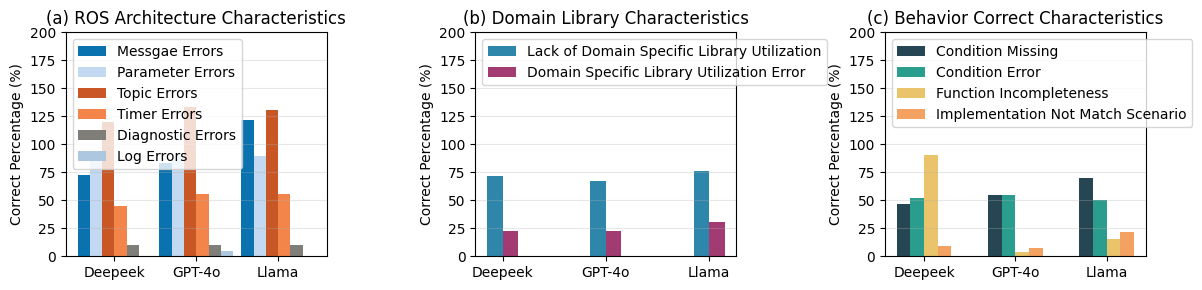

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_ros_architecture_data(model):
    data = pd.read_csv('result/autoware/annotation.csv')
    data = data.fillna(0)

    model_data = data[data['model']==model]
    message_result = [model_data['message_member_error'].sum(),
            model_data['message_operation_error'].sum(),
            model_data['message_construction_error'].sum(),
            model_data['message_not_declare_error'].sum()]
    domain_library_result = [model_data['lack_of_domain_library_error'].sum(),
            model_data['domain_library_utilization_error'].sum()]
    condition_result = [model_data['condition_missing'].sum(),
            model_data['condition_error'].sum()]
    parameter_result = [model_data['lack_of_scenario_specific_parameter_initialization'].sum(),
            model_data['lack_of_dynamic_parameter_reconfiguration'].sum(),
            model_data['hard_coded_configuration_issues'].sum()]
    topic_result = [model_data['lack_of_scenario_specific_topic_initialization'].sum(),
            model_data['queue_size_mismatch'].sum(),
            model_data['lack_of_specific_qos'].sum(),
            model_data['topic_naming_lack_of_systematic_organization'].sum(),
            model_data['publish_message_error'].sum()]
    timer_result = [model_data['inappropriate_clock_selection'].sum(),
            model_data['insufficient_timer_precision'].sum(),
            model_data['missing_clock_initialization'].sum(),
            model_data['timestamp_processing_error'].sum()]
    diagnostic_result = [model_data['diagnostic_missing'].sum()]
    log_result = [model_data['inappropriate_log_level'].sum()]

    message_result = np.array(message_result)
    parameter_result = np.array(parameter_result)
    topic_result = np.array(topic_result)
    timer_result = np.array(timer_result)
    diagnostic_result = np.array(diagnostic_result)
    log_result = np.array(log_result)
    return message_result,parameter_result,topic_result,timer_result,diagnostic_result,log_result

def get_domain_library_data(model):
    data = pd.read_csv('result/autoware/annotation.csv')
    data = data.fillna(0)

    model_data = data[data['model']==model]
    domain_library_result = [model_data['lack_of_domain_library_error'].sum(),
                      model_data['domain_library_utilization_error'].sum()]
    return domain_library_result

def get_function_data(model):
    data = pd.read_csv('result/autoware/annotation.csv')
    data = data.fillna(0)

    model_data = data[data['model']==model]
    domain_library_result = [model_data['condition_missing'].sum(),
                      model_data['condition_error'].sum()]
    
    return domain_library_result


# 创建包含3个子图的图表
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

species = ('Deepeek', 'GPT-4o', 'Llama')
architecture_data = list()
for model in ['deepseek','gpt-4o','llama']:
    data = get_ros_architecture_data(model)
    row_sums = list()
    for each in data:
        row_sums.append(sum(each))
    architecture_data.append(row_sums)

domain_data = list()
for model in ['deepseek','gpt-4o','llama']:
    data = get_domain_library_data(model)
    domain_data.append(data)

condition_data = list()
for model in ['deepseek','gpt-4o','llama']:
    data = get_function_data(model)
    condition_data.append(data)



architecture_data = np.array(architecture_data).T   
domain_data = np.array(domain_data).T
condition_data = np.array(condition_data).T
datasets = [
    {
        'title': '(a) ROS Architecture Characteristics',
        'data': {
            'Messgae Errors': architecture_data[0],
            'Parameter Errors': architecture_data[1],
            'Topic Errors': architecture_data[2],
            'Timer Errors': architecture_data[3],
            'Diagnostic Errors': architecture_data[4],
            'Log Errors': architecture_data[5]
        },
        'colors': ['#0972AF', '#C3D9F1', '#C85725', '#F4854A', '#7F7E79','#aec7e0']
    },
    {
        'title': '(b) Domain Library Characteristics',
        'data': {
            'Lack of Domain Specific Library Utilization': domain_data[0],
            'Domain Specific Library Utilization Error': domain_data[1]
        },
        'colors': ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
    },
    {
        'title': '(c) Behavior Correct Characteristics',
        'data': {
            'Condition Missing': condition_data[0],
            'Condition Error': condition_data[1],
            'Function Incompleteness': np.array([90.1, 3.8, 15.7]),
            'Implementation Not Match Scenario': np.array([9.6, 7.1, 21.4])
        },
        'colors': ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']
    }
]

# 为每个子图创建不同的柱状图
for ax_idx, ax in enumerate(axes):
    dataset = datasets[ax_idx]
    x = np.arange(len(species))
    width = 0.15
    multiplier = 0

    for i, (attribute, measurement) in enumerate(dataset['data'].items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=dataset['colors'][i])
        multiplier += 1

    # 设置每个子图的标签和标题
    ax.set_ylabel('Correct Percentage (%)')
    ax.set_title(dataset['title'])
    ax.set_xticks(x + width * (multiplier - 1) / 2)
    ax.set_xticklabels(species)
    ax.set_ylim(0, 200)
    ax.grid(True, axis='y', alpha=0.3)
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

lack_of_domain_library_library domain_library_utilization_library
['opml', 'bgi::tree', 'CGAL', 'Eigen', 'bg', 'lanelet', 'tf2', 'boost', 'pcl', 'Matrix6d']
[1, 1, 0, 2, 1, 5, 10, 4, 2, 1] [0, 0, 1, 0, 0, 4, 4, 0, 0, 0]
[100.0, 100.0, 0.0, 100.0, 100.0, 55.56, 71.43, 100.0, 100.0, 100.0] [0.0, 0.0, 100.0, 0.0, 0.0, 44.44, 28.57, 0.0, 0.0, 0.0]
lack_of_domain_library_library domain_library_utilization_library
['opml', 'bgi::tree', 'CGAL', 'Eigen', 'bg', 'lanelet', 'tf2', 'boost', 'pcl', 'Matrix6d']
[1, 0, 0, 1, 1, 4, 9, 4, 2, 0] [0, 1, 1, 0, 1, 7, 4, 0, 1, 0]
[100.0, 0.0, 0.0, 100.0, 50.0, 36.36, 69.23, 100.0, 66.67, 0] [0.0, 100.0, 100.0, 0.0, 50.0, 63.64, 30.77, 0.0, 33.33, 0]
lack_of_domain_library_library domain_library_utilization_library
['opml', 'bgi::tree', 'CGAL', 'Eigen', 'bg', 'lanelet', 'tf2', 'boost', 'pcl', 'Matrix6d']
[1, 0, 1, 2, 1, 3, 9, 3, 2, 0] [0, 1, 0, 0, 1, 7, 2, 1, 1, 0]
[100.0, 0.0, 100.0, 100.0, 50.0, 30.0, 81.82, 75.0, 66.67, 0] [0.0, 100.0, 0.0, 0.0, 50.0, 70.

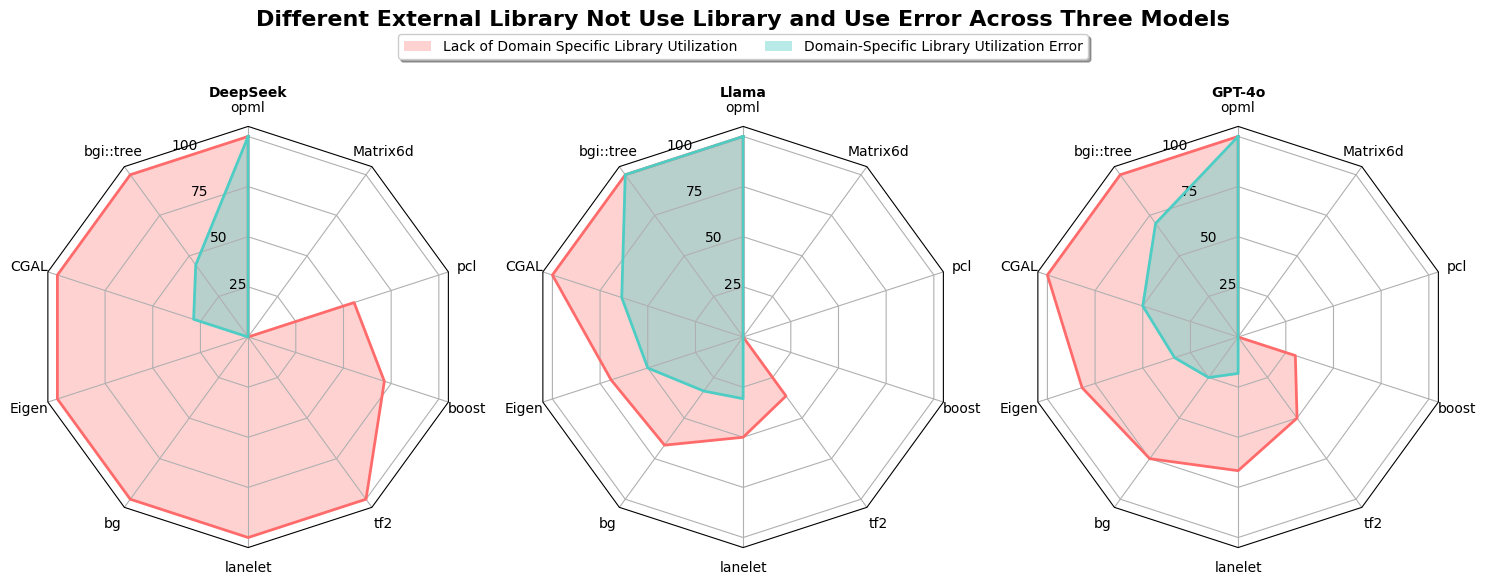

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


# 读取数据
data = pd.read_csv('result/autoware/code_generation_analysis.csv')
data = data.fillna(0)
lack_of_domain_library_lib = set(data[data['lack_of_domain_library_library']!=0]['lack_of_domain_library_library'])
lack_of_domain_library_lib_list=list()
for item in lack_of_domain_library_lib:
    if ',' not in item:
        lack_of_domain_library_lib_list.append(item)
    else:
        lack_of_domain_library_lib_list = lack_of_domain_library_lib_list + item.split(',')

domain_library_utilization_lib = set(data[data['domain_library_utilization_library']!=0]['domain_library_utilization_library'])
domain_library_utilization_lib_list=list()
for item in domain_library_utilization_lib_list:
    if ',' not in item:
        domain_library_utilization_lib_list.append(item)
    else:
        domain_library_utilization_lib_list = domain_library_utilization_lib_list + item.split(',')



domain_library = list(set(lack_of_domain_library_lib_list)) + list(set(domain_library_utilization_lib_list))

def calculate_position_percentage(list1, list2):
    """计算两个列表在相同位置上数值的相对占比"""
    percentages_list1 = []
    percentages_list2 = []
    
    for i in range(len(list1)):
        total = list1[i] + list2[i]
        if total == 0:  # 避免除零错误
            percent1 = 0
            percent2 = 0
        else:
            percent1 = (list1[i] / total) * 100
            percent2 = (list2[i] / total) * 100
        
        percentages_list1.append(round(percent1, 2))
        percentages_list2.append(round(percent2, 2))
    
    return percentages_list1, percentages_list2

def get_data(model):
    model_data = data[data['model']==model]
    domain_library_utilization_lib = list()
    lack_of_domain_library_lib = list()
    for each in domain_library:
        lack_of_domain_library_lib_number = 0
        domain_library_utilization_lib_number = 0
        for index, row in model_data.iterrows():
            if row['lack_of_domain_library_library']!=0:
                if each in row['lack_of_domain_library_library']:
                    lack_of_domain_library_lib_number = lack_of_domain_library_lib_number + 1
            if row['domain_library_utilization_library']!=0:
                if each in row['domain_library_utilization_library']:
                    domain_library_utilization_lib_number = domain_library_utilization_lib_number + 1
        domain_library_utilization_lib.append(domain_library_utilization_lib_number)
        lack_of_domain_library_lib.append(lack_of_domain_library_lib_number)
    print('lack_of_domain_library_library','domain_library_utilization_library')
    print(domain_library)
    print(lack_of_domain_library_lib,domain_library_utilization_lib)
    lack_of_domain_library_lib,domain_library_utilization_lib = calculate_position_percentage(lack_of_domain_library_lib,domain_library_utilization_lib)
    print(lack_of_domain_library_lib,domain_library_utilization_lib)
    return [lack_of_domain_library_lib,domain_library_utilization_lib]

def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():

    data = [
        domain_library,
        ('DeepSeek', get_data('deepseek')),
        ('Llama', get_data('llama')),
        ('GPT-4o', get_data('gpt-4o'))
    ]
    return data


if __name__ == '__main__':
    N = 10
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    # 创建1行3列的子图，调整图形尺寸
    fig, axs = plt.subplots(figsize=(15, 6), nrows=1, ncols=3,
                            subplot_kw=dict(projection='radar'))
    
    # 减少子图之间的间距
    fig.subplots_adjust(wspace=0.2, top=0.8, bottom=0.1)

    # 使用更鲜明的颜色方案
    colors = ['#FF6B6B', '#4ECDC4']  # 红色、青绿色、深蓝色
    
    # 为每个类别设置不同的透明度
    alphas = [0.3, 0.4]
    
    # 图例标签
    legend_labels = ('Lack of Domain Specific Library Utilization', 
                     'Domain-Specific Library Utilization Error')
    
    # 绘制三个雷达图
    for ax, (title, case_data) in zip(axs.flat, data):
        ax.set_rgrids([25, 50, 75, 100])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color, alpha in zip(sorted_case_data, colors, alphas):
            ax.plot(theta, d, color=color, linewidth=2)
            ax.fill(theta, d, facecolor=color, alpha=alpha)
        ax.set_varlabels(spoke_labels)

    # 创建自定义图例句柄
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=colors[i], alpha=alphas[i], 
                       label=legend_labels[i]) for i in range(2)]

    # 将图例放在图表上方，横向排列
    fig.legend(handles=legend_elements, loc='upper center', 
               bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=10,
               frameon=True, fancybox=True, shadow=True)

    # 设置总标题
    fig.suptitle('Different External Library Not Use Library and Use Error Across Three Models', 
                 fontsize=16, fontweight='bold', y=0.98)

    plt.tight_layout(rect=[0, 0, 1, 0.93])  # 为顶部图例留出空间
    plt.show()

/tmp/ipykernel_5076/3815085542.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  deekseek_data = deekseek_data.fillna(0)


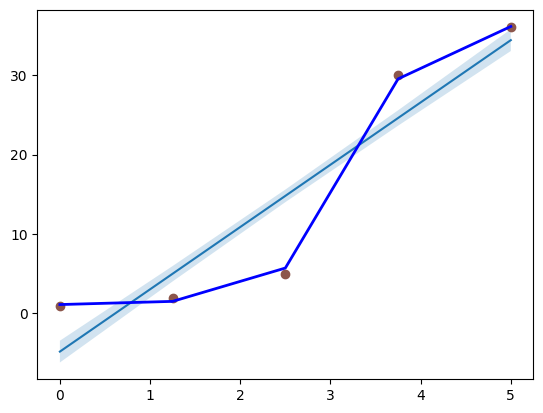

In [ ]:
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
from scipy import interpolate

# 读取数据
data = pd.read_csv('result/autoware/annotation.csv')
deekseek_data = data[data['model']=='gpt-4o']
deekseek_data = deekseek_data.fillna(0)

x = np.linspace(0,5,5)
y_ground_truth = list()
y_generate_min = list()
y_generate_max = list()

has_parameter_id = set(deekseek_data[deekseek_data['lack_of_scenario_specific_parameter_initialization_ground_truth']>0]['id'])
for item in has_parameter_id:
    ground_truth_parameter = set(deekseek_data[deekseek_data['id']==item]['lack_of_scenario_specific_parameter_initialization_ground_truth'])
    y_ground_truth = y_ground_truth + list(ground_truth_parameter)
    generated_parameter =set(deekseek_data[deekseek_data['id']==item]['lack_of_scenario_specific_parameter_initialization_generated'])
    y_generate_max.append(max(generated_parameter))
    y_generate_min.append(min(generated_parameter))


parameter_result = np.array([y_ground_truth,y_generate_min,y_generate_max])
parameter_result = parameter_result[:,np.argsort(parameter_result[0])]

tck = interpolate.splrep(x,parameter_result[0],s=1)
x_curve=interpolate.splev(x,tck,der=0)

a,b = np.polyfit(x,parameter_result[0],deg=1)
y_est = a *x+b
y_err = x.std()*np.sqrt(1/len(x)+(x-x.mean())**2/np.sum((x-x.mean())**2))
fig,ax = plt.subplots()
ax.plot(x,y_est,'-')
ax.fill_between(x,y_est-y_err,y_est+y_err,alpha=0.2)
ax.plot(x,parameter_result[0],'o',color='tab:brown')
ax.plot(x,x_curve,'b-',linewidth=2)

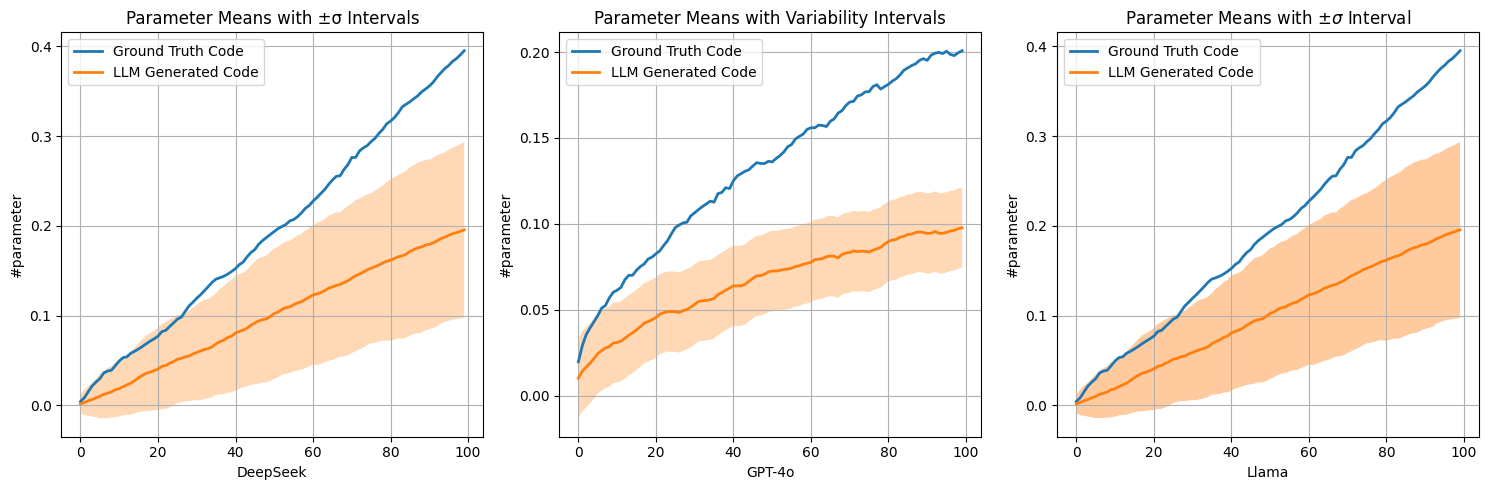

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)

# an (Nsteps x Nwalkers) array of random walk steps
S1 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)
S2 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)

# an (Nsteps x Nwalkers) array of random walker positions
X1 = S1.cumsum(axis=0)
X2 = S2.cumsum(axis=0)

# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)
mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)

# Create figure with 3 horizontal subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Subplot 1: Population means with confidence intervals
axes[0].plot(t, mu1, lw=2, label='Ground Truth Code', color='C0')
axes[0].plot(t, mu2, lw=2, label='LLM Generated Code', color='C1')
axes[0].fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='C1', alpha=0.3)
axes[0].set_title('Parameter Means with ±σ Intervals')
axes[0].legend(loc='upper left')
axes[0].set_xlabel('DeepSeek')
axes[0].set_ylabel('#parameter')
axes[0].grid()

# Subplot 2: Population standard deviations with variability intervals
# For std dev, we can show ± std of the std dev (meta-variability)
std_of_std1 = np.array([X1[i].std() for i in range(Nsteps)]).std()
std_of_std2 = np.array([X2[i].std() for i in range(Nsteps)]).std()

axes[1].plot(t, sigma1, lw=2, label='Ground Truth Code', color='C0')
axes[1].plot(t, sigma2, lw=2, label='LLM Generated Code', color='C1')
axes[1].fill_between(t, sigma2+std_of_std2, sigma2-std_of_std2, facecolor='C1', alpha=0.3)
axes[1].set_title('Parameter Means with Variability Intervals')
axes[1].legend(loc='upper left')
axes[1].set_xlabel('GPT-4o')
axes[1].set_ylabel('#parameter')
axes[1].grid()

# Subplot 3: Original plot with mean ± sigma intervals (same as first subplot but kept for consistency)
axes[2].plot(t, mu1, lw=2, label='Ground Truth Code')
axes[2].plot(t, mu2, lw=2, label='LLM Generated Code')
axes[2].fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='C1', alpha=0.4)
axes[2].set_title(r'Parameter Means with $\pm \sigma$ Interval')
axes[2].legend(loc='upper left')
axes[2].set_xlabel('Llama')
axes[2].set_ylabel('#parameter')
axes[2].grid()

plt.tight_layout()
plt.show()

/tmp/ipykernel_484262/480944395.py:64: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,


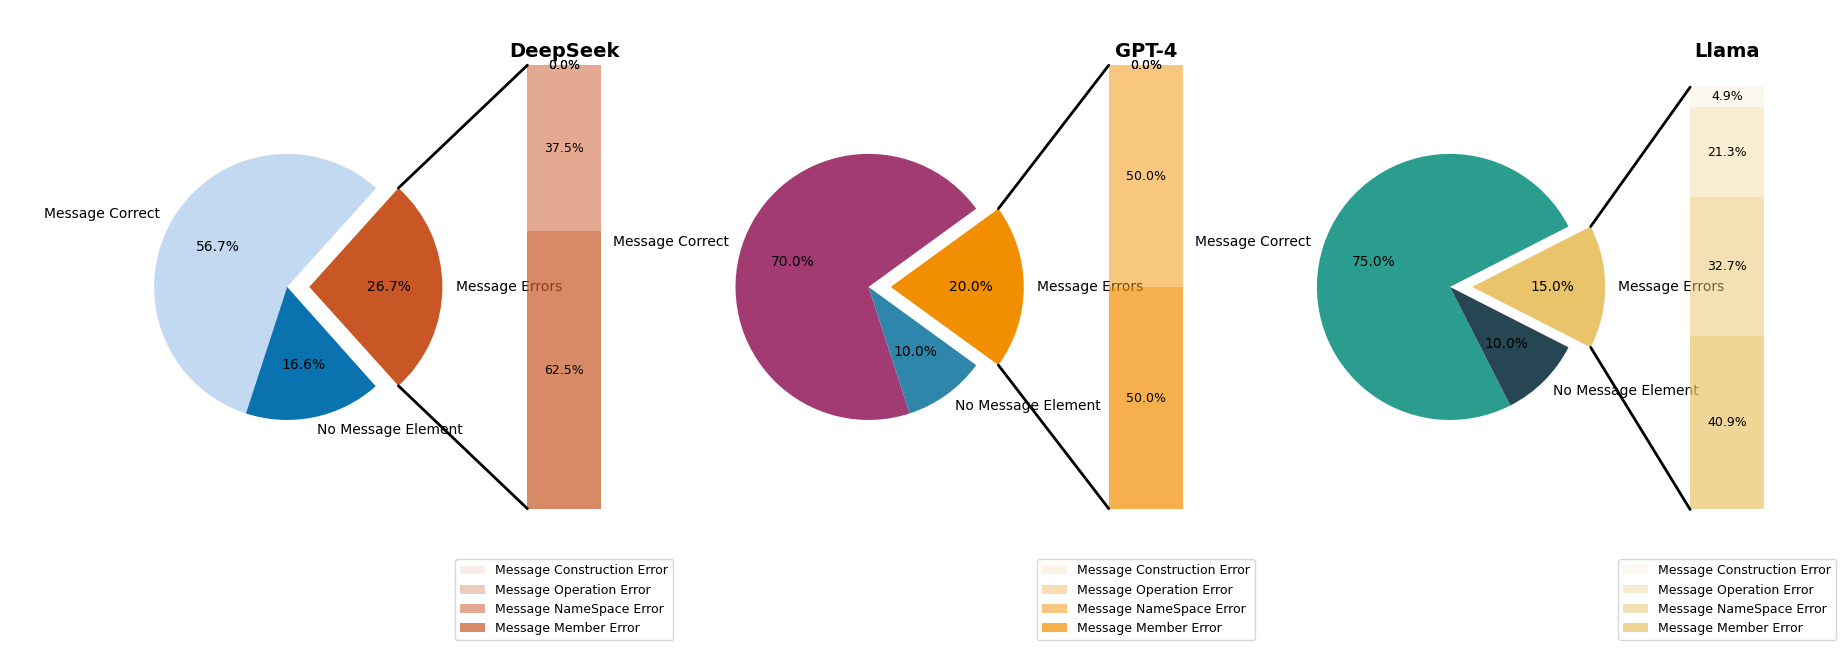

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch

# 创建包含三个子图的图表
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=0.3)

# 定义颜色方案
colors_schemes = [
    ['#C85725', '#C3D9F1', '#0972AF', '#F4854A'],  # DeepSeek 颜色
    ['#F18F01', '#A23B72', '#2E86AB', '#C73E1D'],  # GPT-4 颜色  
    ['#E9C46A', '#2A9D8F', '#264653', '#F4A261']   # Claude 颜色
]

# 三个子图的数据
datasets = [
    {
        'title': 'DeepSeek',
        'overall_ratios': [.2666, .5666, .166],
        'labels': ['Message Errors', 'Message Correct', 'No Message Element'],
        'age_ratios': [.625, .375, .0, .0],
        'age_labels': ['Message Member Error', 'Message NameSpace Error', 
                      'Message Operation Error', 'Message Construction Error'],
        'colors': colors_schemes[0]
    },
    {
        'title': 'GPT-4',
        'overall_ratios': [.2, .7, .1],
        'labels': ['Message Errors', 'Message Correct', 'No Message Element'],
        'age_ratios': [.5, .5, .0, .0],
        'age_labels': ['Message Member Error', 'Message NameSpace Error', 
                      'Message Operation Error', 'Message Construction Error'],
        'colors': colors_schemes[1]
    },
    {
        'title': 'Llama',
        'overall_ratios': [.15, .75, .1],
        'labels': ['Message Errors', 'Message Correct', 'No Message Element'],
        'age_ratios': [.409, .327, .213, .049],
        'age_labels': ['Message Member Error', 'Message NameSpace Error', 
                      'Message Operation Error', 'Message Construction Error'],
        'colors': colors_schemes[2]
    }
]

# 为每个子图绘制饼图和条形图
for i, (ax, data) in enumerate(zip(axes, datasets)):
    # 创建子图中的两个轴
    ax1 = ax
    ax1.set_position([ax1.get_position().x0, ax1.get_position().y0, 
                     ax1.get_position().width * 0.6, ax1.get_position().height])
    
    # 增加条形图的宽度和高度
    ax2 = ax1.inset_axes([0.8, 0.1, 0.4, 0.8])  # 增加宽度
    
    # 饼图参数
    overall_ratios = data['overall_ratios']
    labels = data['labels']
    explode = [0.1, 0, 0]
    angle = -180 * overall_ratios[0]
    
    # 绘制饼图 - 使用自定义颜色
    wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                         labels=labels, explode=explode, radius=0.6,
                         colors=data['colors'])  # 使用自定义颜色
    
    # 条形图参数
    age_ratios = data['age_ratios']
    age_labels = data['age_labels']
    bottom = 1
    width = .2  # 增加条形宽度
    
    # 绘制条形图 - 增加高度差异
    for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
        bottom -= height
        bc = ax2.bar(0, height, width, bottom=bottom, color=data['colors'][0],
                     label=label, alpha=0.1 + 0.2 * j)
        ax2.bar_label(bc, labels=[f"{height:.1%}"], label_type='center', fontsize=9)
    
    ax2.set_title(data['title'], fontsize=14, fontweight='bold')
    ax2.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize=9)
    ax2.axis('off')
    ax2.set_xlim(- 1.5 * width, 1.5 * width)  # 调整x轴限制以适应更宽的条形
    
    # 连接线
    theta1, theta2 = wedges[0].theta1, wedges[0].theta2
    center, r = wedges[0].center, wedges[0].r
    total_height = np.sum(age_ratios)
    
    # 绘制顶部连接线
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = r * np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, total_height), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(2)
    ax2.add_artist(con)
    
    # 绘制底部连接线
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(2)
    ax2.add_artist(con)

plt.tight_layout()
plt.show()

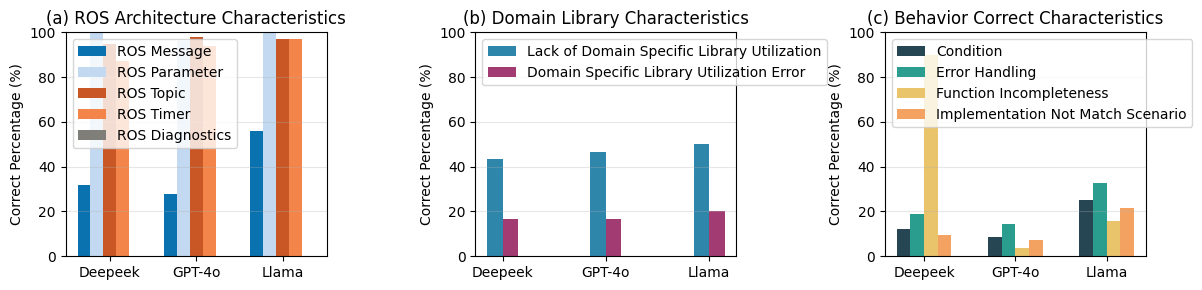

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 创建包含3个子图的图表
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

species = ('Deepeek', 'GPT-4o', 'Llama')

# 根据json文件判断，查看是否有对应的元素
# 定义三个不同的数据集
datasets = [
    {
        'title': '(a) ROS Architecture Characteristics',
        'data': {
            'ROS Message': np.array([32, 28, 56]),
            'ROS Parameter': np.array([100, 96, 100]),
            'ROS Topic': np.array([95, 98, 97]),
            'ROS Timer': np.array([87, 94, 97]),
            'ROS Diagnostics': np.array([0, 0, 0])
        },
        'colors': ['#0972AF', '#C3D9F1', '#C85725', '#F4854A', '#7F7E79']
    },
    {
        'title': '(b) Domain Library Characteristics',
        'data': {
            'Lack of Domain Specific Library Utilization': np.array([43.33, 46.66, 50]),
            'Domain Specific Library Utilization Error': np.array([16.6, 16.6, 20])
        },
        'colors': ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
    },
    {
        'title': '(c) Behavior Correct Characteristics',
        'data': {
            'Condition': np.array([12.4, 8.7, 25.3]),
            'Error Handling': np.array([18.9, 14.2, 32.6]),
            'Function Incompleteness': np.array([90.1, 3.8, 15.7]),
            'Implementation Not Match Scenario': np.array([9.6, 7.1, 21.4])
        },
        'colors': ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']
    }
]

# 为每个子图创建不同的柱状图
for ax_idx, ax in enumerate(axes):
    dataset = datasets[ax_idx]
    x = np.arange(len(species))
    width = 0.15
    multiplier = 0

    for i, (attribute, measurement) in enumerate(dataset['data'].items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=dataset['colors'][i])
        multiplier += 1

    # 设置每个子图的标签和标题
    ax.set_ylabel('Correct Percentage (%)')
    ax.set_title(dataset['title'])
    ax.set_xticks(x + width * (multiplier - 1) / 2)
    ax.set_xticklabels(species)
    ax.set_ylim(0, 100)
    ax.grid(True, axis='y', alpha=0.3)
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

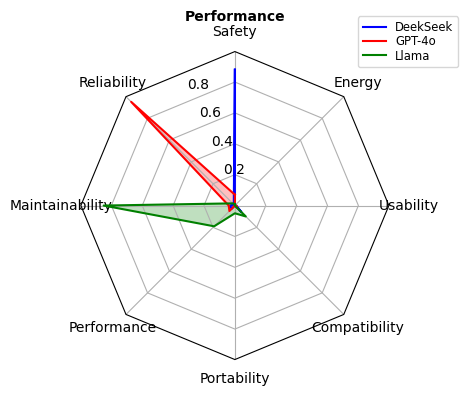

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['Safety', 'Reliability', 'Maintainability', 'Performance', 'Portability', 'Compatibility', 'Usability', 'Energy'],
        ('Performance', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00]])
    ]
    return data


if __name__ == '__main__':
    N = 8
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)
    
    # 只创建一个单独的雷达图
    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='radar'))
    
    # 选择要显示的数据（这里选择第一个场景 'Basecase'）
    title, case_data = data[0]  # 选择第一个数据集
    
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                 horizontalalignment='center', verticalalignment='center')
    
    colors = ['b', 'r', 'g', 'm', 'y']
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    # 添加图例
    labels = ('DeekSeek', 'GPT-4o', 'Llama')
    legend = ax.legend(labels, loc=(0.9, .95),
                      labelspacing=0.1, fontsize='small')

    plt.show()

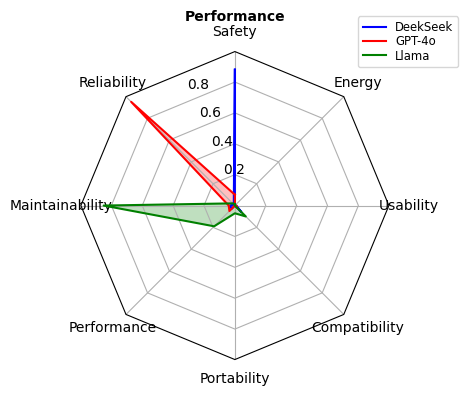

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['Function Correctness', 'Syntactic Correctness', 'Syntactic Similarity', 'Complexity', 'System Integration Level'],
        ('Performance', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00]])
    ]
    return data


if __name__ == '__main__':
    N = 8
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)
    
    # 只创建一个单独的雷达图
    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='radar'))
    
    # 选择要显示的数据（这里选择第一个场景 'Basecase'）
    title, case_data = data[0]  # 选择第一个数据集
    
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                 horizontalalignment='center', verticalalignment='center')
    
    colors = ['b', 'r', 'g', 'm', 'y']
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    # 添加图例
    labels = ('DeekSeek', 'GPT-4o', 'Llama')
    legend = ax.legend(labels, loc=(0.9, .95),
                      labelspacing=0.1, fontsize='small')

    plt.show()

In [ ]:
import krippendorff
reliability_data = [
[('A', 'D'), ('A', 'D'), ('B', 'C'), ('A', 'B', 'D'), ('B', 'C', 'D'), ('B',), ('A',), ('A',), (), ('A', 'B'), ('A', 'B')],
[('A', 'D'), ('A', 'D'), ('B', 'C'), ('A', 'B', 'C', 'D'), ('B', 'D'), (), ('A',), (), ('B',), ('A', 'B'), ('B',)],
[('A', 'D'), ('A', 'D'), ('B', 'C'), ('A', 'B', 'C', 'D'), ('B', 'D'), (), ('A',), ('A',), (), ('A', 'B'), ('A', 'B')],
[('A', 'D'), ('A', 'D'), ('B', 'C'), ('A', 'B', 'C', 'D'), ('B', 'D'), ('B',), ('A',), ('A',), ('B',), ('A', 'B'), ('A', 'B')]
]

# 使用Krippendorff's Alpha
alpha = krippendorff.alpha(reliability_data=reliability_data, level_of_measurement='nominal')
print(alpha)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 11) + inhomogeneous part.

In [ ]:
# 原始数据
data = [
    [('A','D'),],  # 这个看起来格式不一致，我假设是[('A','D'), ('A','D'), ...]的简写？
    ['A,D', 'A,D', 'A,D', 'A,D'],      
    ['B,C', 'B,C', 'B,C', 'B,C'], 
    ['A,B,D', 'A,B,C,D', 'A,B,C,D', 'A,B,C,D'], 
    ['B,C,D', 'B,D', 'B,D', 'B,D'],
    ['B', '', '', 'B'],
    ['A', 'A', 'A', 'A'],
    ['A', '', 'A', 'A'],
    ['', 'B', '', 'B'],
    ['A,B', 'A,B', 'A,B', 'A,B'],
    ['A,B', 'B', 'A,B', 'A,B']
]

# 转换函数：将字符串格式转换为元组格式
def convert_annotation(annotation):
    if annotation == '' or annotation is None:
        return ()
    elif isinstance(annotation, tuple):
        return annotation
    elif ',' in annotation:
        # 将 'A,D' 转换为 ('A', 'D')
        return tuple(sorted(annotation.split(',')))
    else:
        # 单个标签如 'A' 转换为 ('A',)
        return (annotation,)

# 转换数据
reliability_data = []
for sample in data:
    # 处理第一个特殊样本
    if sample == [('A','D'),]:
        # 假设这个样本有4个标注人都标注了('A','D')
        converted_sample = [convert_annotation('A,D') for _ in range(4)]
    else:
        converted_sample = [convert_annotation(ann) for ann in sample]
    reliability_data.append(converted_sample)

# 现在我们需要转置数据：行变成标注人，列变成样本
# 当前格式：reliability_data[样本索引][标注人索引]
# 目标格式：coders_data[标注人索引][样本索引]

num_coders = len(reliability_data[0])  # 标注人数量（4个）
num_samples = len(reliability_data)    # 样本数量（11个）

coders_data = []
for coder_idx in range(num_coders):
    coder_annotations = []
    for sample_idx in range(num_samples):
        coder_annotations.append(reliability_data[sample_idx][coder_idx])
    coders_data.append(coder_annotations)

print("转换后的数据格式（每个标注人一行）：")
for i, coder in enumerate(coders_data):
    print(f"标注人 {i+1}: {coder}")

print(f"\n数据维度: {len(coders_data)} 个标注人 × {len(coders_data[0])} 个样本")

# 现在可以计算 Krippendorff's alpha
try:
    alpha = krippendorff.alpha(reliability_data=coders_data, level_of_measurement='nominal')
    print(f"\nKrippendorff's alpha: {alpha:.3f}")
except NameError:
    print("\n需要先安装 krippendorff 库: pip install krippendorff")
    print("数据已准备好，可以用于计算 alpha")

转换后的数据格式（每个标注人一行）：
标注人 1: [('A', 'D'), ('A', 'D'), ('B', 'C'), ('A', 'B', 'D'), ('B', 'C', 'D'), ('B',), ('A',), ('A',), (), ('A', 'B'), ('A', 'B')]
标注人 2: [('A', 'D'), ('A', 'D'), ('B', 'C'), ('A', 'B', 'C', 'D'), ('B', 'D'), (), ('A',), (), ('B',), ('A', 'B'), ('B',)]
标注人 3: [('A', 'D'), ('A', 'D'), ('B', 'C'), ('A', 'B', 'C', 'D'), ('B', 'D'), (), ('A',), ('A',), (), ('A', 'B'), ('A', 'B')]
标注人 4: [('A', 'D'), ('A', 'D'), ('B', 'C'), ('A', 'B', 'C', 'D'), ('B', 'D'), ('B',), ('A',), ('A',), ('B',), ('A', 'B'), ('A', 'B')]

数据维度: 4 个标注人 × 11 个样本


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 11) + inhomogeneous part.

In [ ]:
import numpy as np
import pandas as pd
from itertools import combinations

def prepare_krippendorff_data(data):
    """
    将原始数据转换为Krippendorff alpha计算所需的格式
    返回一个numpy数组，形状为(项目数, 编码员数)，值为类别标签
    """
    # 获取所有可能的类别
    all_categories = set()
    for row in data:
        for item in row:
            if item:  # 非空值
                categories = [c.strip() for c in item.split(',') if c.strip()]
                all_categories.update(categories)
    
    all_categories = sorted(list(all_categories))
    print(f"所有类别: {all_categories}")
    
    # 转换为编码矩阵
    n_items = len(data)
    n_coders = len(data[0])
    
    # 创建三维数组: 项目 × 编码员 × 类别
    coding_matrix = np.zeros((n_items, n_coders, len(all_categories)), dtype=int)
    
    for i, row in enumerate(data):
        for j, coding in enumerate(row):
            if coding:  # 非空值
                categories = [c.strip() for c in coding.split(',') if c.strip()]
                for category in categories:
                    if category in all_categories:
                        idx = all_categories.index(category)
                        coding_matrix[i, j, idx] = 1
    
    return coding_matrix, all_categories

def krippendorff_alpha_nominal(coding_matrix):
    """
    计算多标签分类的Krippendorff's alpha系数
    coding_matrix: 三维数组 (项目数, 编码员数, 类别数)
    """
    n_items, n_coders, n_categories = coding_matrix.shape
    
    # 计算观察不一致性
    observed_disagreement = 0
    total_pairs = 0
    
    for i in range(n_items):
        # 对于每个项目，计算编码员之间的不一致性
        for c1, c2 in combinations(range(n_coders), 2):
            # 计算两个编码员在类别上的差异
            disagreement = np.sum(np.abs(coding_matrix[i, c1] - coding_matrix[i, c2]))
            observed_disagreement += disagreement
            total_pairs += n_categories  # 每个类别对都算一个比较
    
    # 计算期望不一致性
    expected_disagreement = 0
    
    # 计算每个类别在每个编码员中的使用频率
    category_freq = np.sum(coding_matrix, axis=(0, 1))  # 每个类别的总使用次数
    total_codings = np.sum(category_freq)
    
    if total_codings == 0:
        return float('nan')
    
    # 计算期望不一致性
    for k in range(n_categories):
        p_k = category_freq[k] / total_codings
        expected_disagreement += p_k * (1 - p_k)
    
    expected_disagreement *= n_categories * (n_items * n_coders * (n_coders - 1) / 2)
    
    # 计算alpha
    if total_pairs == 0 or expected_disagreement == 0:
        return float('nan')
    
    alpha = 1 - (observed_disagreement / expected_disagreement)
    return alpha

def krippendorff_alpha_binary(coding_matrix):
    """
    为每个类别单独计算二分类的Krippendorff's alpha
    """
    n_items, n_coders, n_categories = coding_matrix.shape
    results = {}
    
    for k in range(n_categories):
        # 提取当前类别的编码矩阵 (项目数 × 编码员数)
        binary_matrix = coding_matrix[:, :, k]
        
        # 计算观察不一致性
        observed_disagreement = 0
        total_pairs = 0
        
        for i in range(n_items):
            codings = binary_matrix[i]
            n_1 = np.sum(codings)  # 编码为1的数量
            n_0 = n_coders - n_1   # 编码为0的数量
            
            # 观察不一致性：编码不同的对数
            observed_disagreement += n_1 * n_0
            total_pairs += n_coders * (n_coders - 1) / 2
        
        # 计算期望不一致性
        total_1 = np.sum(binary_matrix)  # 总的1的数量
        total_0 = n_items * n_coders - total_1  # 总的0的数量
        total_codings = n_items * n_coders
        
        if total_codings == 0:
            results[f'Category_{k}'] = float('nan')
            continue
        
        p_1 = total_1 / total_codings  # 编码为1的比例
        p_0 = total_0 / total_codings  # 编码为0的比例
        
        expected_disagreement = 2 * p_1 * p_0 * total_pairs
        
        # 计算alpha
        if total_pairs == 0 or expected_disagreement == 0:
            results[f'Category_{k}'] = float('nan')
        else:
            alpha = 1 - (observed_disagreement / expected_disagreement)
            results[f'Category_{k}'] = alpha
    
    return results

# 您的数据
data = [
    ['A,D', 'A,D', 'A,D', 'A,D'],      
    ['B,C', 'B,C', 'B,C', 'B,C'], 
    ['A,B,D', 'A,B,C,D', 'A,B,C,D', 'A,B,C,D'], 
    ['B,C,D', 'B,D', 'B,D', 'B,D'],
    ['B', '', '', 'B'],
    ['A', 'A', 'A', 'A'],
    ['A', '', 'A', 'A'],
    ['', 'B', '', 'B'],
    ['A,B', 'A,B', 'A,B', 'A,B'],
    ['A,B', 'B', 'A,B', 'A,B']
]

# 准备数据
coding_matrix, categories = prepare_krippendorff_data(data)

print("数据形状:", coding_matrix.shape)
print("类别:", categories)

# 计算总体Krippendorff's alpha
alpha_overall = krippendorff_alpha_nominal(coding_matrix)
print(f"\n总体Krippendorff's alpha: {alpha_overall:.4f}")

# 计算每个类别的二分类alpha
binary_alphas = krippendorff_alpha_binary(coding_matrix)
print("\n各类别二分类Krippendorff's alpha:")
for category, alpha in zip(categories, binary_alphas.values()):
    print(f"  类别 {category}: {alpha:.4f}")

# 使用krippendorff包（如果安装的话）
try:
    import krippendorff
    
    # 将数据转换为krippendorff包所需的格式
    kripp_data = []
    for i in range(coding_matrix.shape[0]):
        item_codings = []
        for j in range(coding_matrix.shape[1]):
            # 将多标签编码转换为字符串表示
            labels = []
            for k in range(coding_matrix.shape[2]):
                if coding_matrix[i, j, k] == 1:
                    labels.append(categories[k])
            item_codings.append(','.join(labels) if labels else '')
        kripp_data.append(item_codings)
    
    # 注意：标准krippendorff包主要处理单标签分类
    # 对于多标签数据，我们需要自定义距离函数或使用其他方法
    print("\n注意：标准krippendorff包对多标签数据的支持有限")
    
except ImportError:
    print("\n要获得更精确的结果，可以安装krippendorff包: pip install krippendorff")

所有类别: ['A', 'B', 'C', 'D']
数据形状: (10, 4, 4)
类别: ['A', 'B', 'C', 'D']

总体Krippendorff's alpha: 0.8824

各类别二分类Krippendorff's alpha:
  类别 A: 0.7980
  类别 B: 0.7222
  类别 C: 0.6875
  类别 D: 1.0000

注意：标准krippendorff包对多标签数据的支持有限


In [ ]:
import numpy as np
import pandas as pd
from itertools import combinations

def prepare_krippendorff_data(data):
    """
    将原始数据转换为Krippendorff alpha计算所需的格式
    返回一个numpy数组，形状为(项目数, 编码员数)，值为类别标签
    """
    # 获取所有可能的类别
    all_categories = set()
    for row in data:
        for item in row:
            if item:  # 非空值
                categories = [c.strip() for c in item.split(',') if c.strip()]
                all_categories.update(categories)
    
    all_categories = sorted(list(all_categories))
    print(f"所有类别: {all_categories}")
    
    # 转换为编码矩阵
    n_items = len(data)
    n_coders = len(data[0])
    
    # 创建三维数组: 项目 × 编码员 × 类别
    coding_matrix = np.zeros((n_items, n_coders, len(all_categories)), dtype=int)
    
    for i, row in enumerate(data):
        for j, coding in enumerate(row):
            if coding:  # 非空值
                categories = [c.strip() for c in coding.split(',') if c.strip()]
                for category in categories:
                    if category in all_categories:
                        idx = all_categories.index(category)
                        coding_matrix[i, j, idx] = 1
    
    return coding_matrix, all_categories

def krippendorff_alpha_nominal(coding_matrix):
    """
    计算多标签分类的Krippendorff's alpha系数
    coding_matrix: 三维数组 (项目数, 编码员数, 类别数)
    """
    n_items, n_coders, n_categories = coding_matrix.shape
    
    # 计算观察不一致性
    observed_disagreement = 0
    total_pairs = 0
    
    for i in range(n_items):
        # 对于每个项目，计算编码员之间的不一致性
        for c1, c2 in combinations(range(n_coders), 2):
            # 计算两个编码员在类别上的差异
            disagreement = np.sum(np.abs(coding_matrix[i, c1] - coding_matrix[i, c2]))
            observed_disagreement += disagreement
            total_pairs += n_categories  # 每个类别对都算一个比较
    
    # 计算期望不一致性
    expected_disagreement = 0
    
    # 计算每个类别在每个编码员中的使用频率
    category_freq = np.sum(coding_matrix, axis=(0, 1))  # 每个类别的总使用次数
    total_codings = np.sum(category_freq)
    
    if total_codings == 0:
        return float('nan')
    
    # 计算期望不一致性
    for k in range(n_categories):
        p_k = category_freq[k] / total_codings
        expected_disagreement += p_k * (1 - p_k)
    
    expected_disagreement *= n_categories * (n_items * n_coders * (n_coders - 1) / 2)
    
    # 计算alpha
    if total_pairs == 0 or expected_disagreement == 0:
        return float('nan')
    
    alpha = 1 - (observed_disagreement / expected_disagreement)
    return alpha

def krippendorff_alpha_binary(coding_matrix):
    """
    为每个类别单独计算二分类的Krippendorff's alpha
    """
    n_items, n_coders, n_categories = coding_matrix.shape
    results = {}
    
    for k in range(n_categories):
        # 提取当前类别的编码矩阵 (项目数 × 编码员数)
        binary_matrix = coding_matrix[:, :, k]
        
        # 计算观察不一致性
        observed_disagreement = 0
        total_pairs = 0
        
        for i in range(n_items):
            codings = binary_matrix[i]
            n_1 = np.sum(codings)  # 编码为1的数量
            n_0 = n_coders - n_1   # 编码为0的数量
            
            # 观察不一致性：编码不同的对数
            observed_disagreement += n_1 * n_0
            total_pairs += n_coders * (n_coders - 1) / 2
        
        # 计算期望不一致性
        total_1 = np.sum(binary_matrix)  # 总的1的数量
        total_0 = n_items * n_coders - total_1  # 总的0的数量
        total_codings = n_items * n_coders
        
        if total_codings == 0:
            results[f'Category_{k}'] = float('nan')
            continue
        
        p_1 = total_1 / total_codings  # 编码为1的比例
        p_0 = total_0 / total_codings  # 编码为0的比例
        
        expected_disagreement = 2 * p_1 * p_0 * total_pairs
        
        # 计算alpha
        if total_pairs == 0 or expected_disagreement == 0:
            results[f'Category_{k}'] = float('nan')
        else:
            alpha = 1 - (observed_disagreement / expected_disagreement)
            results[f'Category_{k}'] = alpha
    
    return results

# 您的数据
data = [
    ['A,D', 'A,D', 'A,D'],      
    ['B,C', 'B,C', 'B,C'], 
    ['A,B,D', 'A,B,C,D', 'A,B,C,D'], 
    ['B,C,D', 'B,D', 'B,D'],
    ['B', '', 'B'],
    ['A', 'A', 'A'],
    ['A', 'A', 'A'],
    ['', '', 'B'],
    ['A,B', 'A,B', 'A,B'],
    ['A,B','A,B', 'A,B']
]

# 准备数据
coding_matrix, categories = prepare_krippendorff_data(data)

print("数据形状:", coding_matrix.shape)
print("类别:", categories)

# 计算总体Krippendorff's alpha
alpha_overall = krippendorff_alpha_nominal(coding_matrix)
print(f"\n总体Krippendorff's alpha: {alpha_overall:.4f}")

# 计算每个类别的二分类alpha
binary_alphas = krippendorff_alpha_binary(coding_matrix)
print("\n各类别二分类Krippendorff's alpha:")
for category, alpha in zip(categories, binary_alphas.values()):
    print(f"  类别 {category}: {alpha:.4f}")

# 使用krippendorff包（如果安装的话）
try:
    import krippendorff
    
    # 将数据转换为krippendorff包所需的格式
    kripp_data = []
    for i in range(coding_matrix.shape[0]):
        item_codings = []
        for j in range(coding_matrix.shape[1]):
            # 将多标签编码转换为字符串表示
            labels = []
            for k in range(coding_matrix.shape[2]):
                if coding_matrix[i, j, k] == 1:
                    labels.append(categories[k])
            item_codings.append(','.join(labels) if labels else '')
        kripp_data.append(item_codings)
    
    # 注意：标准krippendorff包主要处理单标签分类
    # 对于多标签数据，我们需要自定义距离函数或使用其他方法
    print("\n注意：标准krippendorff包对多标签数据的支持有限")
    
except ImportError:
    print("\n要获得更精确的结果，可以安装krippendorff包: pip install krippendorff")

所有类别: ['A', 'B', 'C', 'D']
数据形状: (10, 3, 4)
类别: ['A', 'B', 'C', 'D']

总体Krippendorff's alpha: 0.9056

各类别二分类Krippendorff's alpha:
  类别 A: 1.0000
  类别 B: 0.7222
  类别 C: 0.5833
  类别 D: 1.0000

注意：标准krippendorff包对多标签数据的支持有限
